# Loading in Data

In [ ]:
# Loading in libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [ ]:
# Importing Google Drive Dependencies
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading in data from Google Drive
data = pd.read_csv("/content/drive/MyDrive/Health.csv")

In [ ]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      6               8.16           65        0.1  584.259210  33736494.0   
1     58               8.18           62        0.1  612.696514    327582.0   
2     62               8.13           64        0.1  631.744976  31731688.0   
3     67               8.52           67        0.1  669.959000   3696958.0   
4     68               7.87           68        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# Exploratory Data Analysis

In [ ]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.810000               37.438577    74.000000       0.000000   
50%       3.790000              145.102253    89.000000      15.000000   
75%       7.340000              509.389994    96.000000     373.000000   
max      17.870000            18961.348600    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           44.220133    83.564585           5.955925   
std      19.754249          162.897999    22.450557           2.299385   
min       2.000000            0.000000     3.000000           0.740000   
25%      19.500000            1.000000    81.000000           4.410000   
50%      43.700000            4.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031887  1.465363e+07   
std      21.579193     6.032360   11475.900117  7.046039e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     462.149650  1.918970e+05   
50%      92.000000     0.100000    1592.572182  1.419631e+06   
75%      97.000000     0.700000    4718.512910  7.658972e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631551    12.119891  
std                           0.183089     2.795388  
min                           0.000000     4.200000  
25%                           0.509000    10.300000  
50%                           0.673000    12.300000  
75%                           0.751000    14.000000  
max                           0.936000    20.700000

<Axes: xlabel='Country', ylabel='Alcohol'>

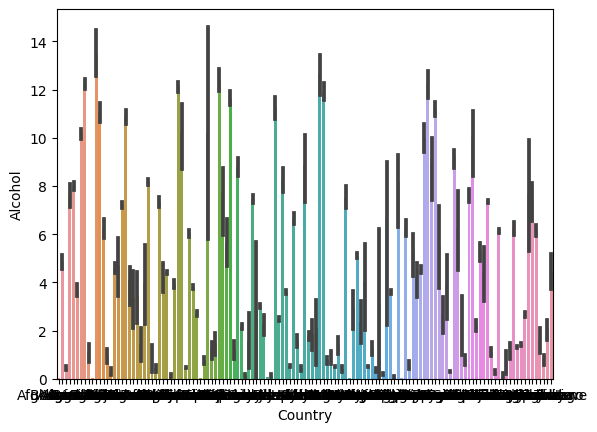

In [ ]:
sns.barplot(data,x="Country",y="Alcohol")

<Axes: xlabel='Country', ylabel='Adult Mortality'>

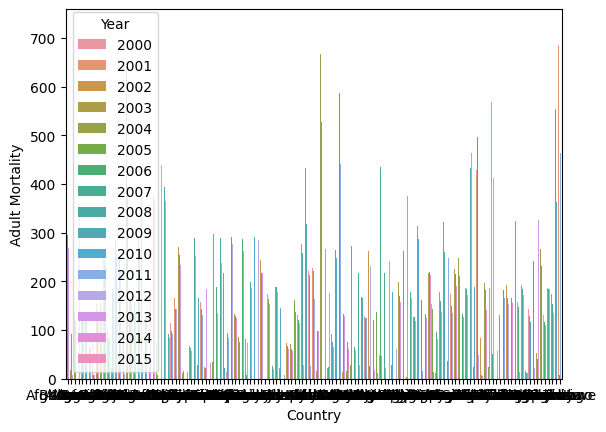

In [ ]:
sns.barplot(data,x="Country",y="Adult Mortality",hue="Year")

In [ ]:
afgan = pd.read_csv("/content/drive/MyDrive/afgan.csv")

In [ ]:
afgan.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0      6               8.16          65       0.1  584.259210  33700000.0   
1     58               8.18          62       0.1  612.696514    327582.0   
2     62               8.13          64       0.1  631.744976  31700000.0   
3     67               8.52          67       0.1  669.959000   3700000.0   
4     68               7.87          68       0.1   63.537231   2980000.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

<Axes: xlabel='Life expectancy', ylabel='Year'>

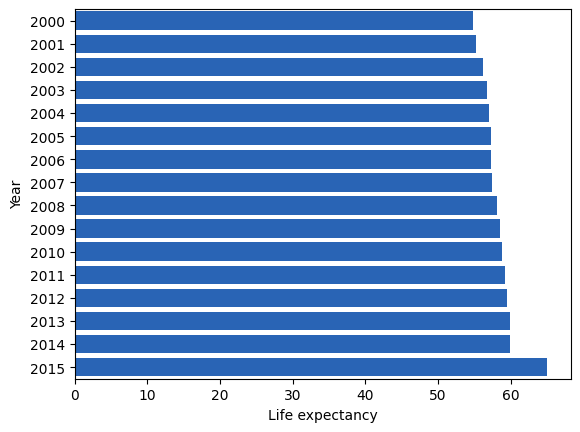

In [ ]:
sns.barplot(afgan,x="Life expectancy",y="Year",errorbar="sd",orient="h",color="#1260CC")

In [ ]:
middleeast = pd.read_csv("/content/drive/MyDrive/middleeast.csv")

<Axes: xlabel='Year', ylabel='Life expectancy'>

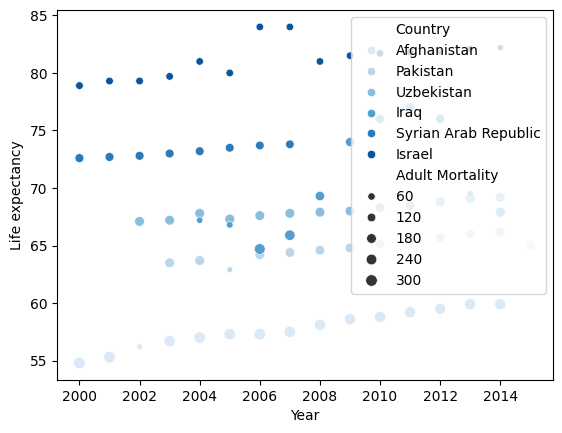

In [ ]:
sns.scatterplot(middleeast,x="Year",y="Life expectancy",hue="Country",palette="Blues",size="Adult Mortality")

<Axes: xlabel='Schooling', ylabel='GDP'>

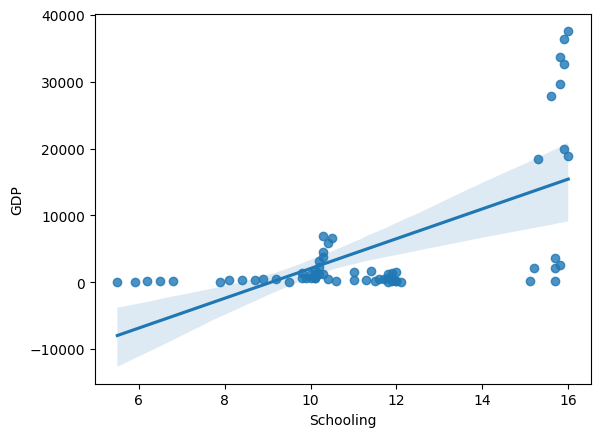

In [ ]:
sns.regplot(middleeast,x="Schooling",y="GDP")

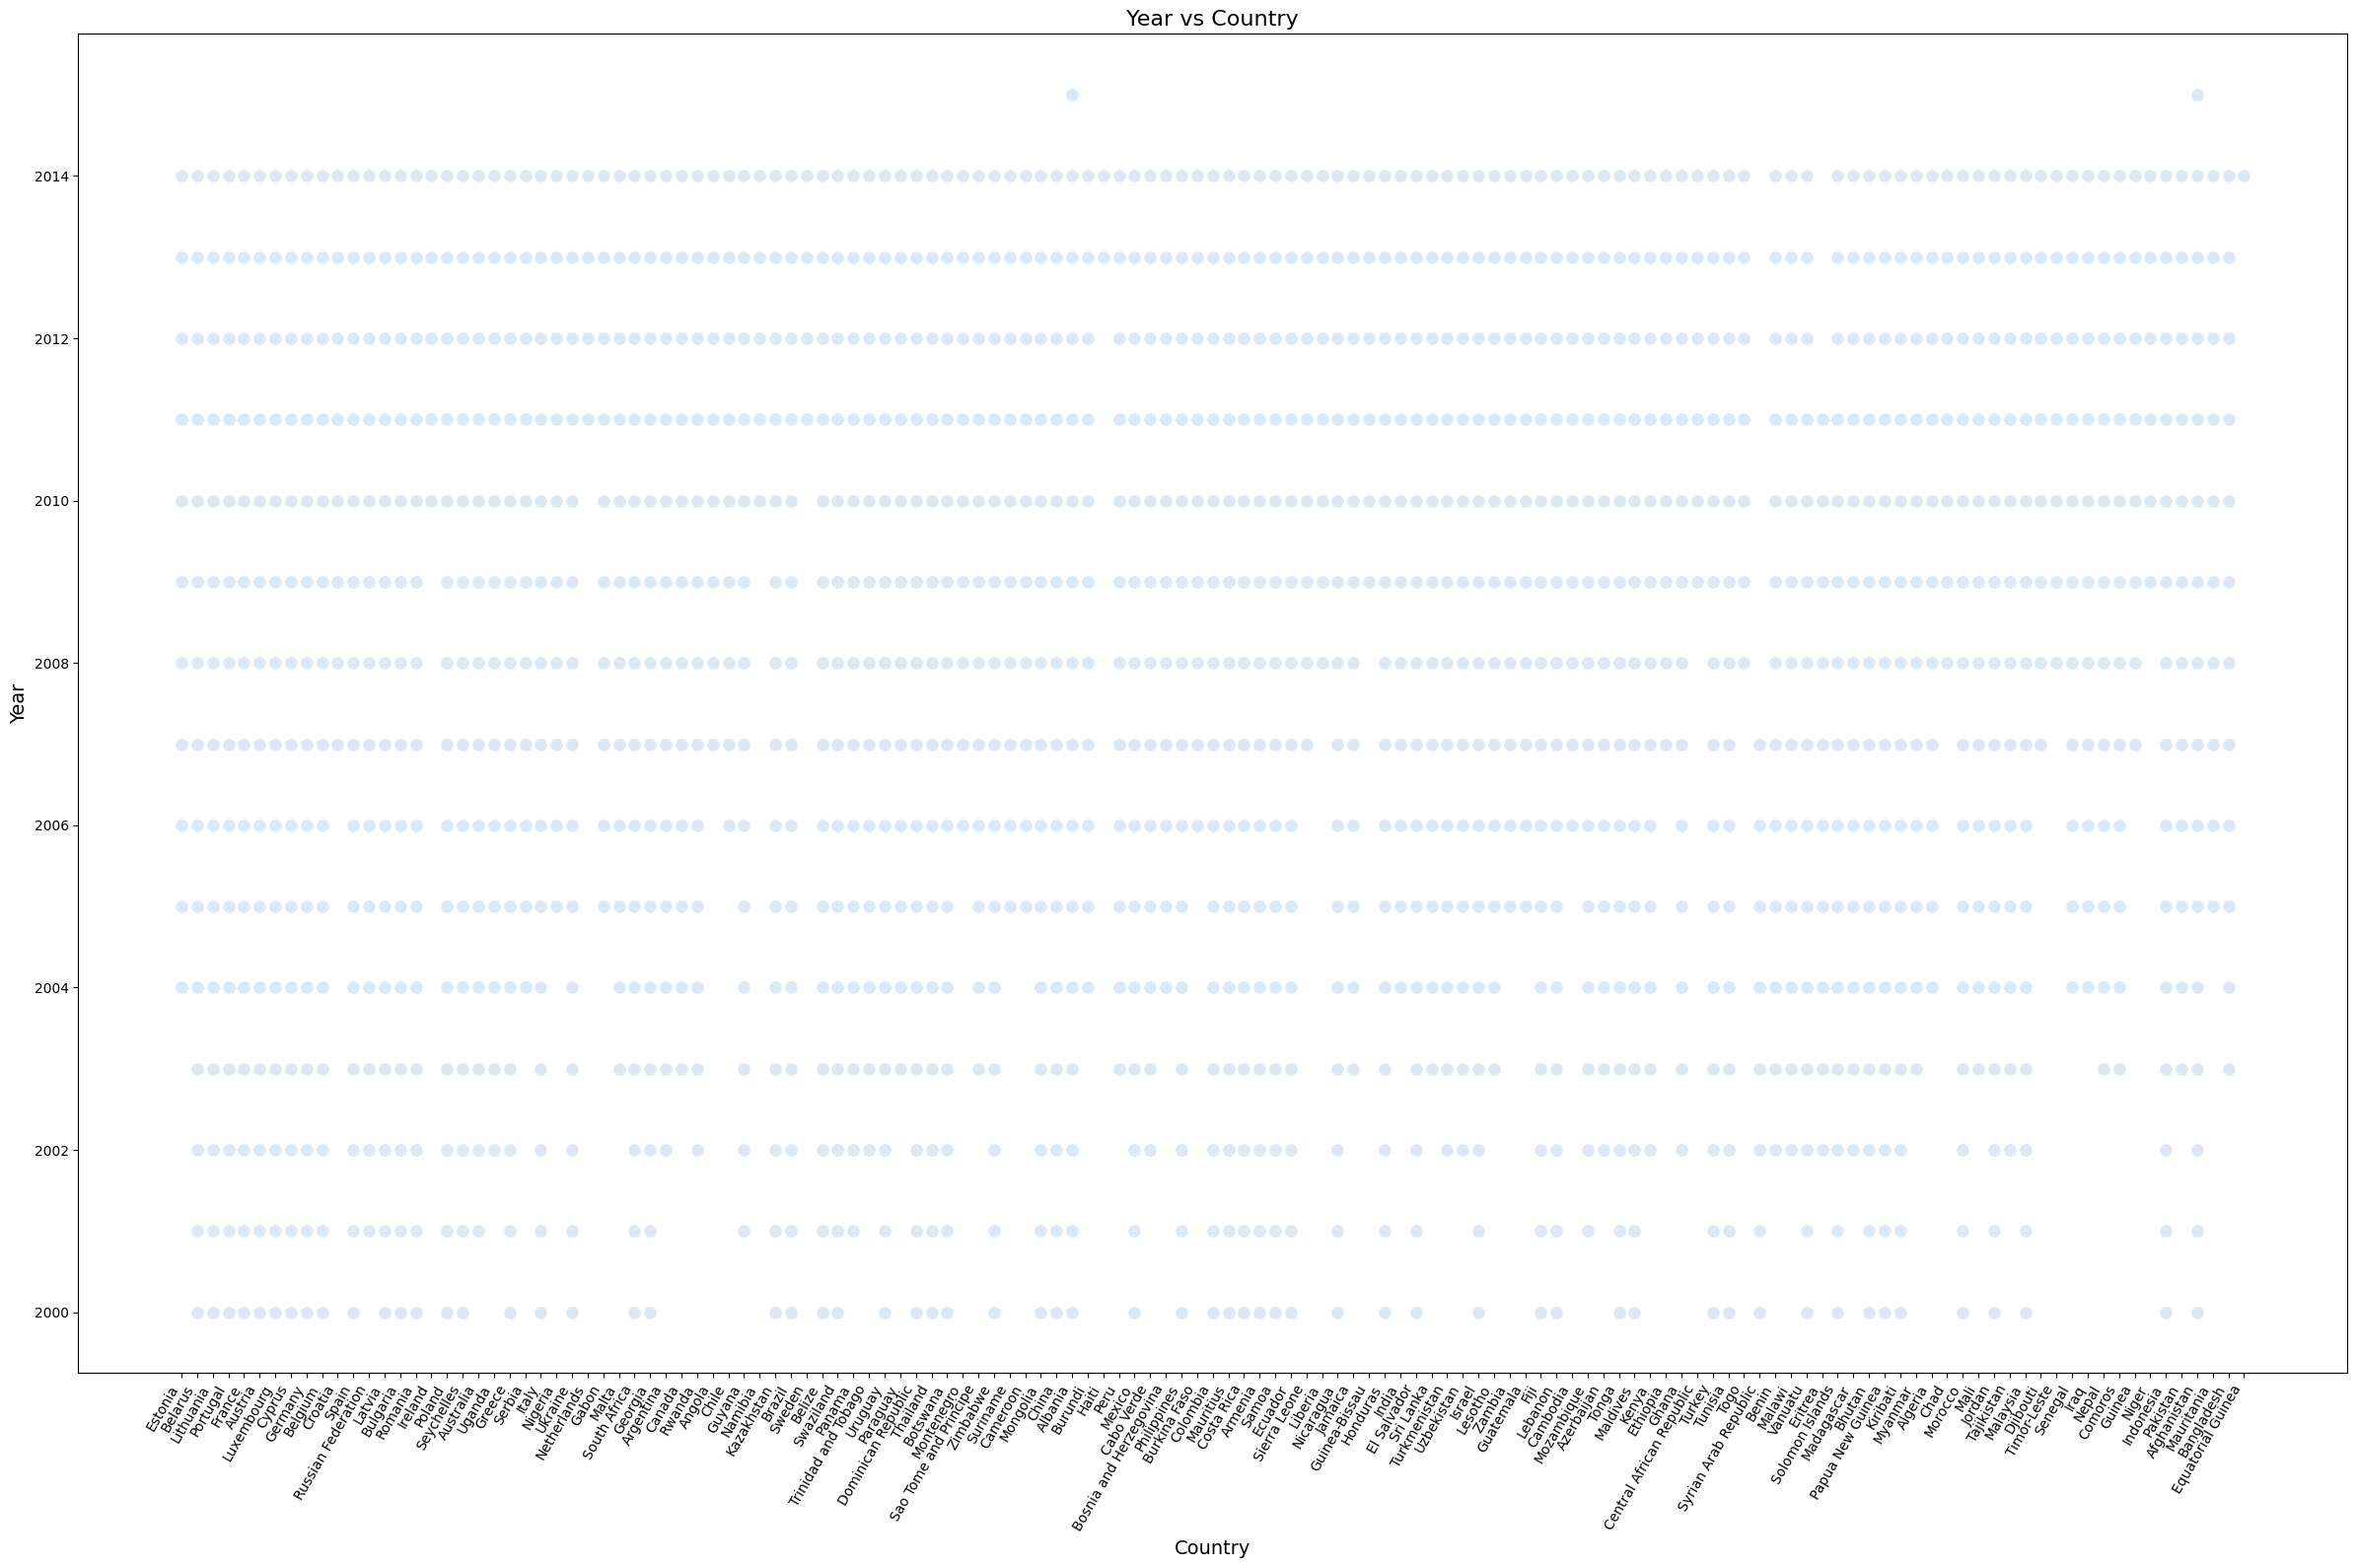

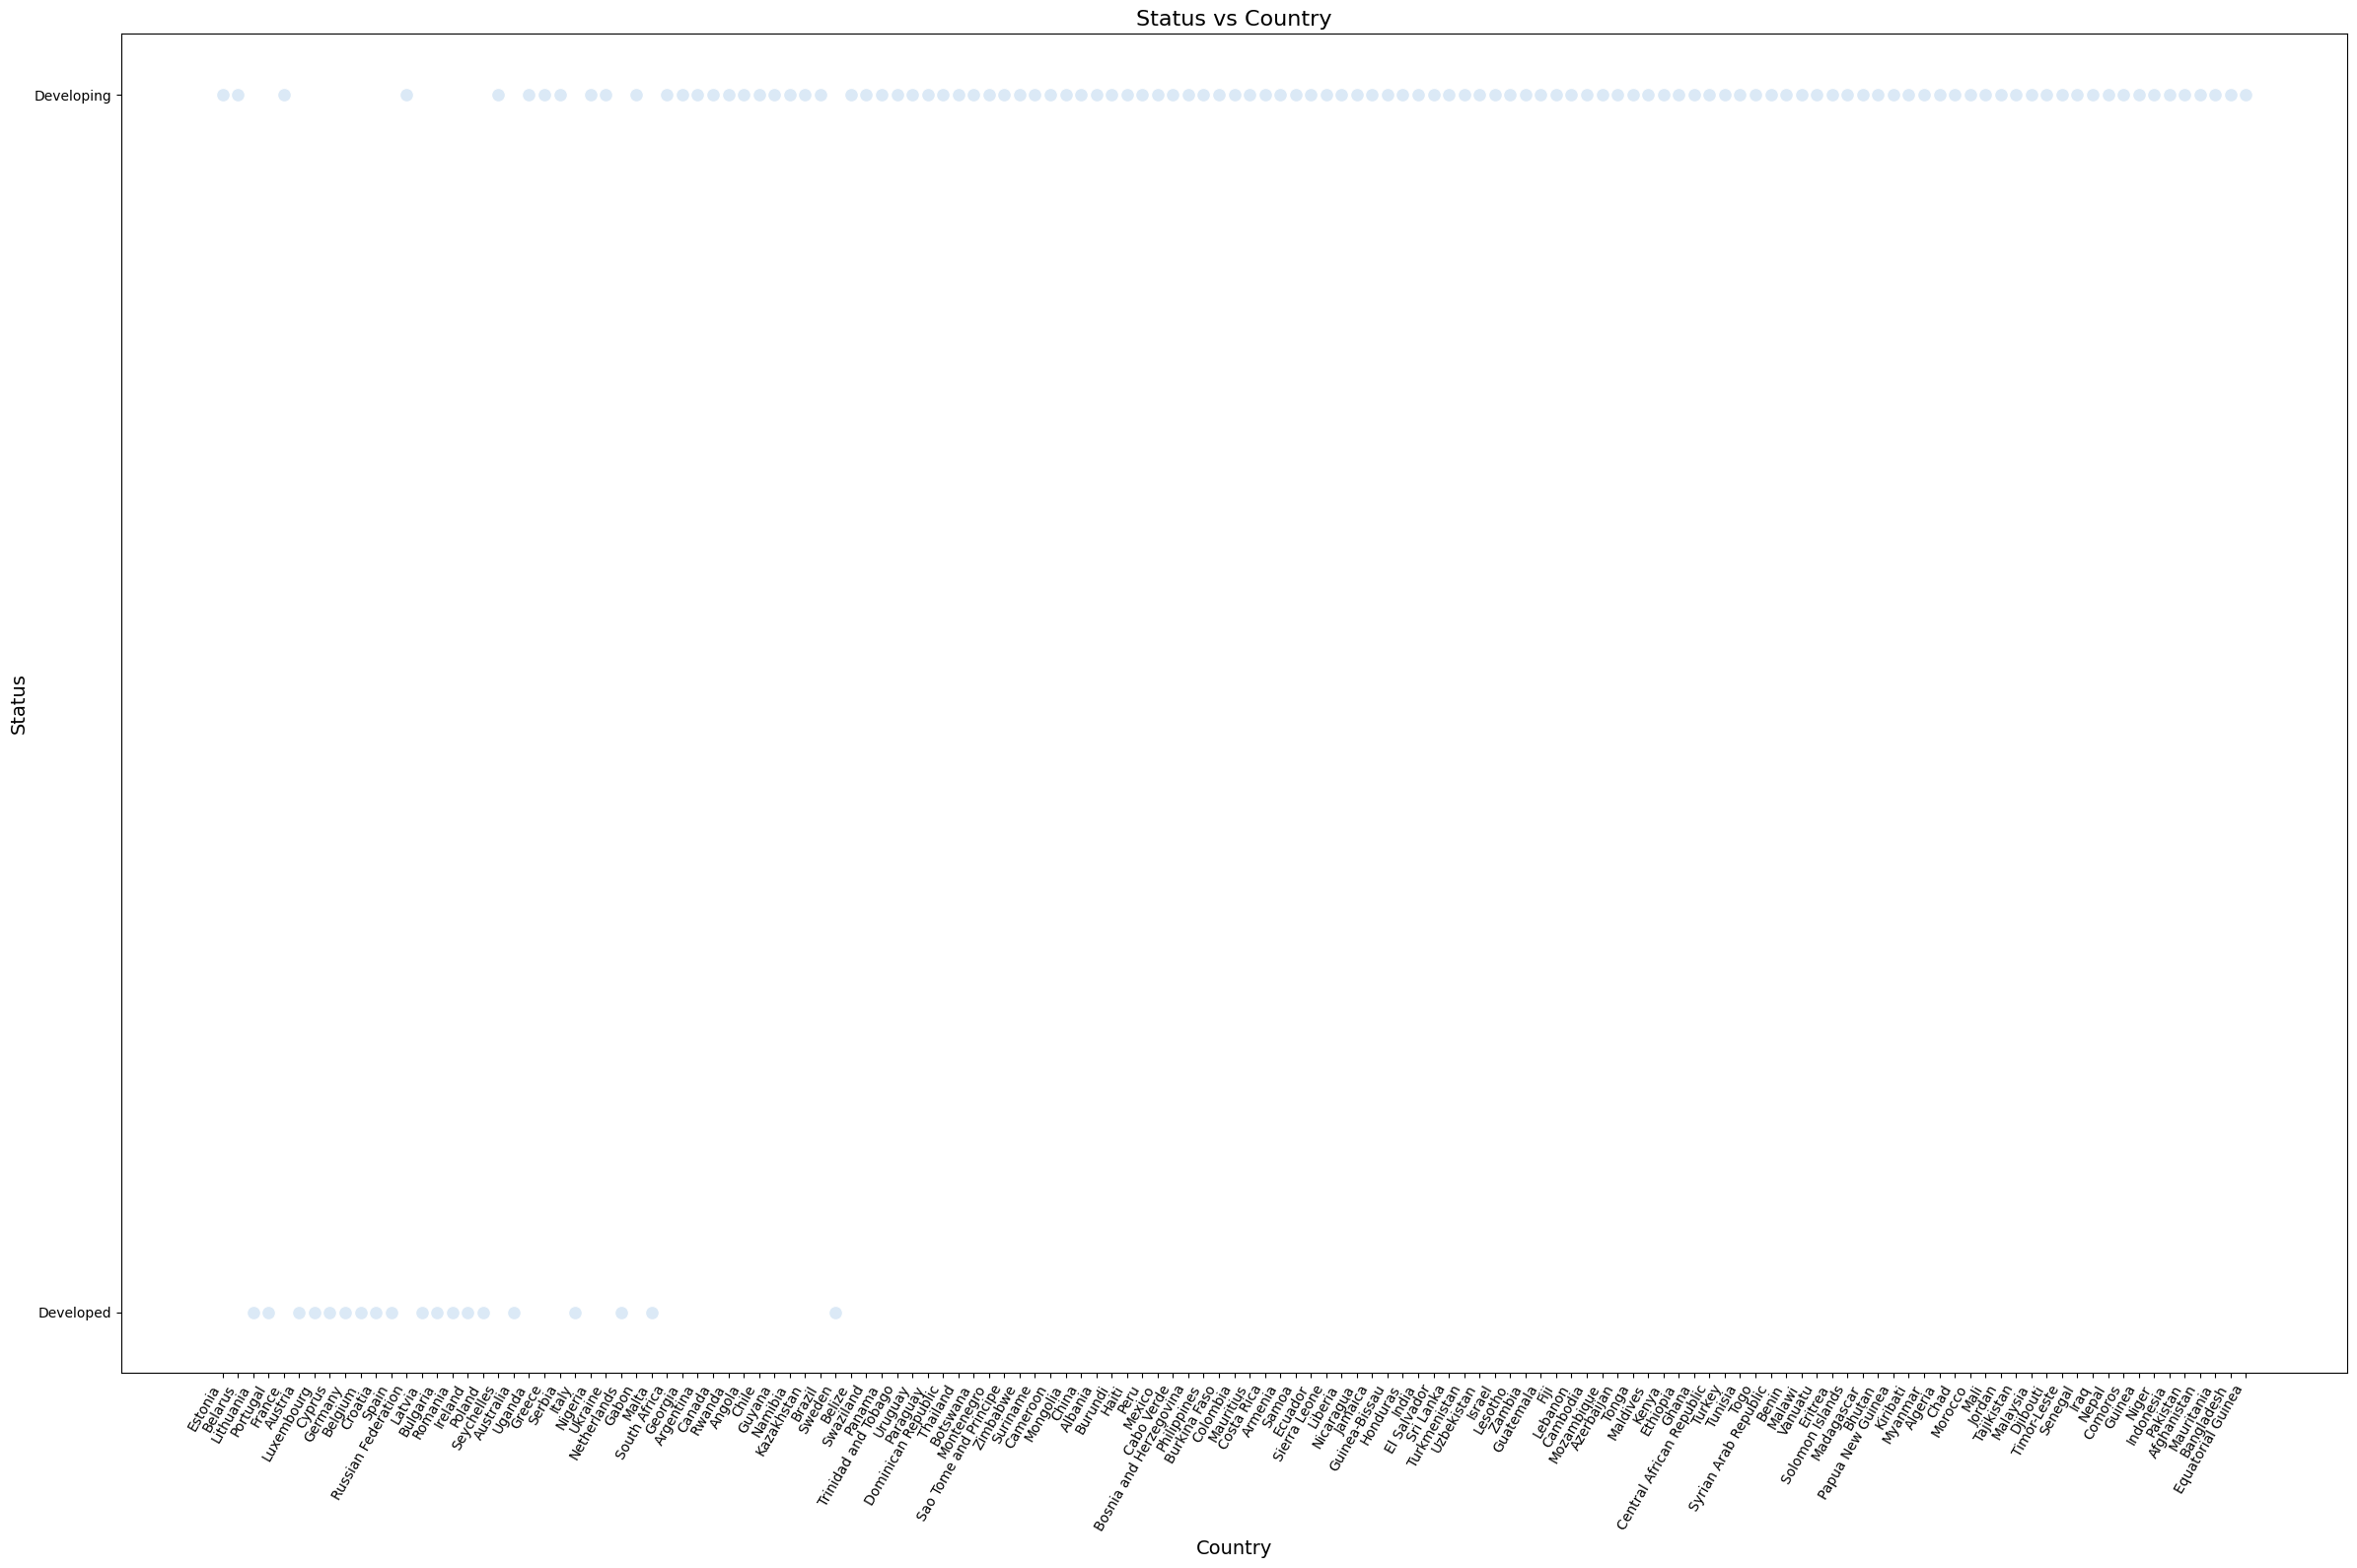

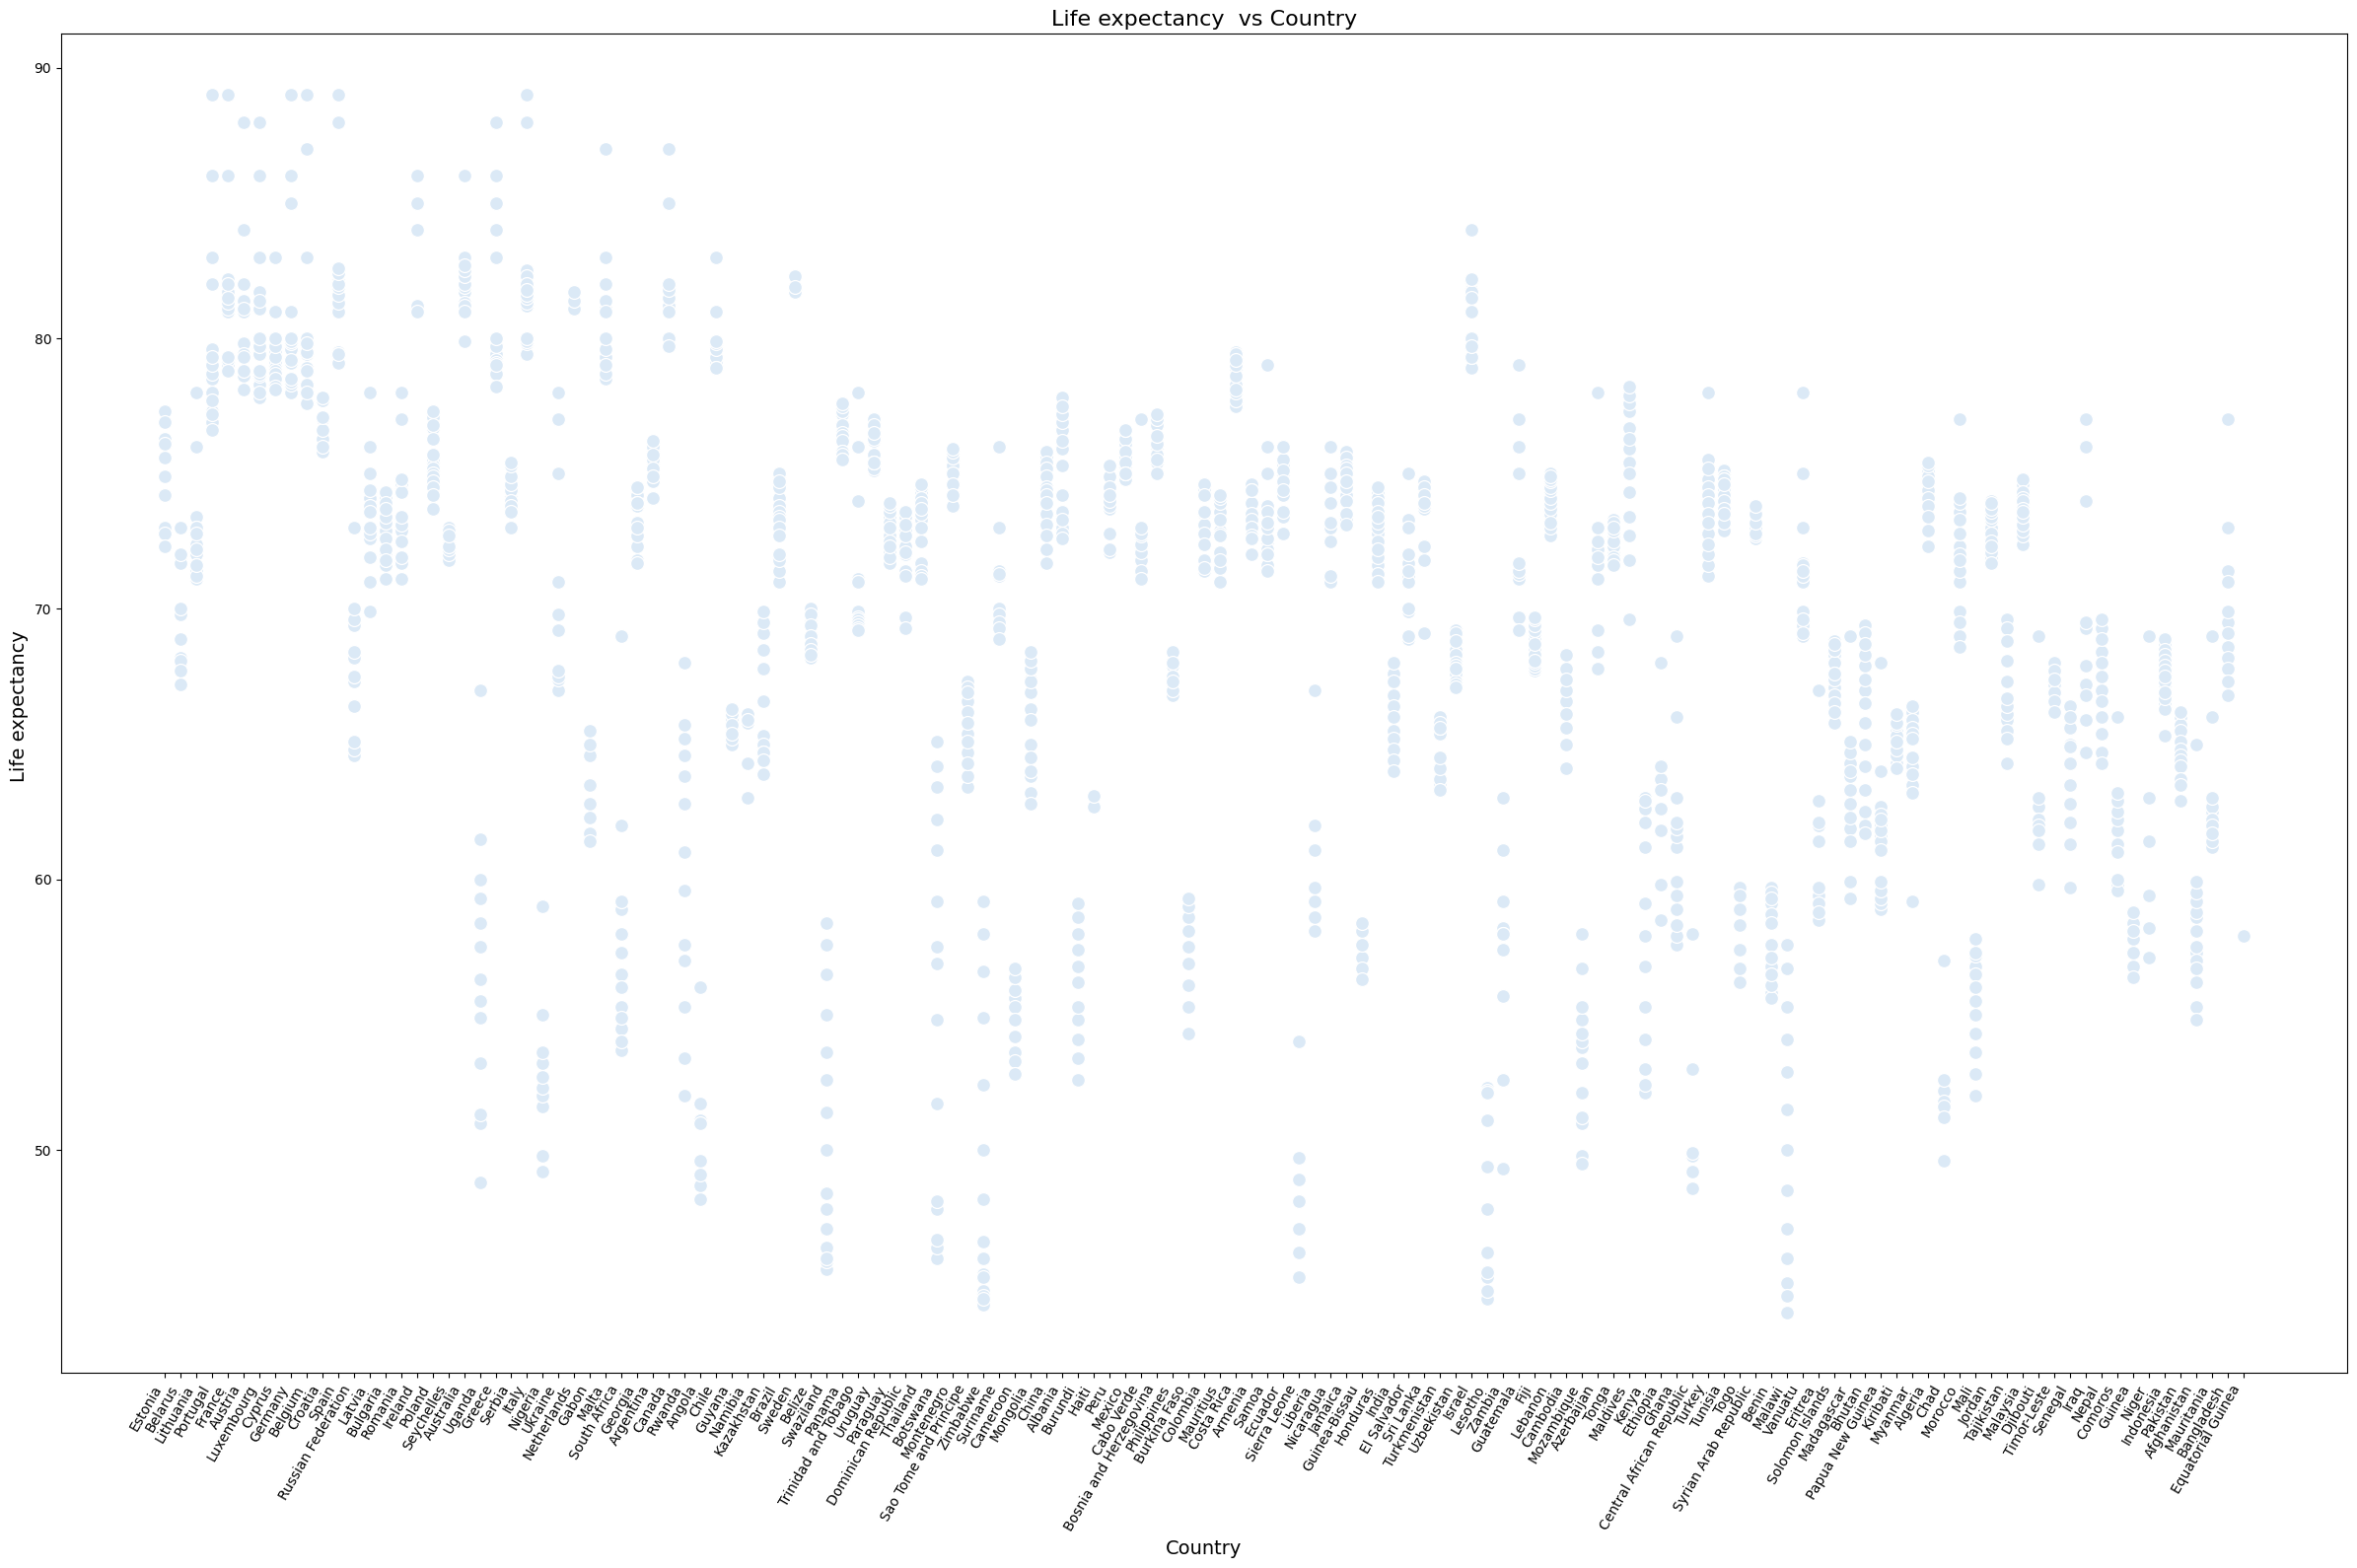

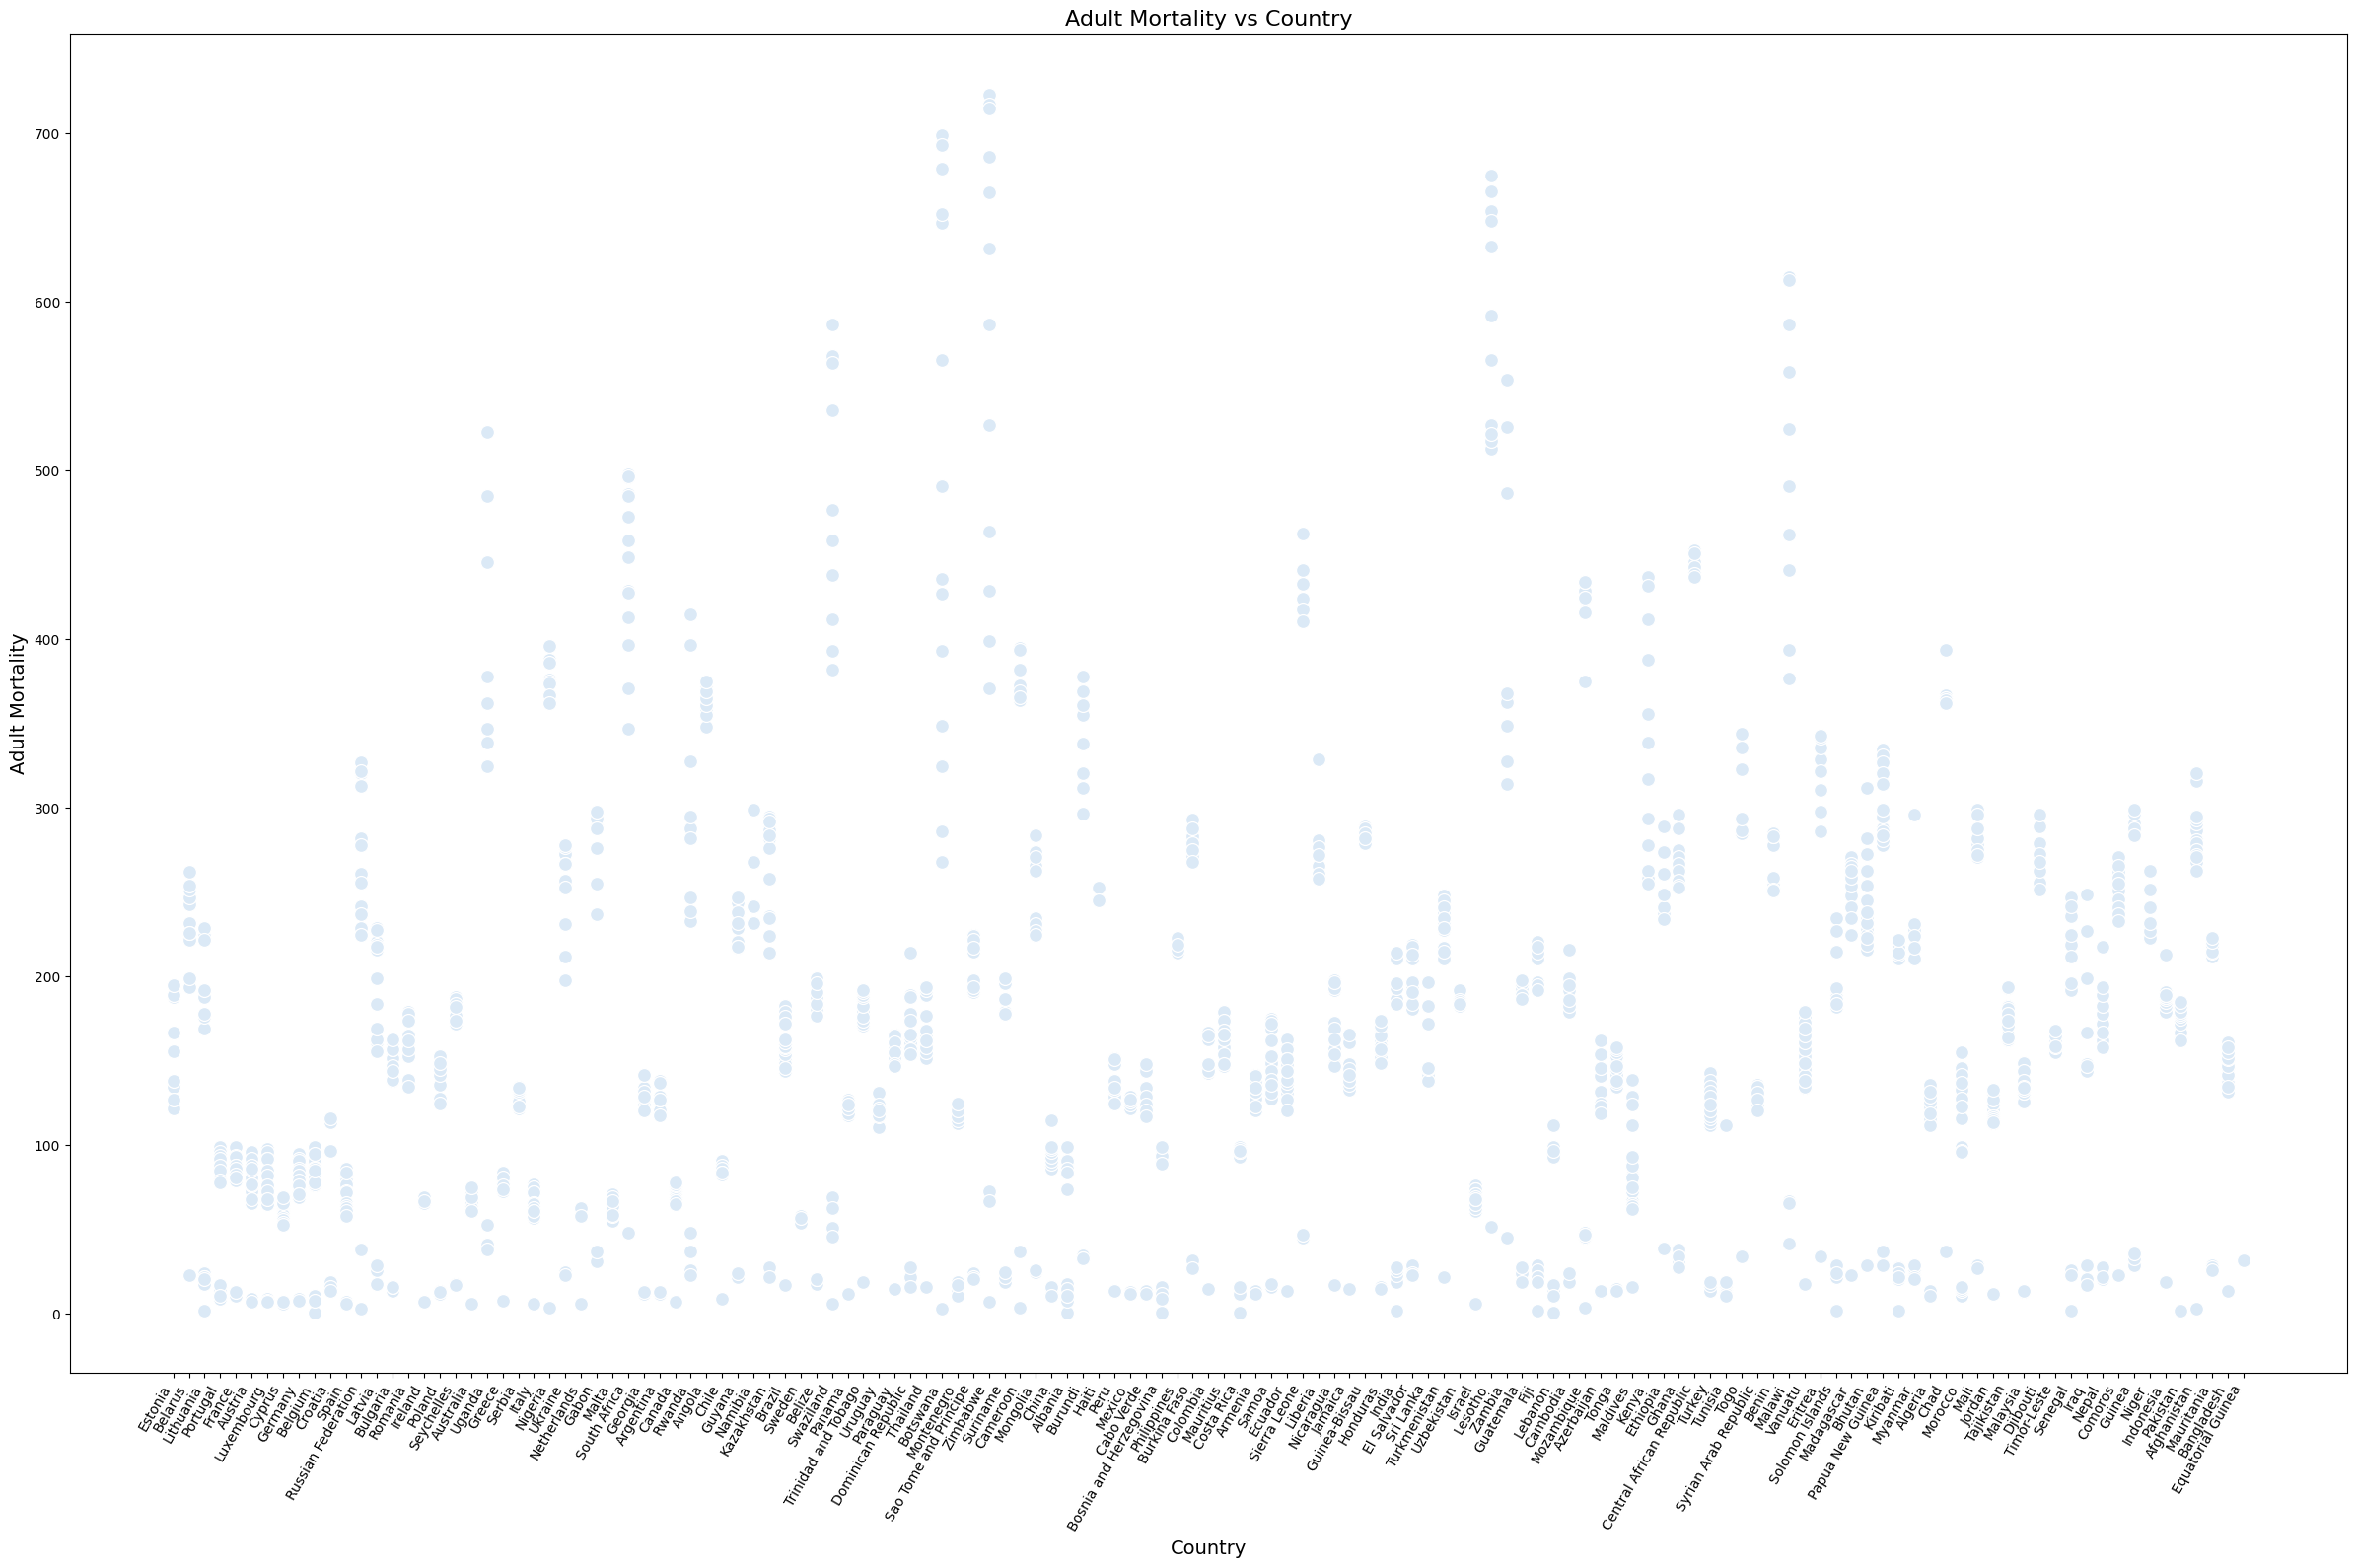

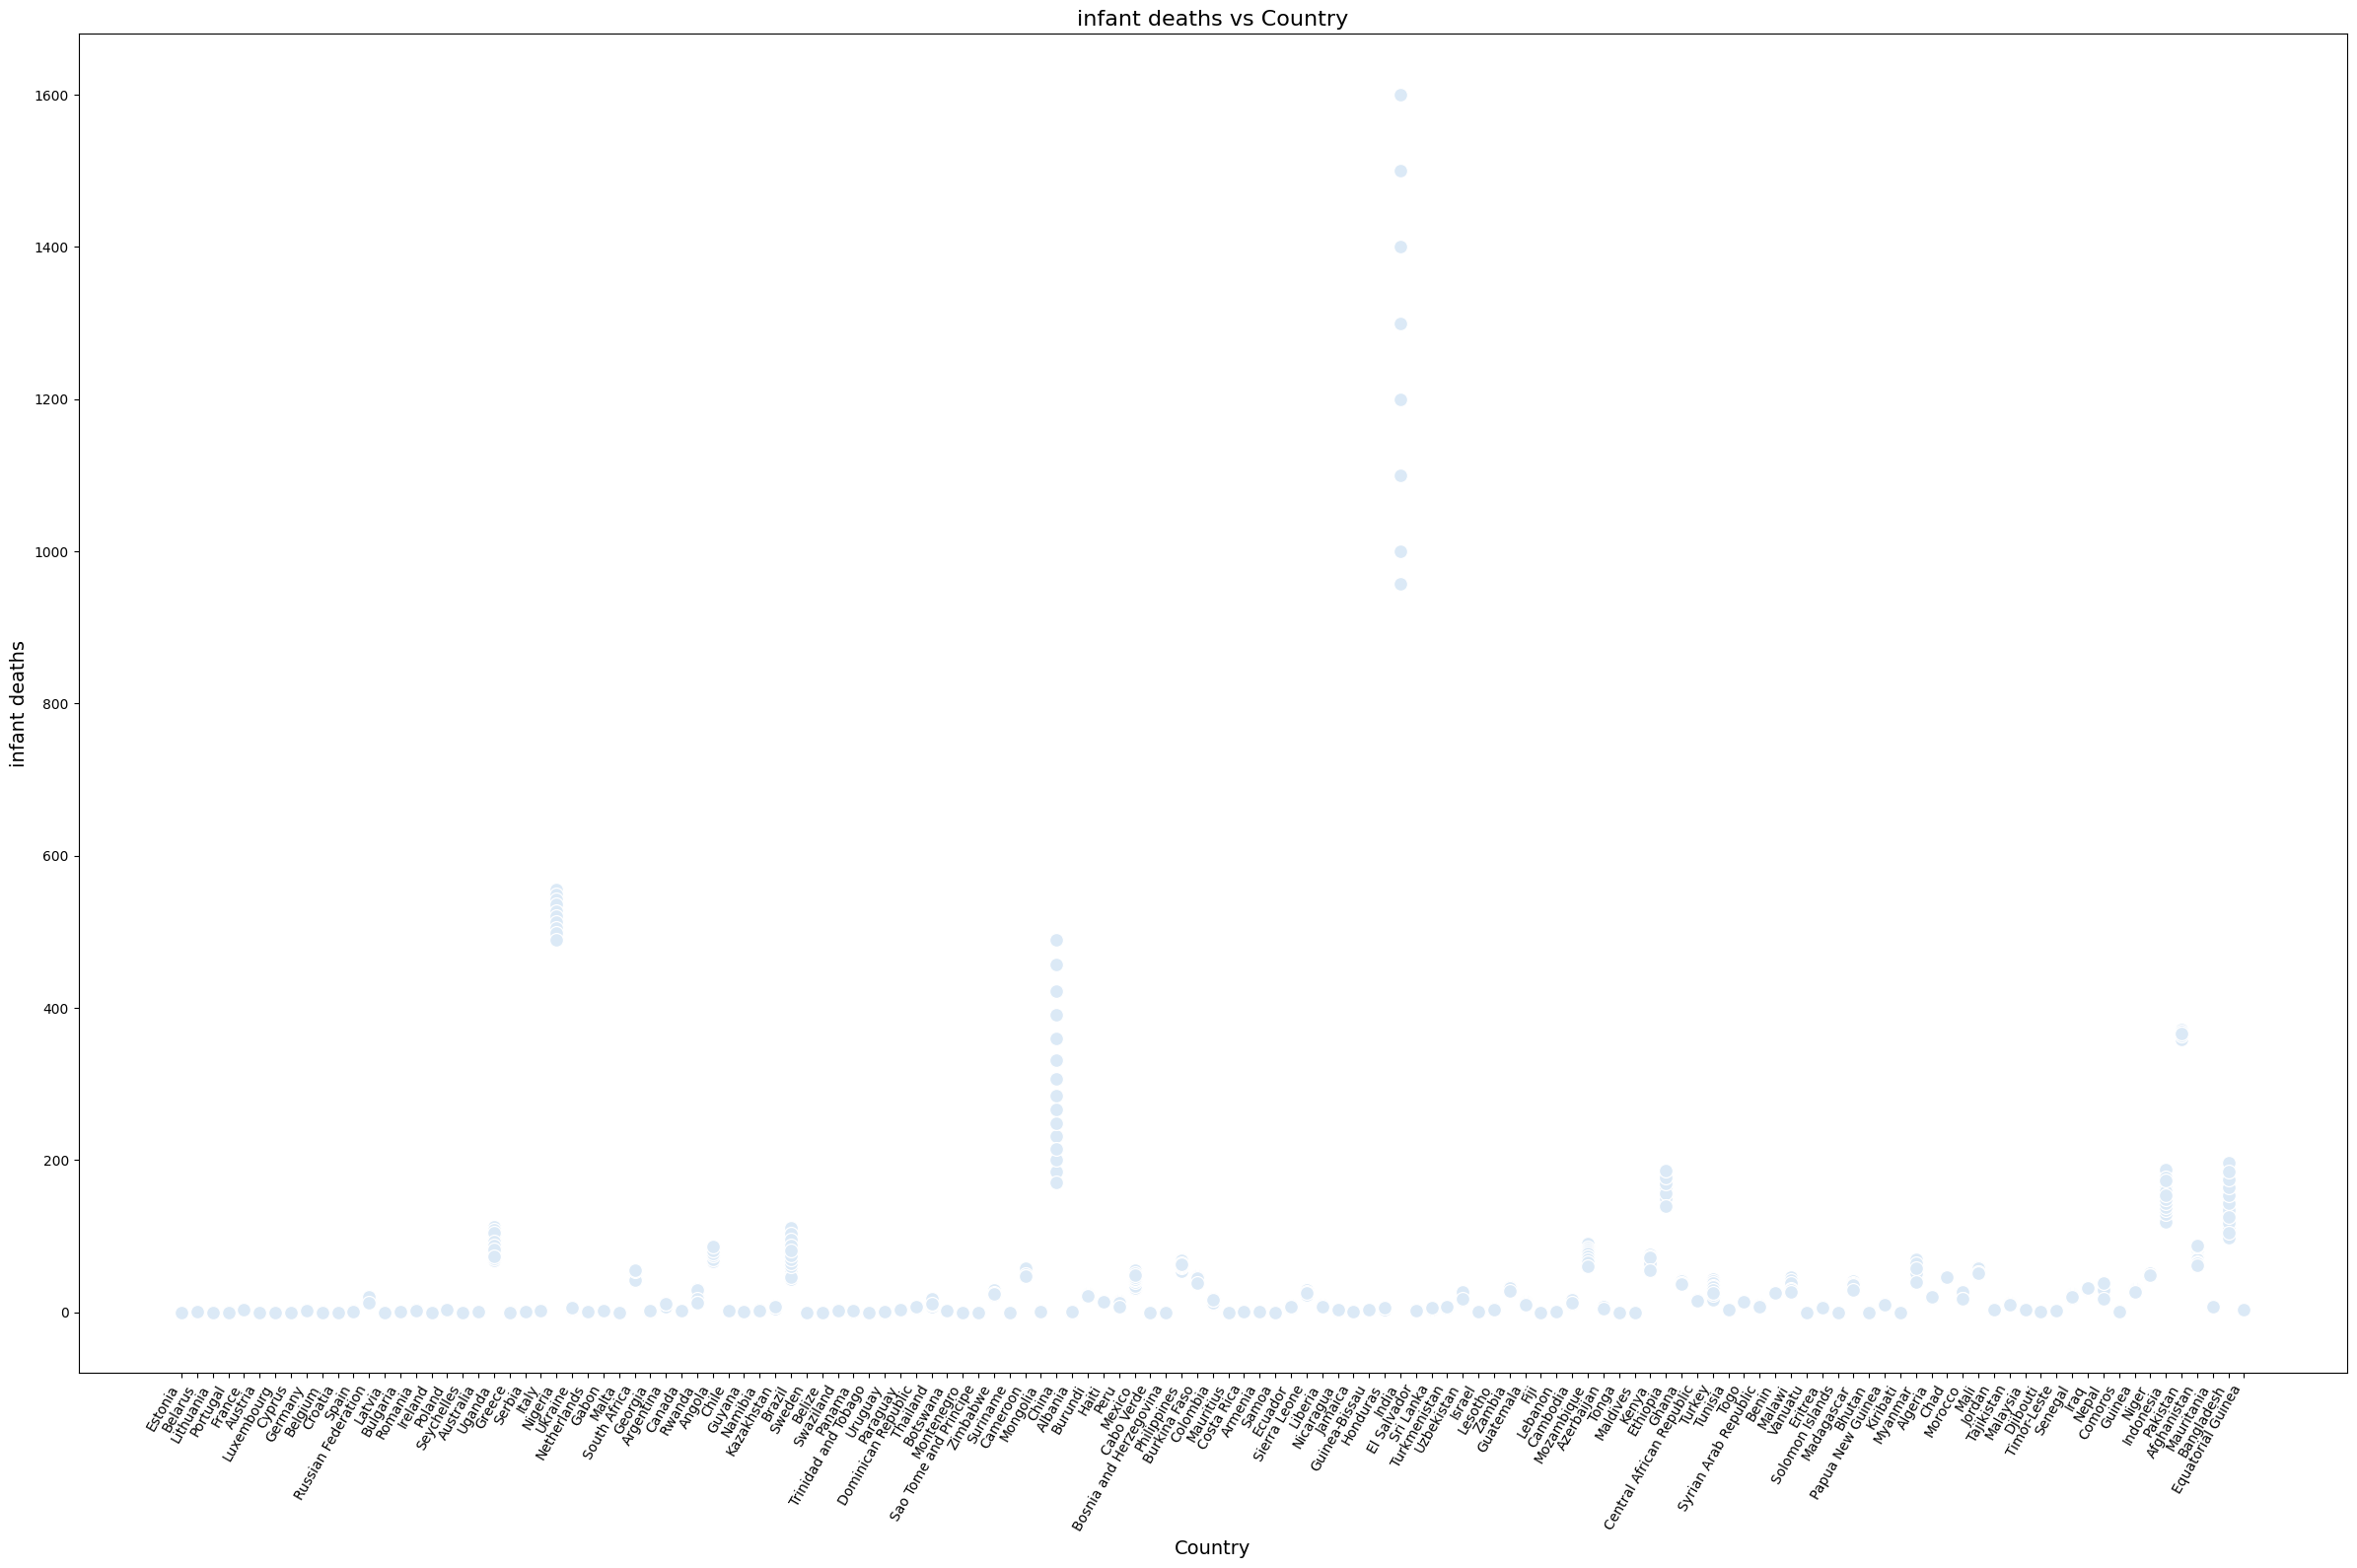

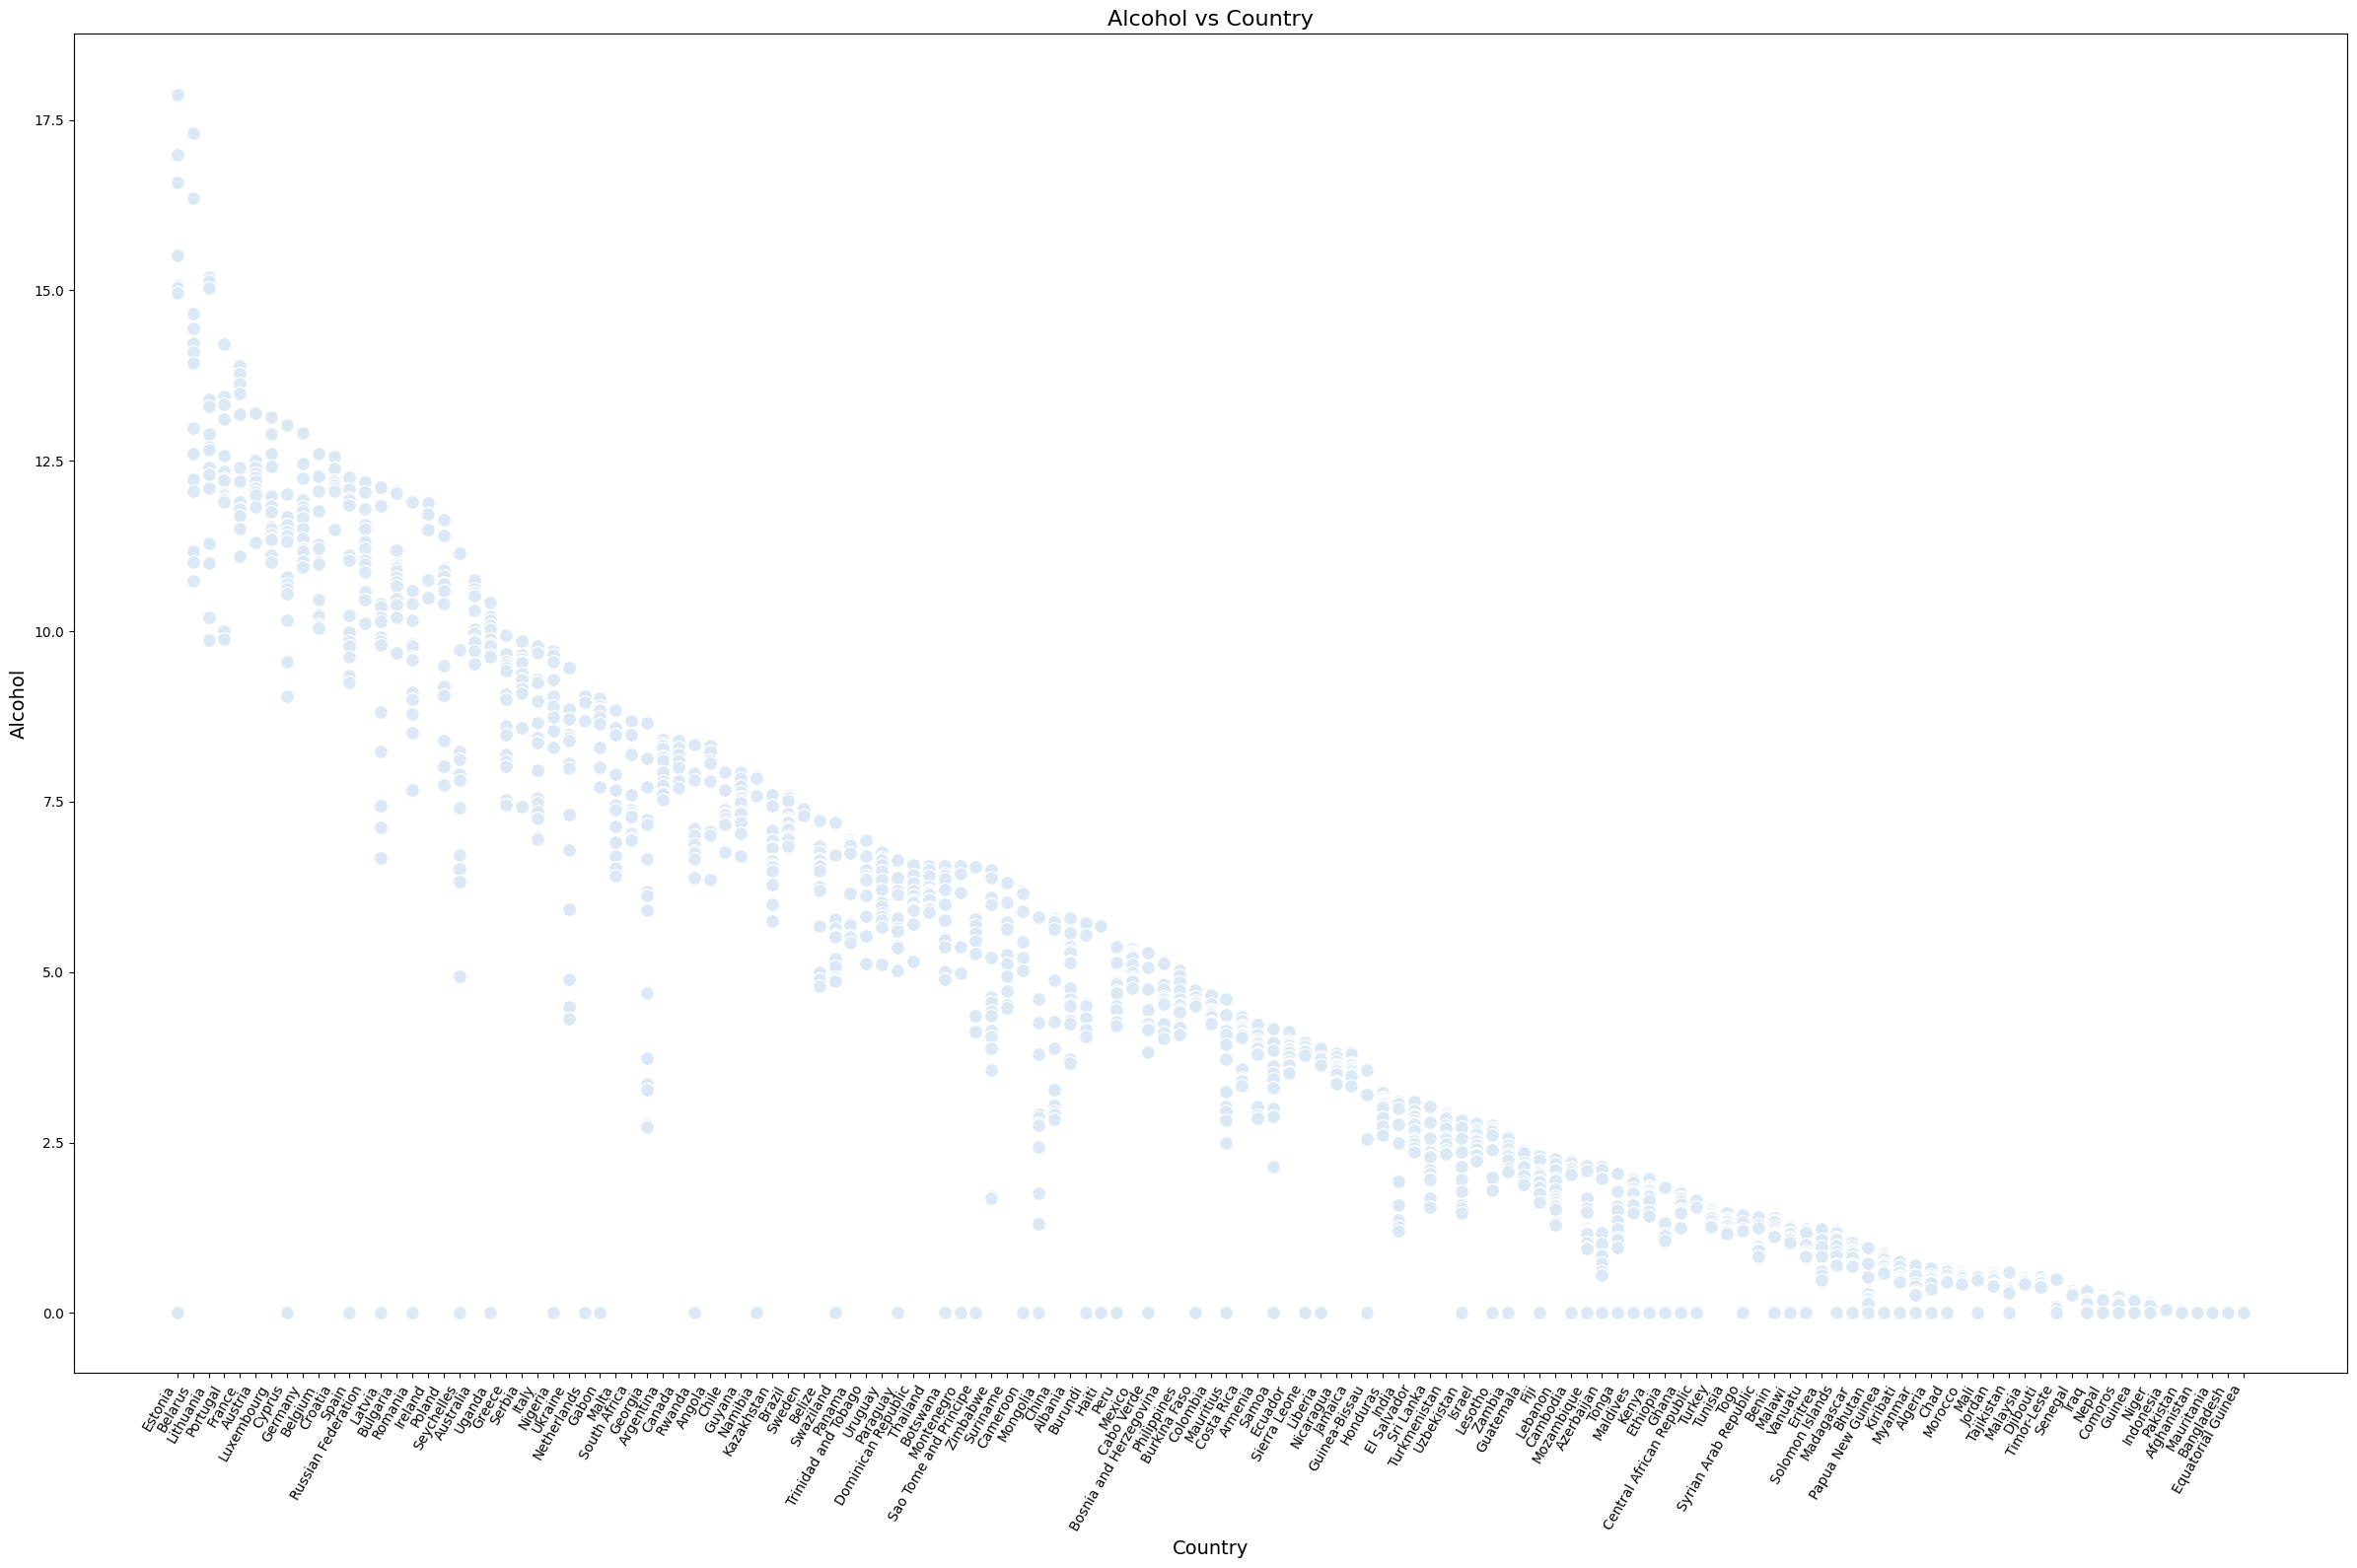

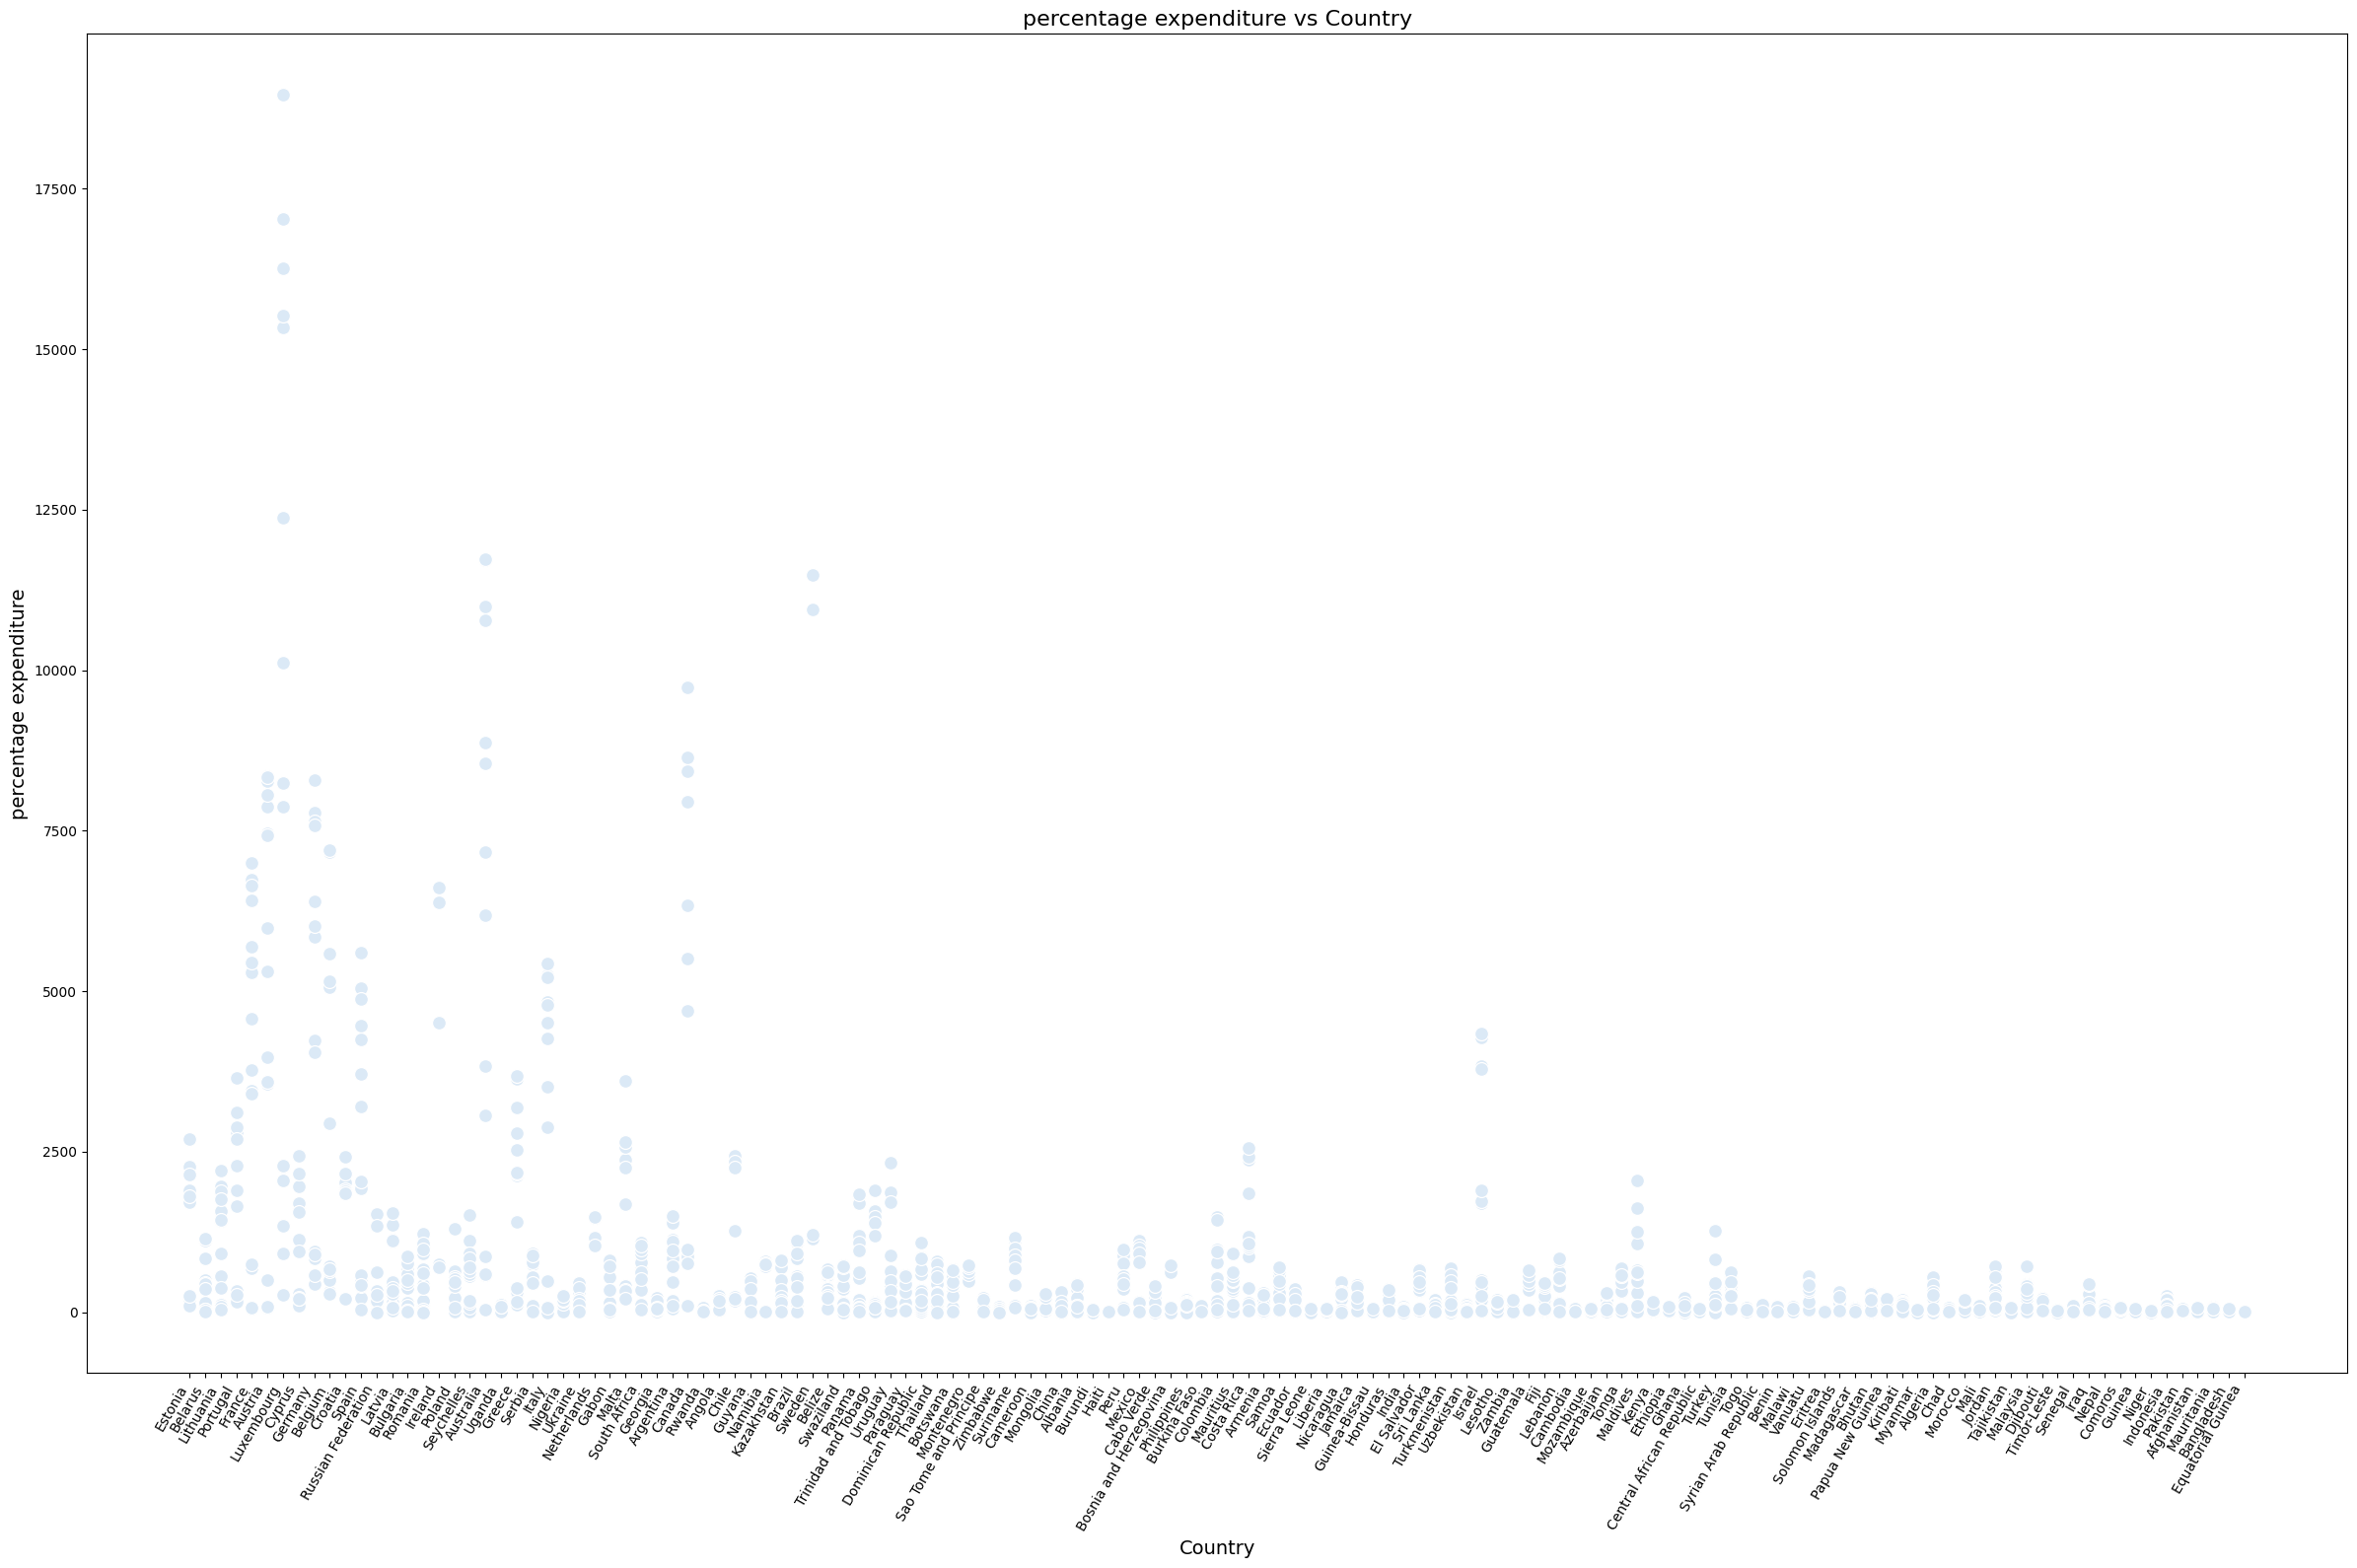

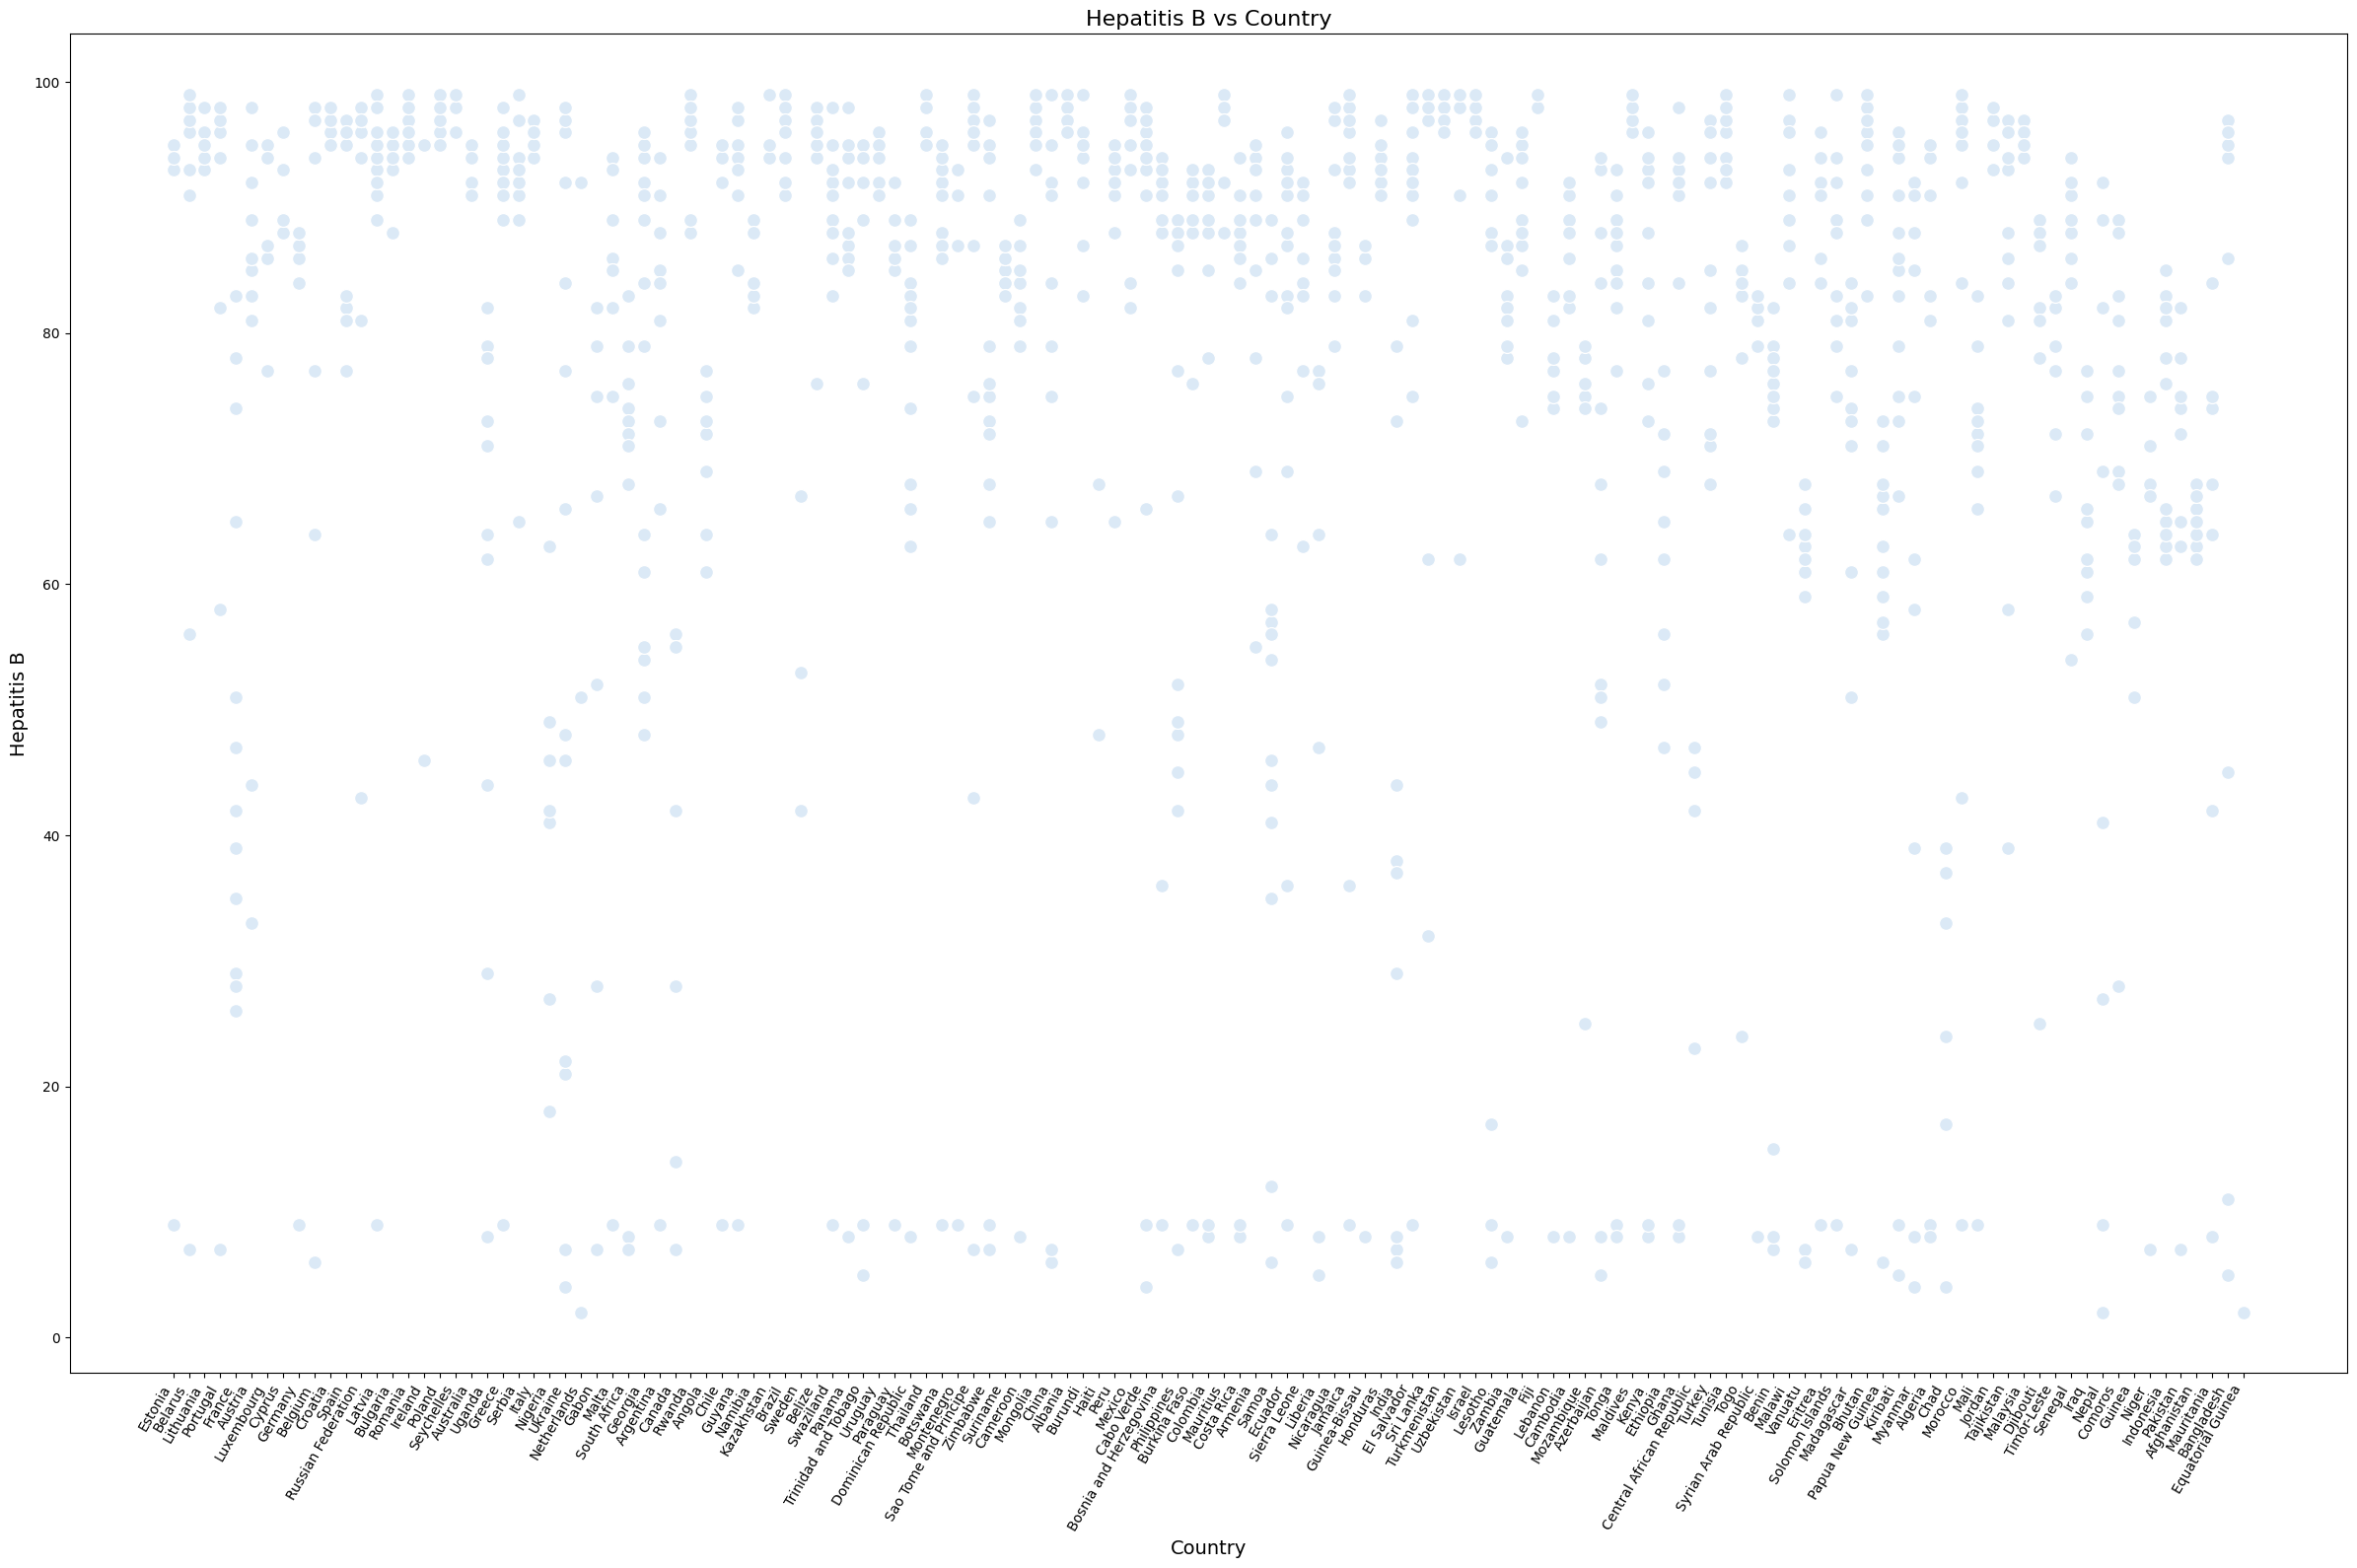

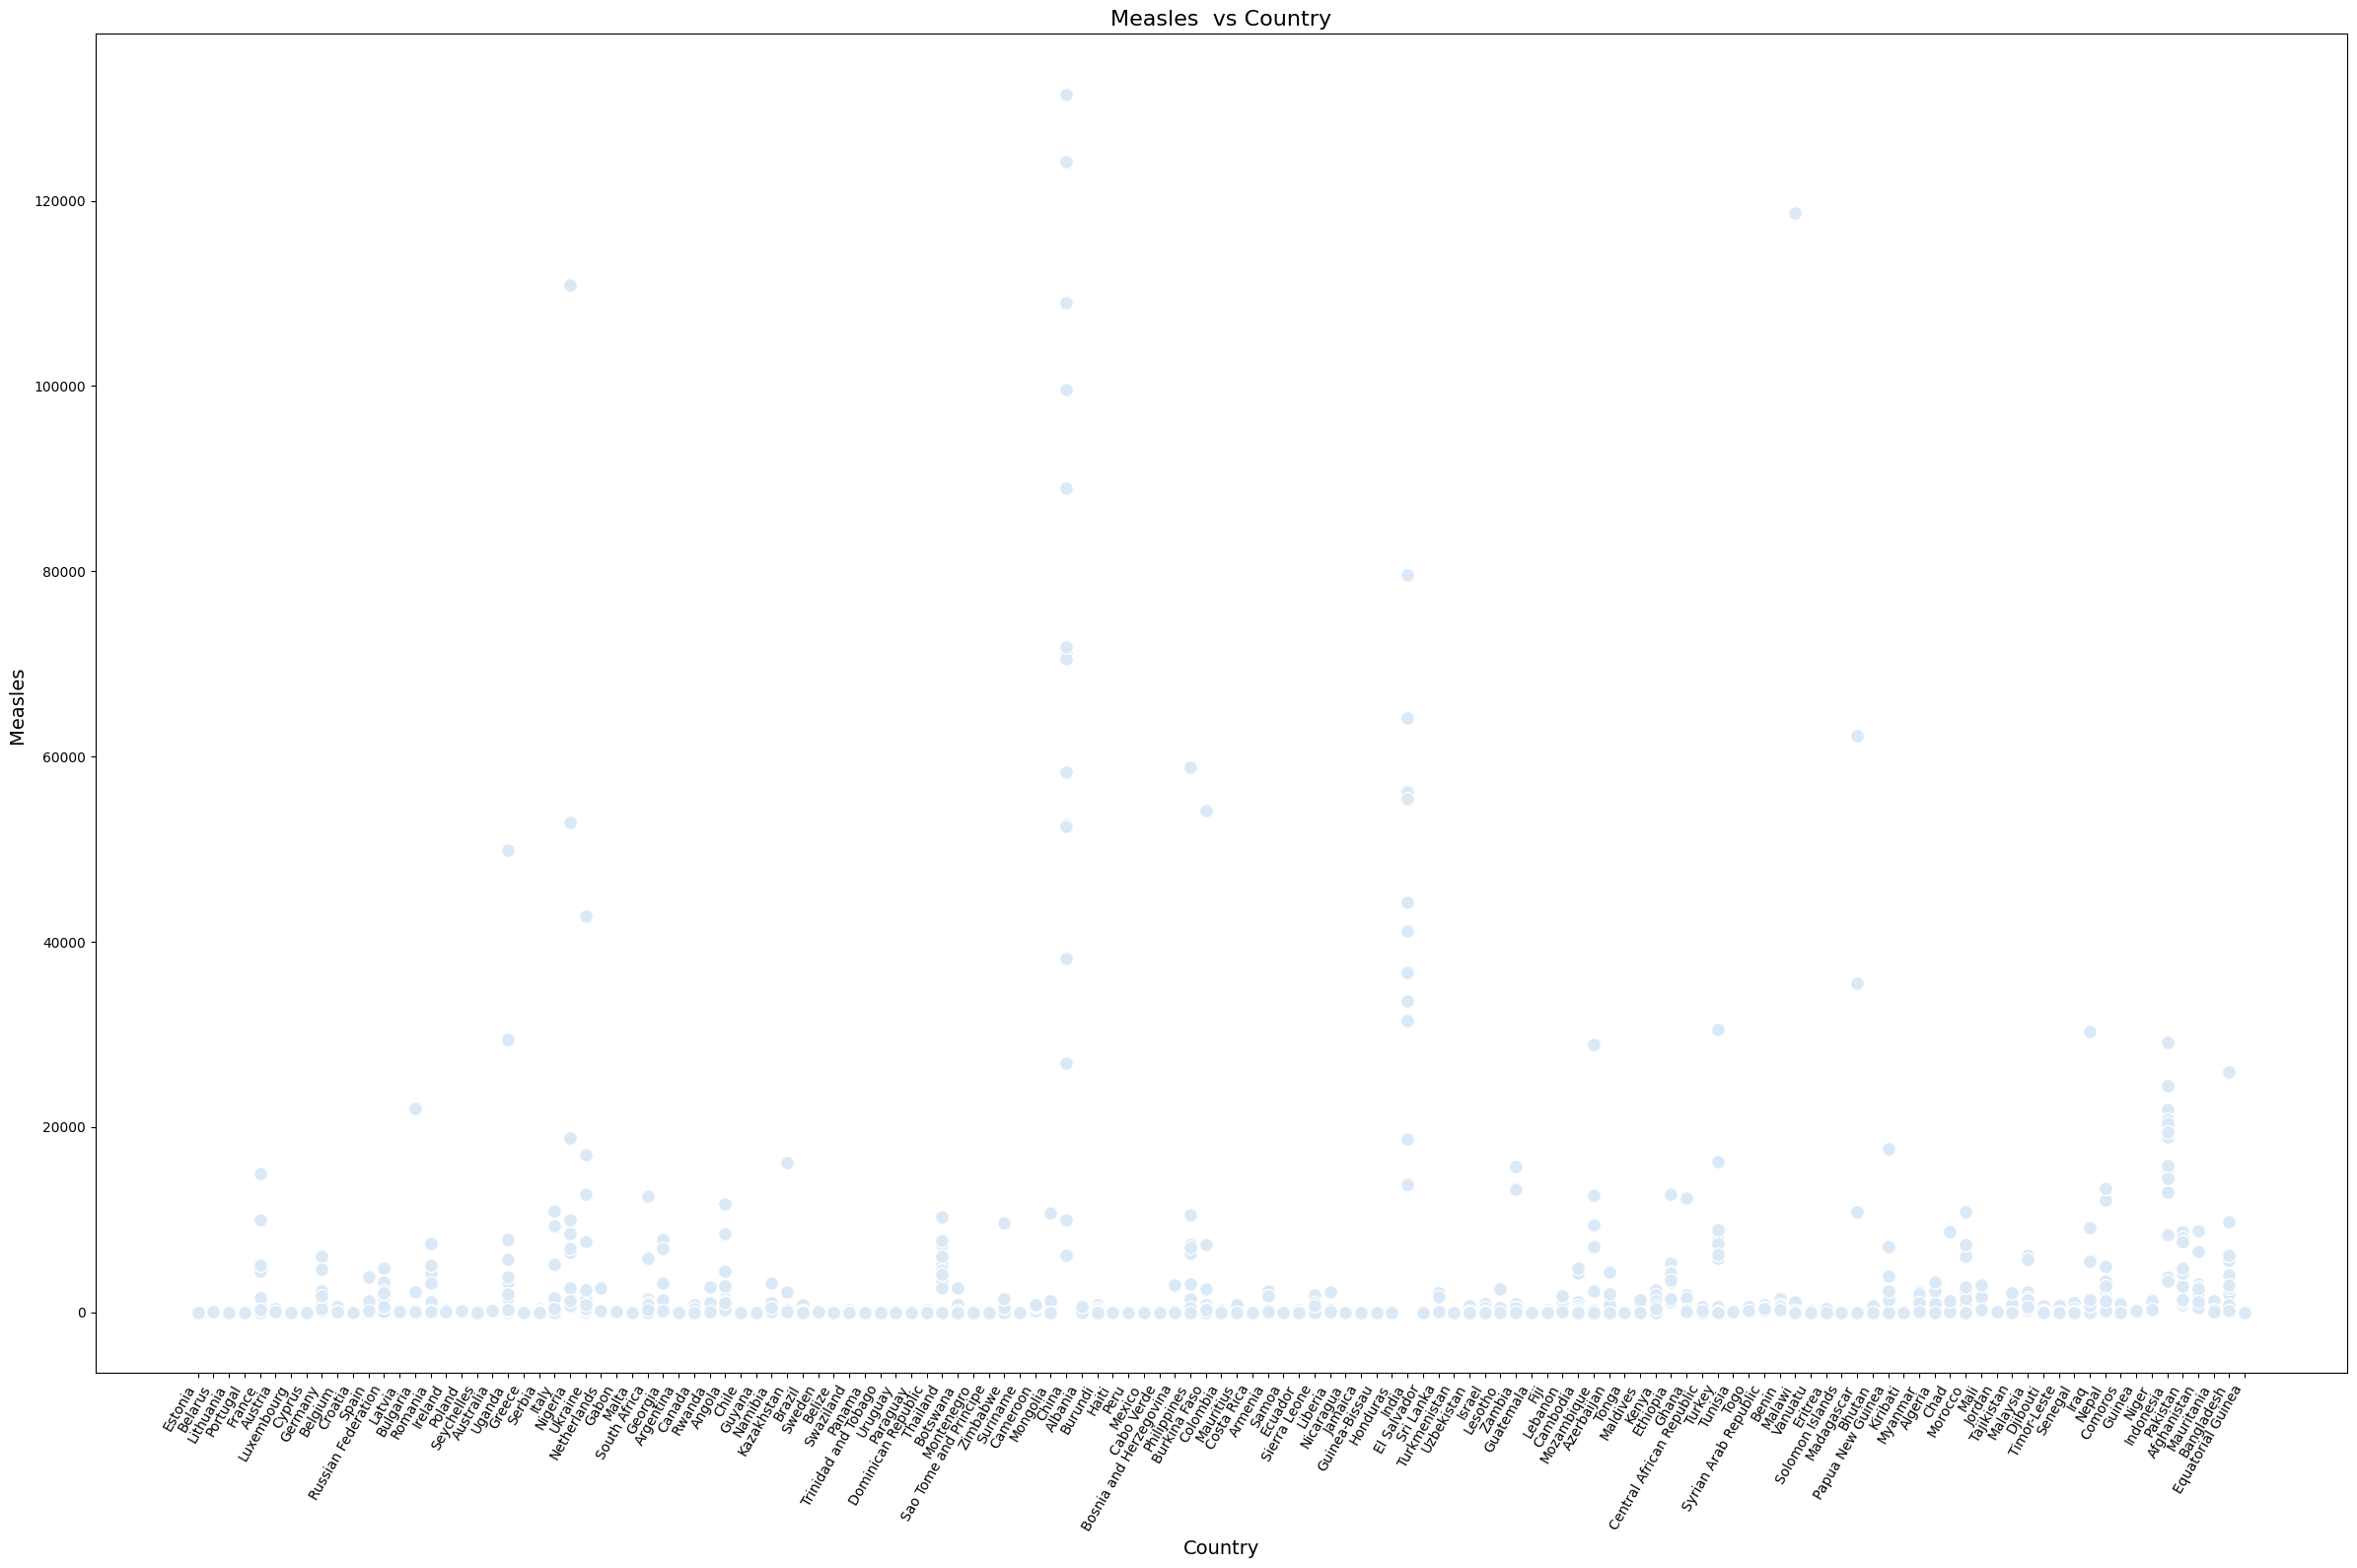

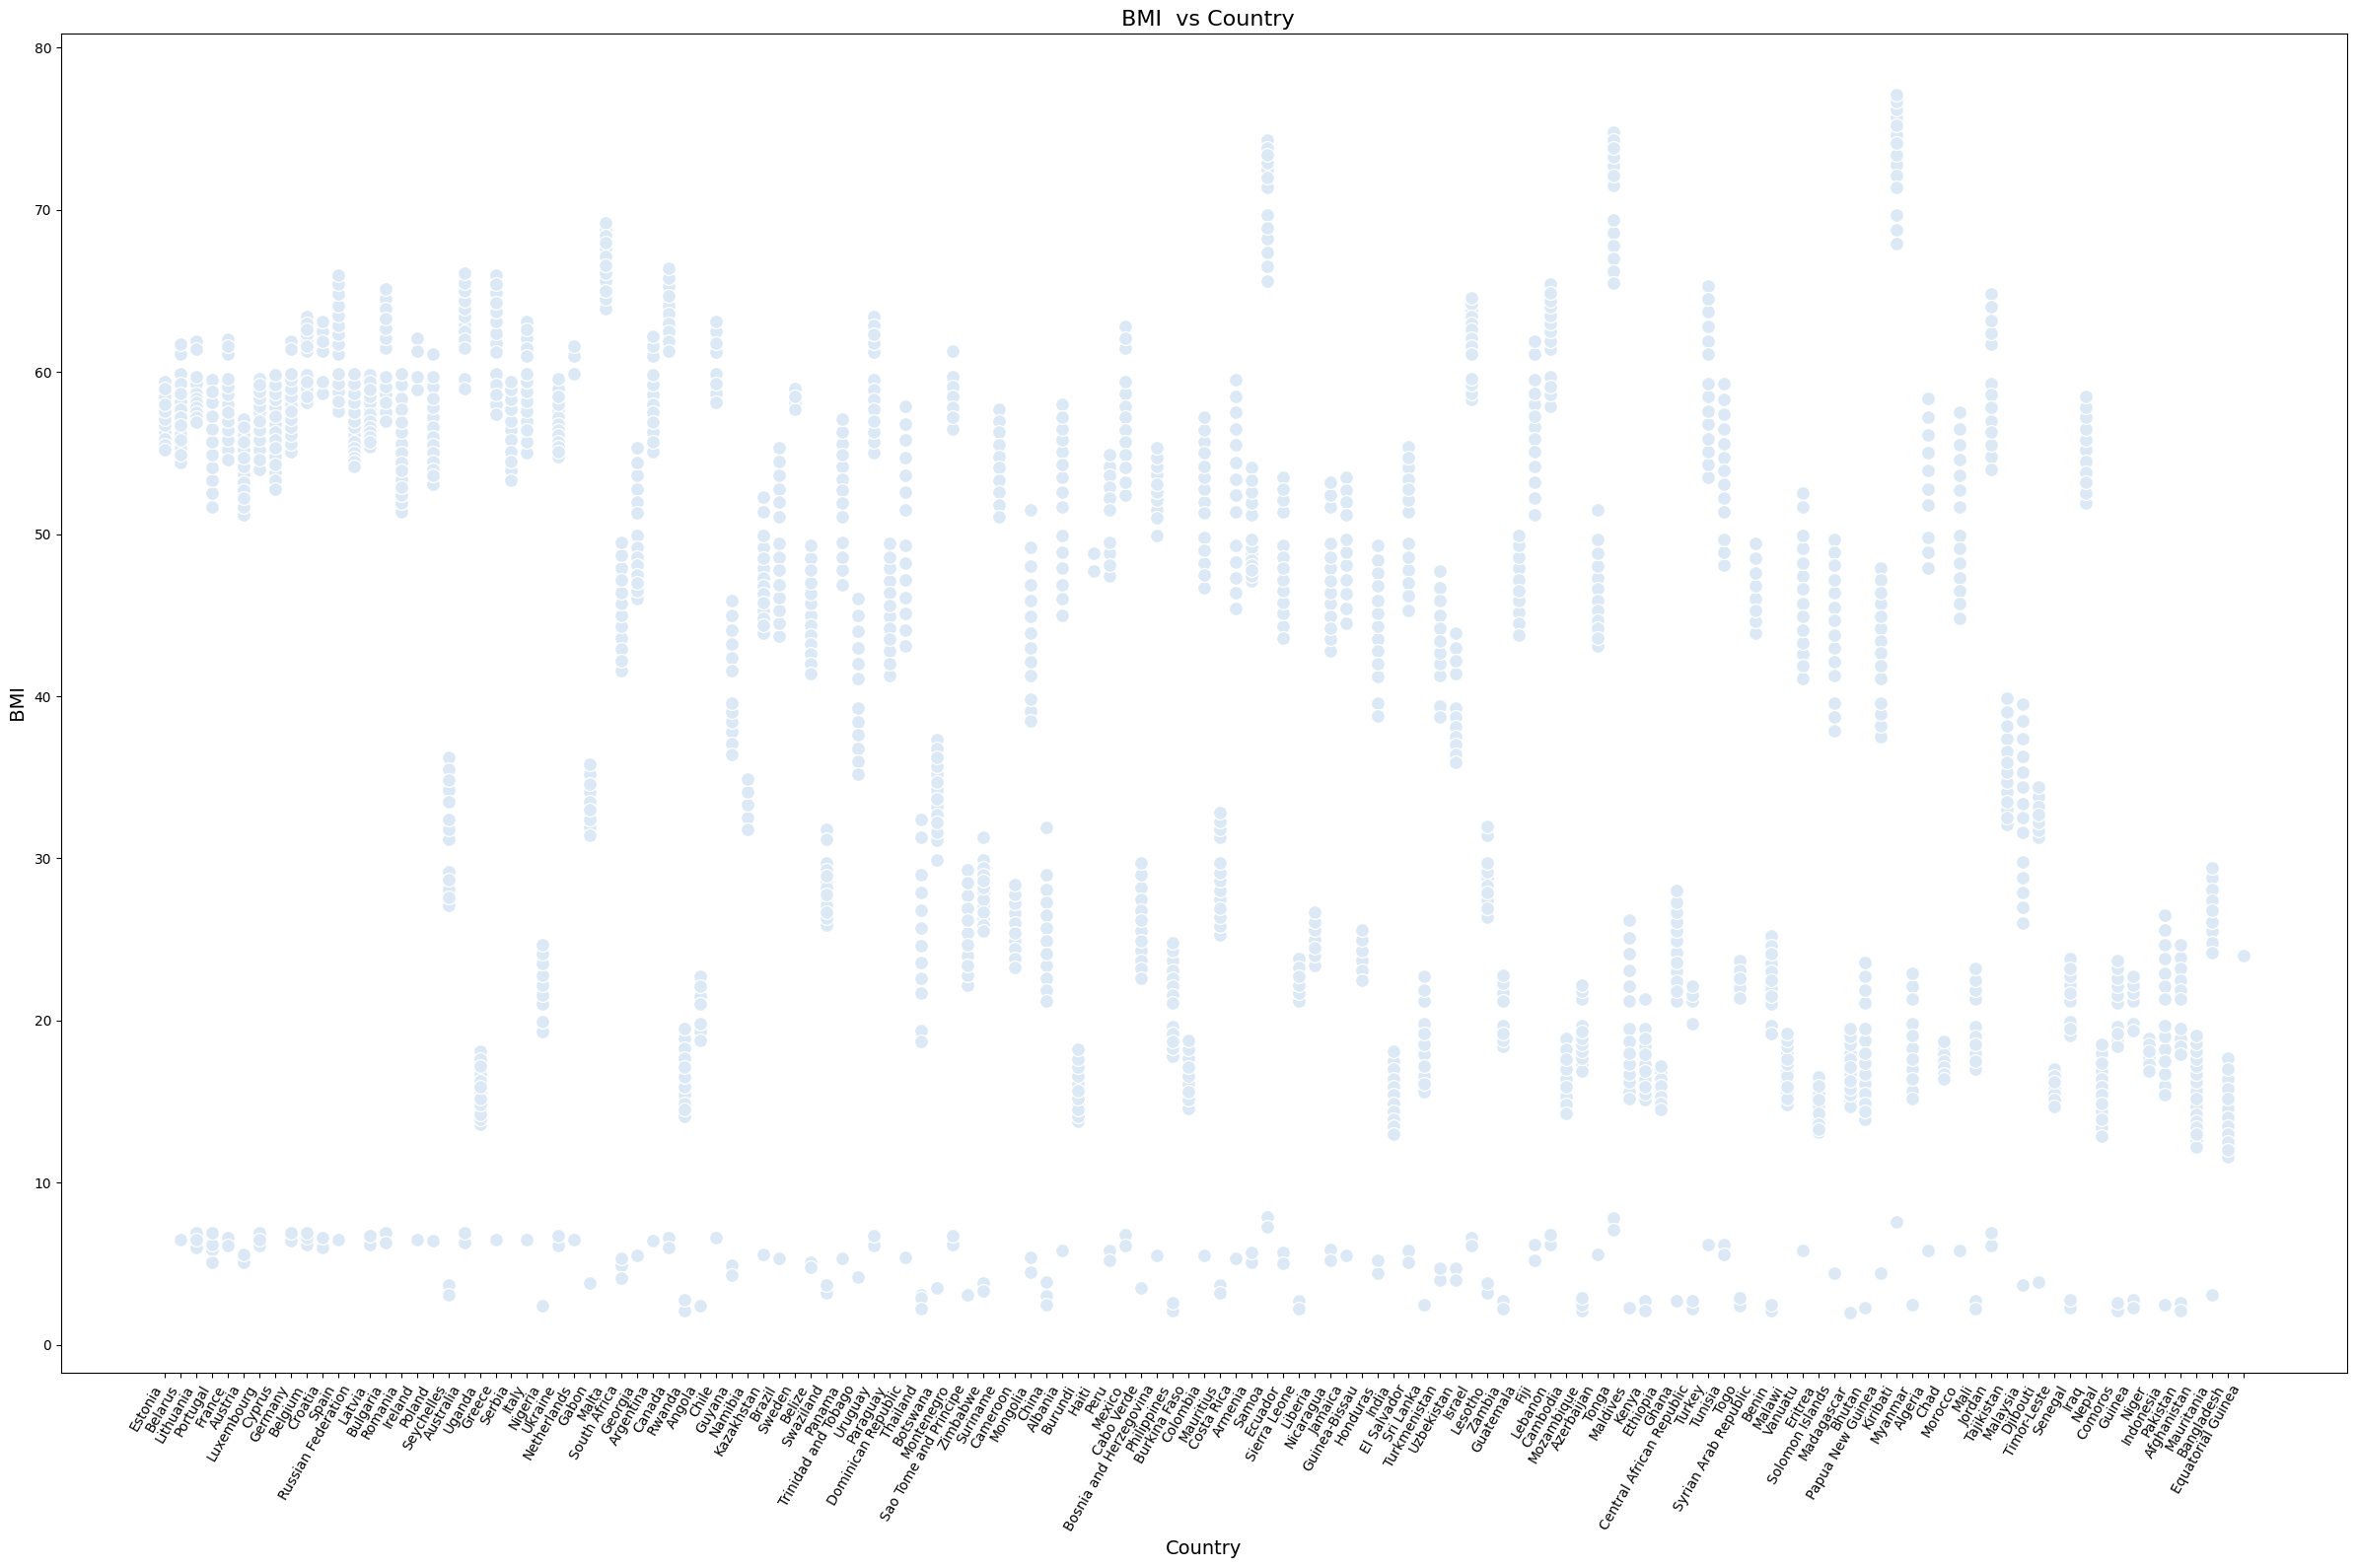

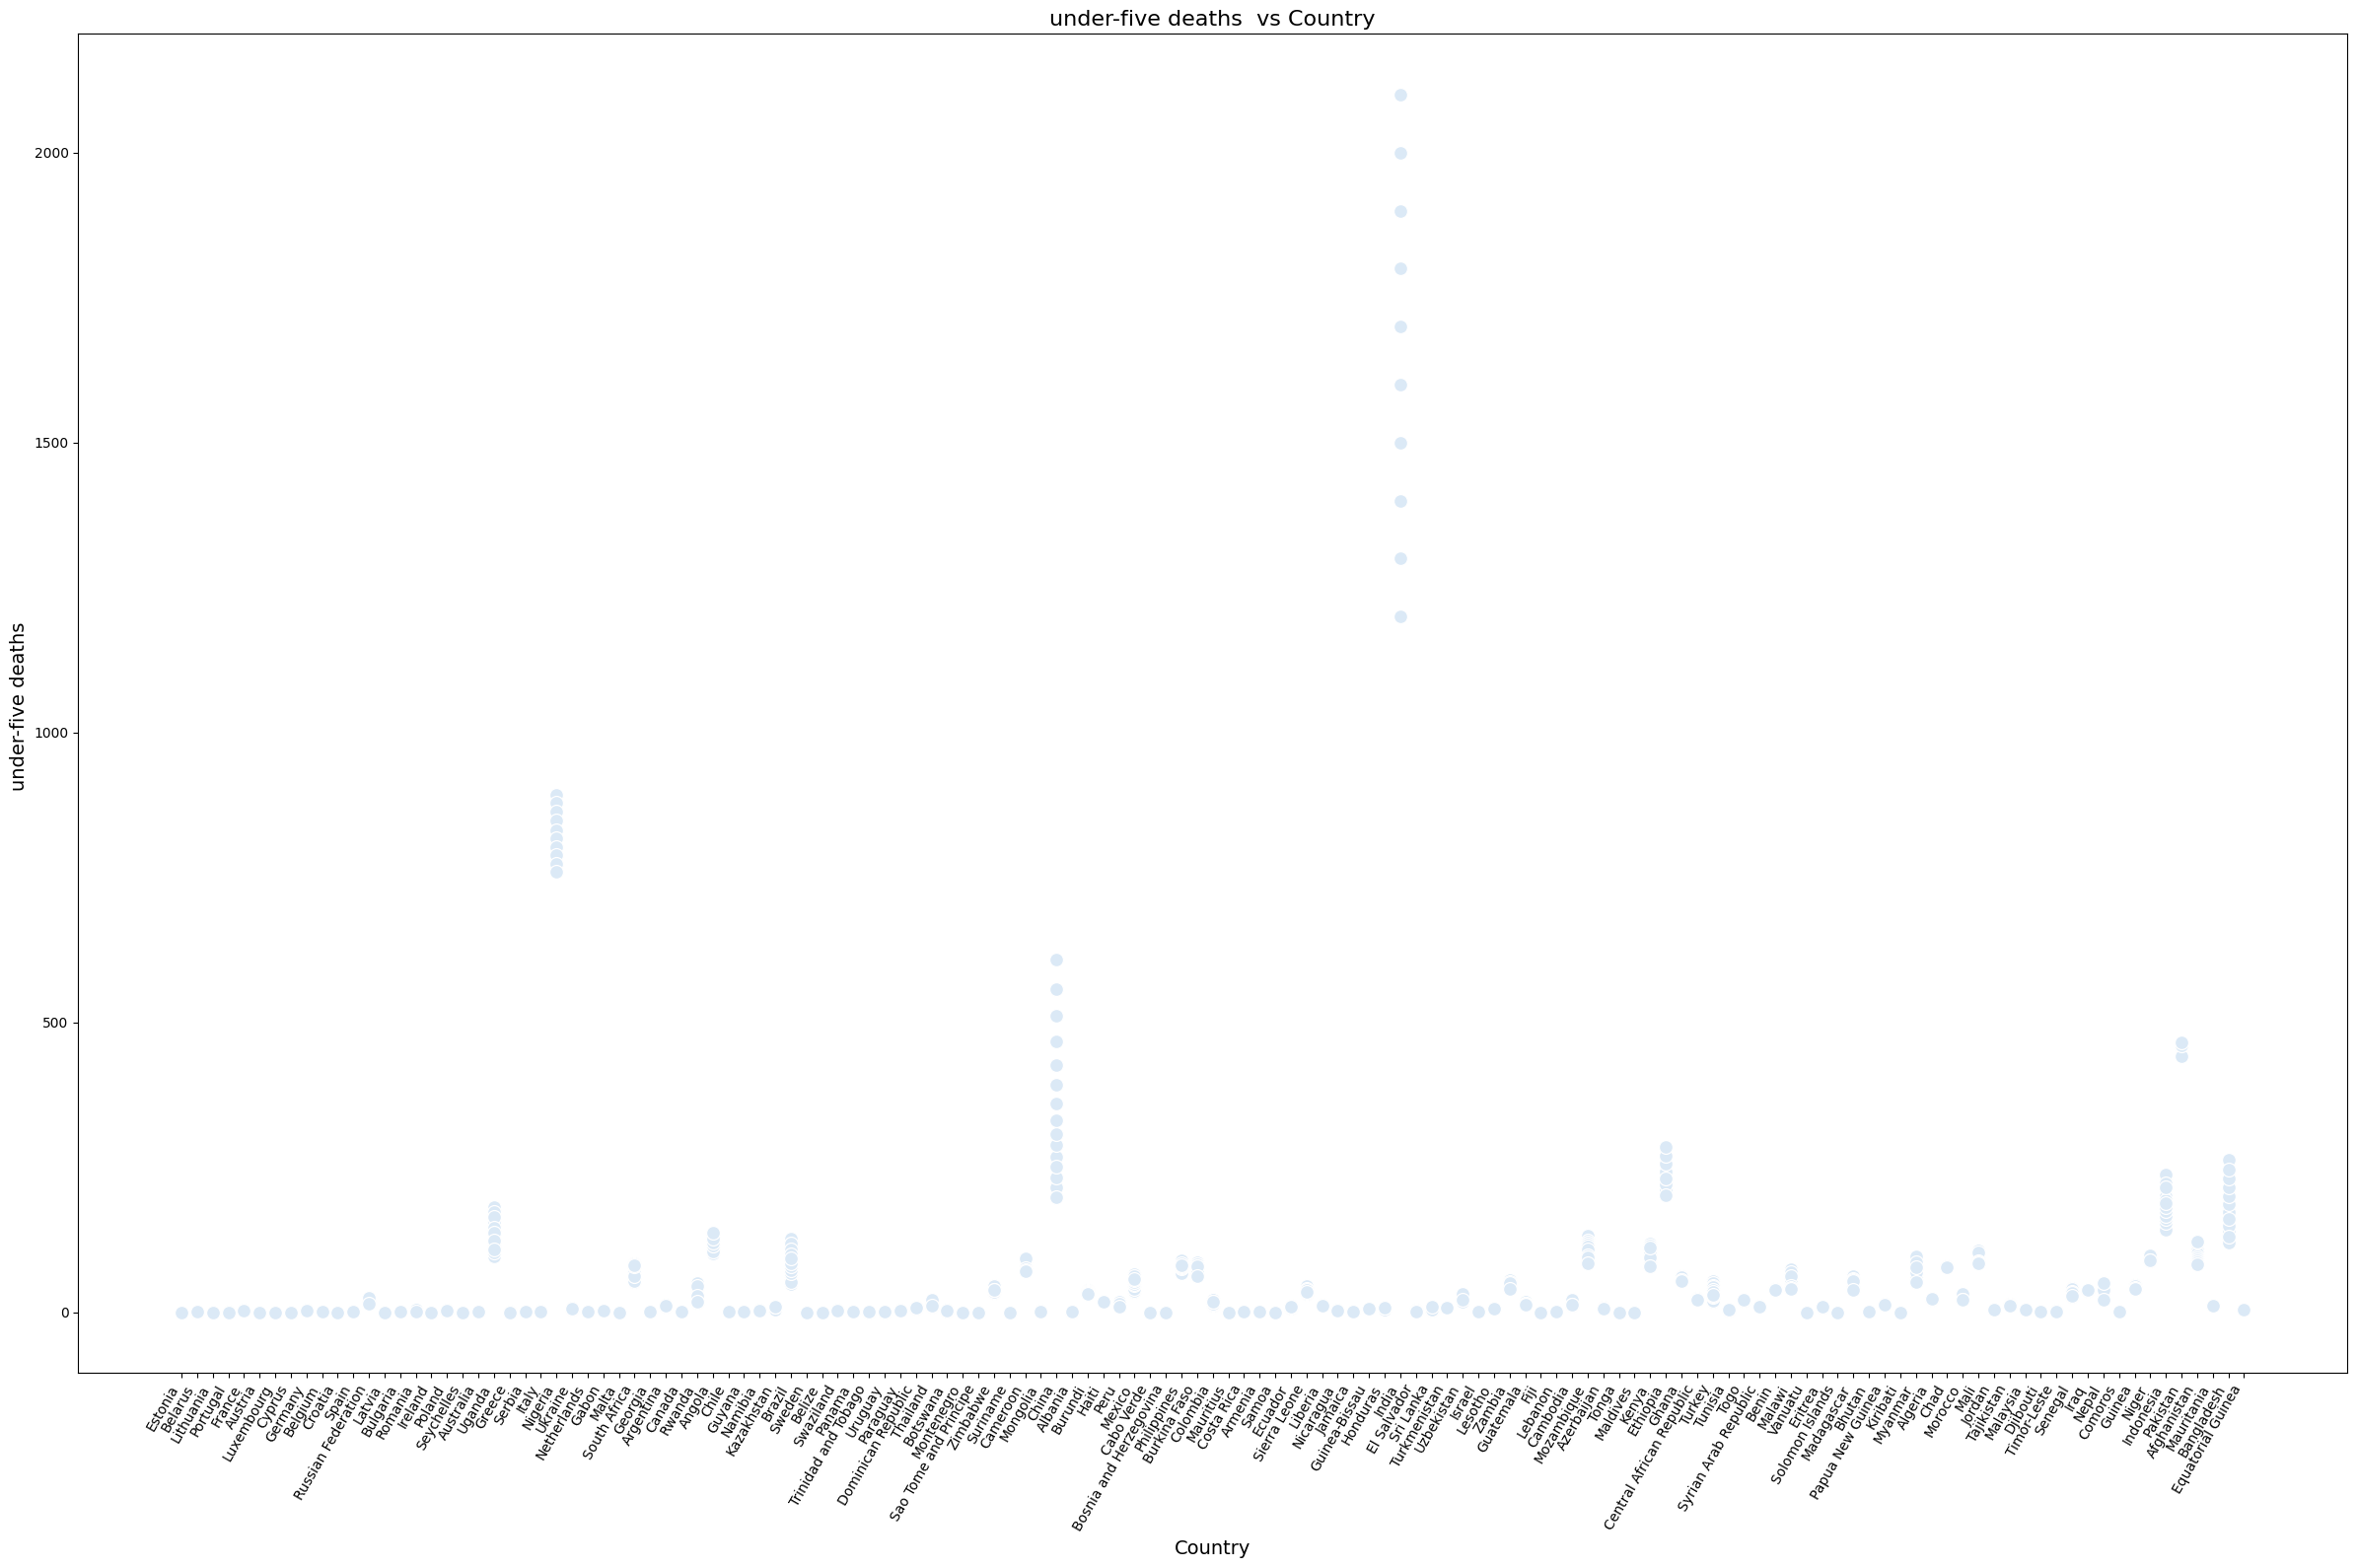

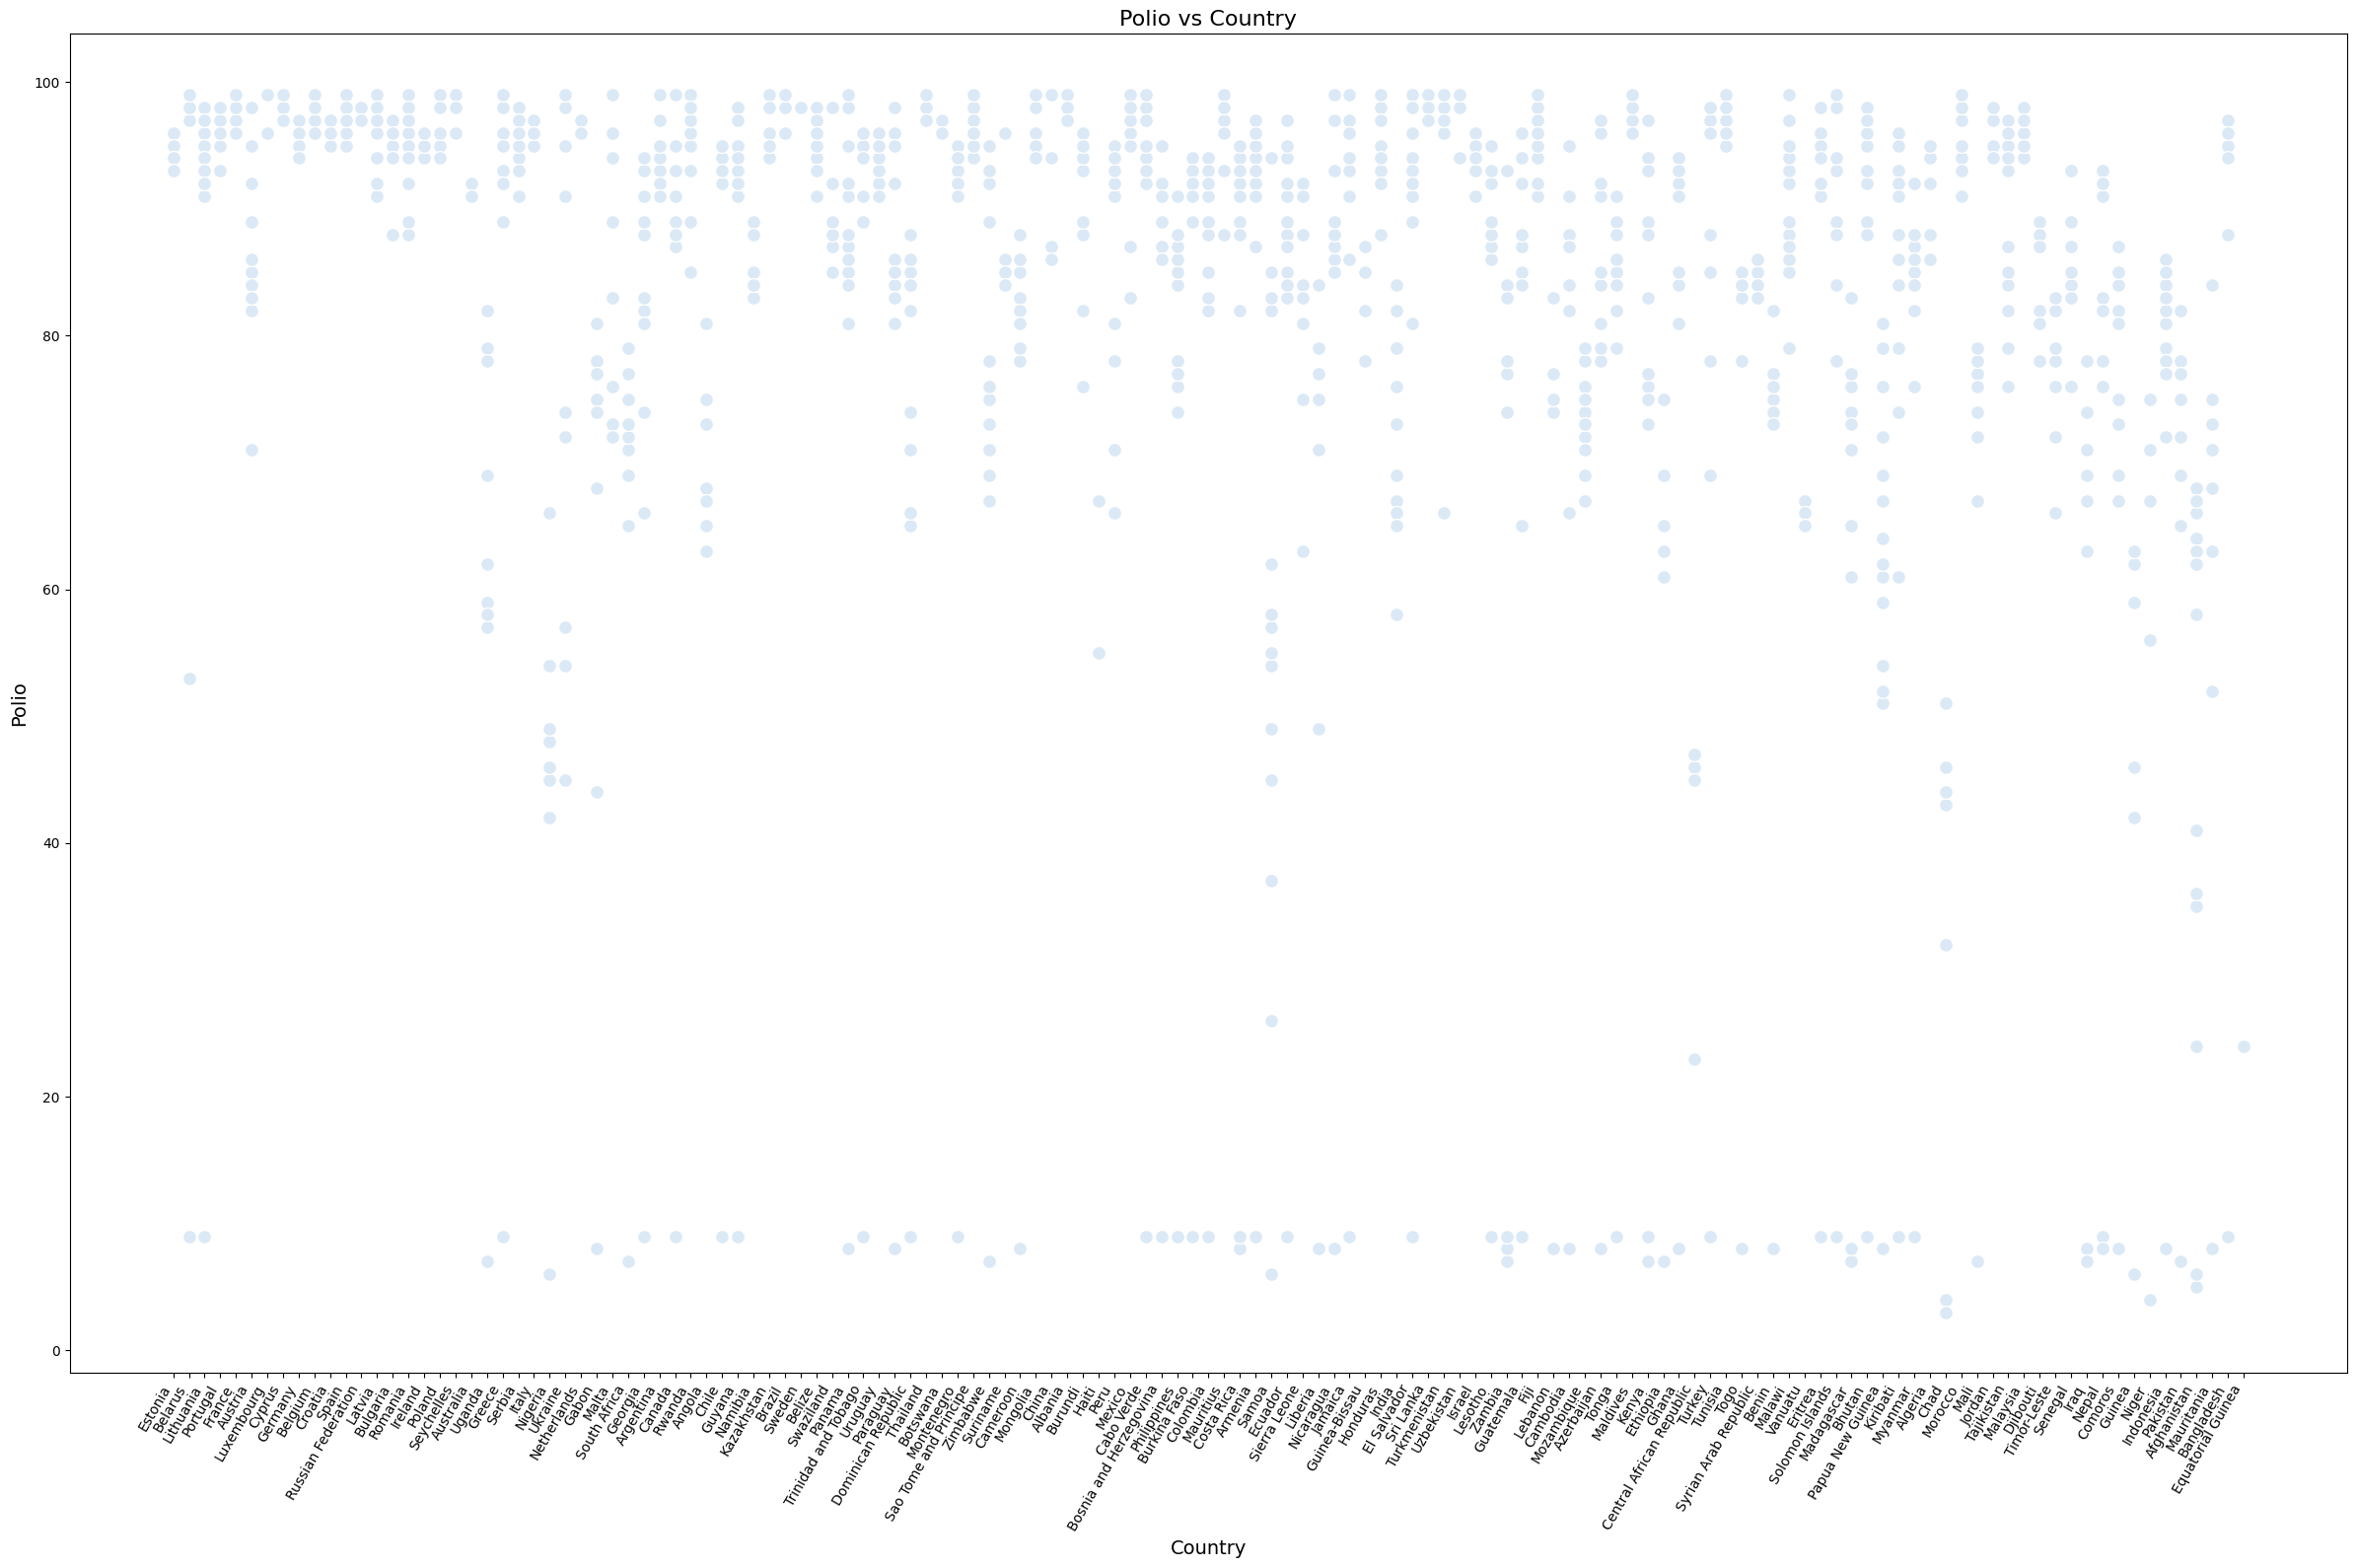

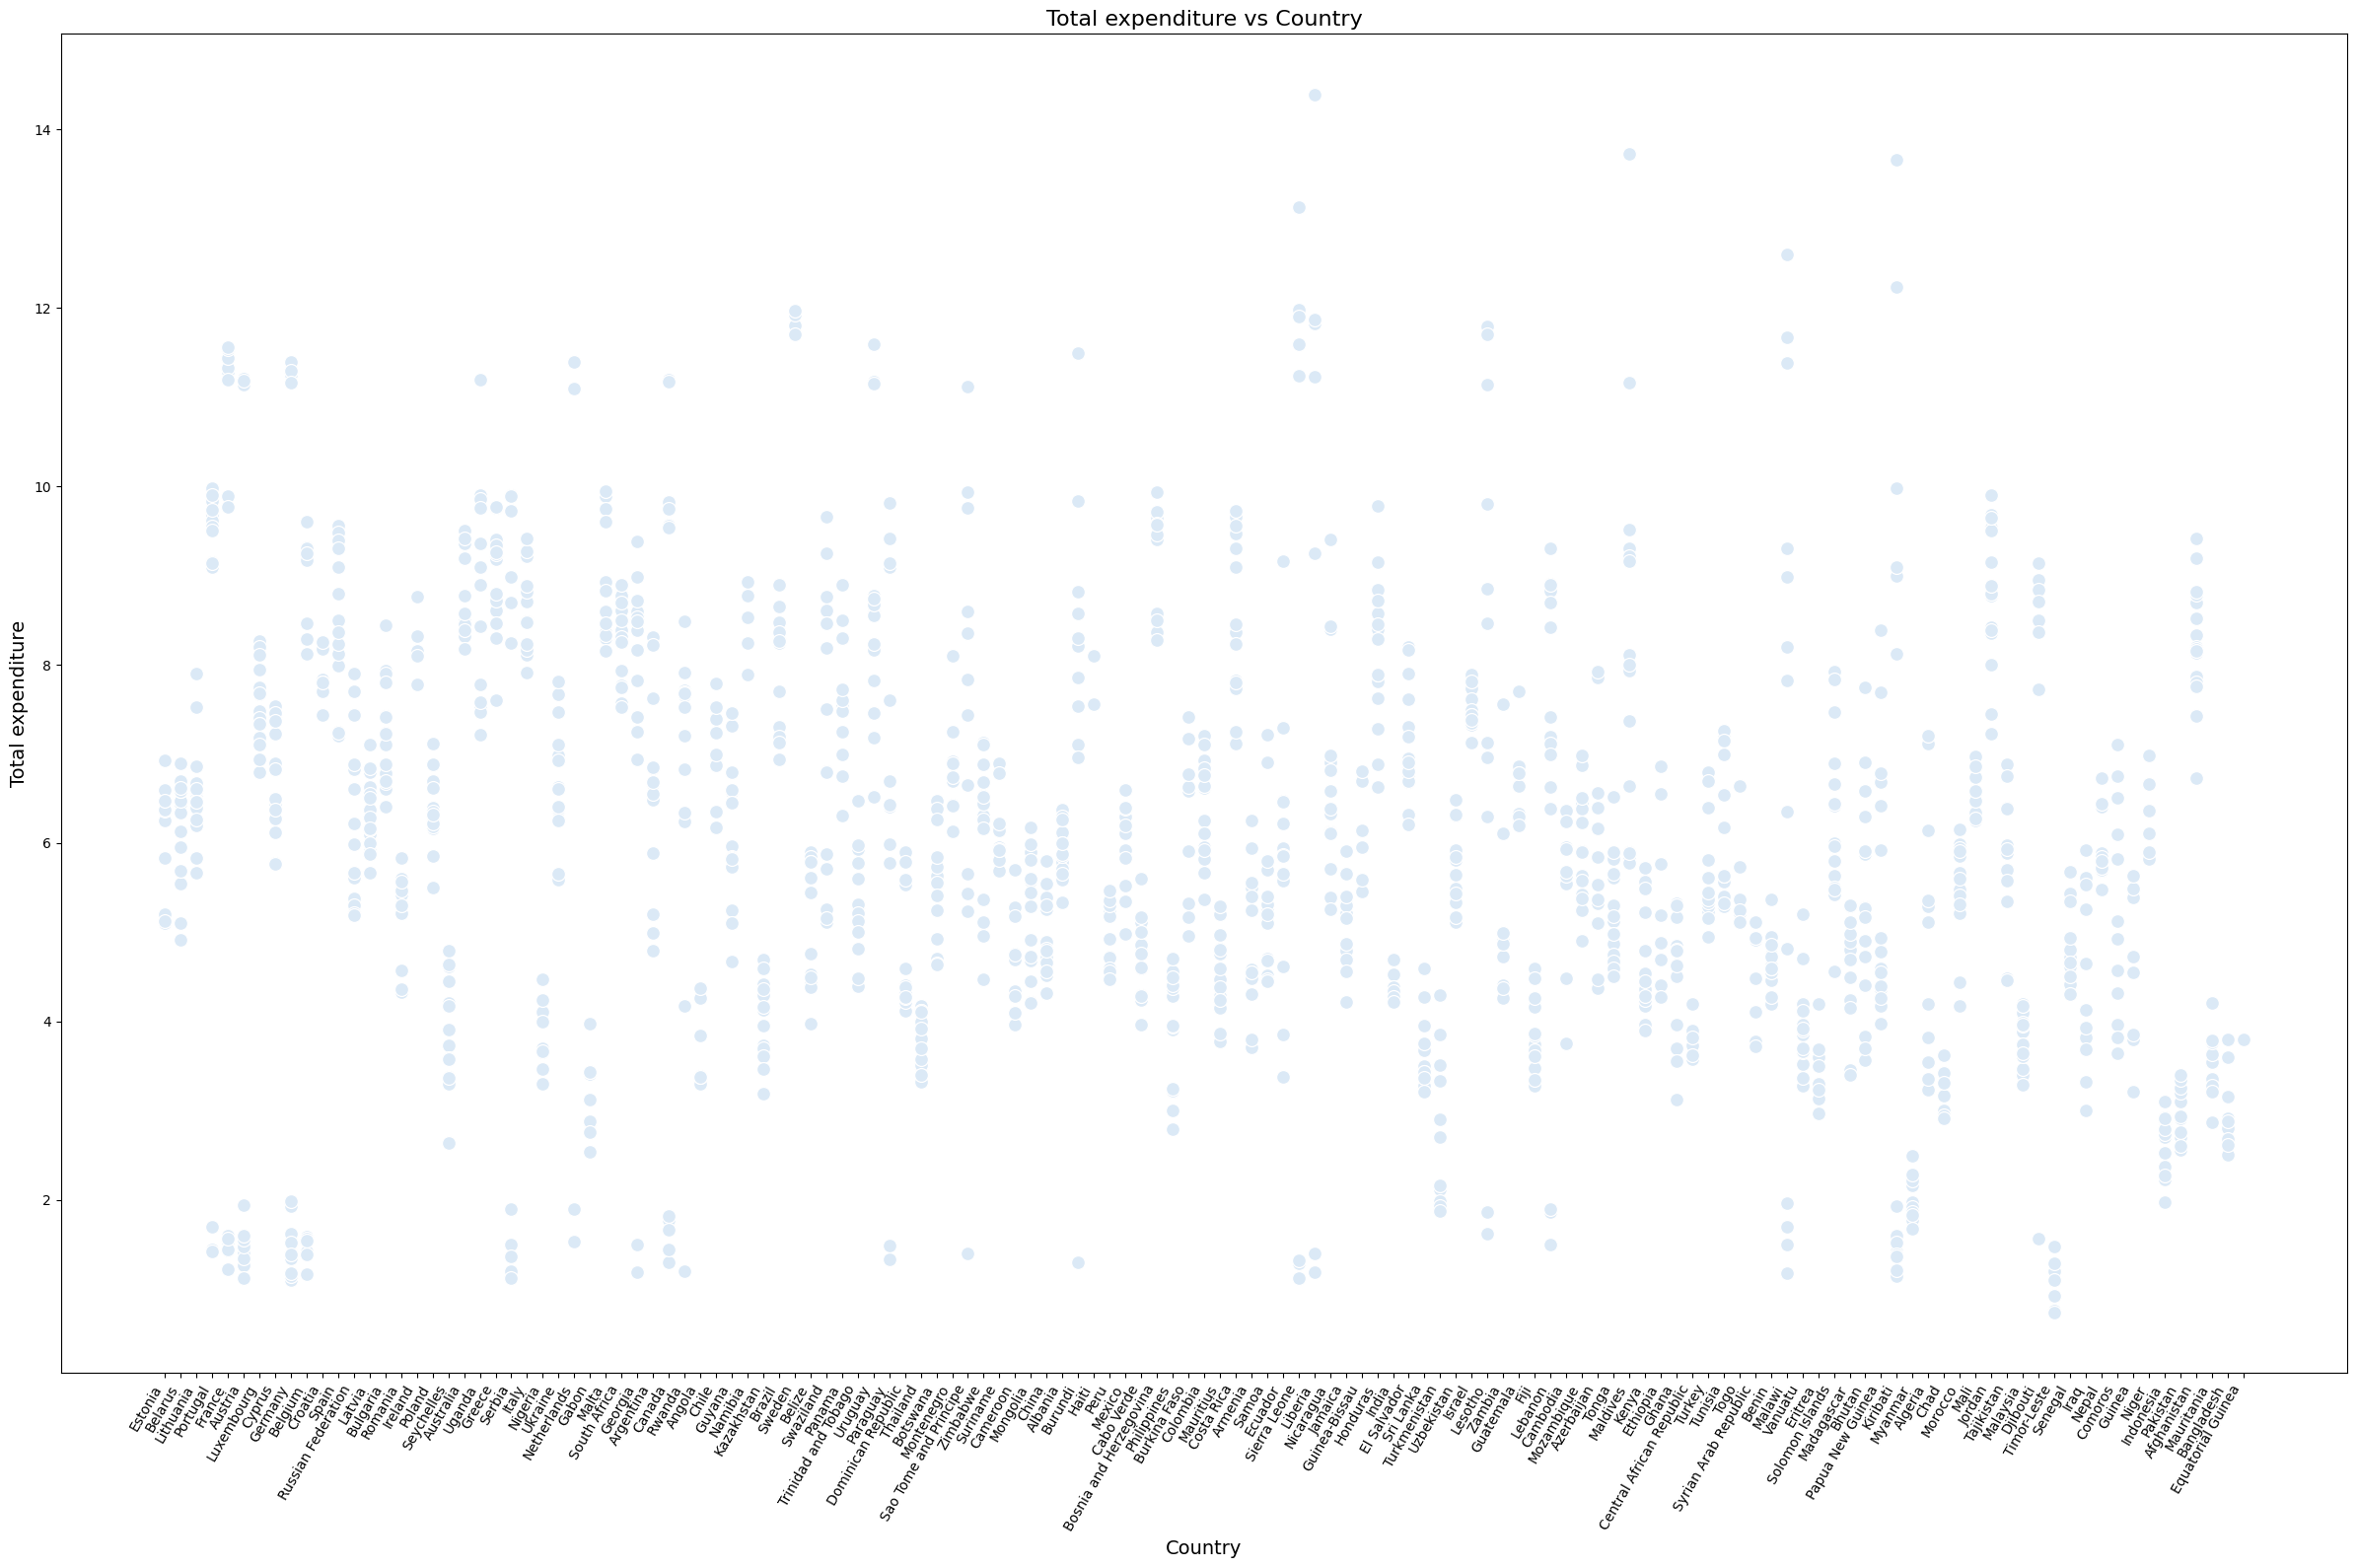

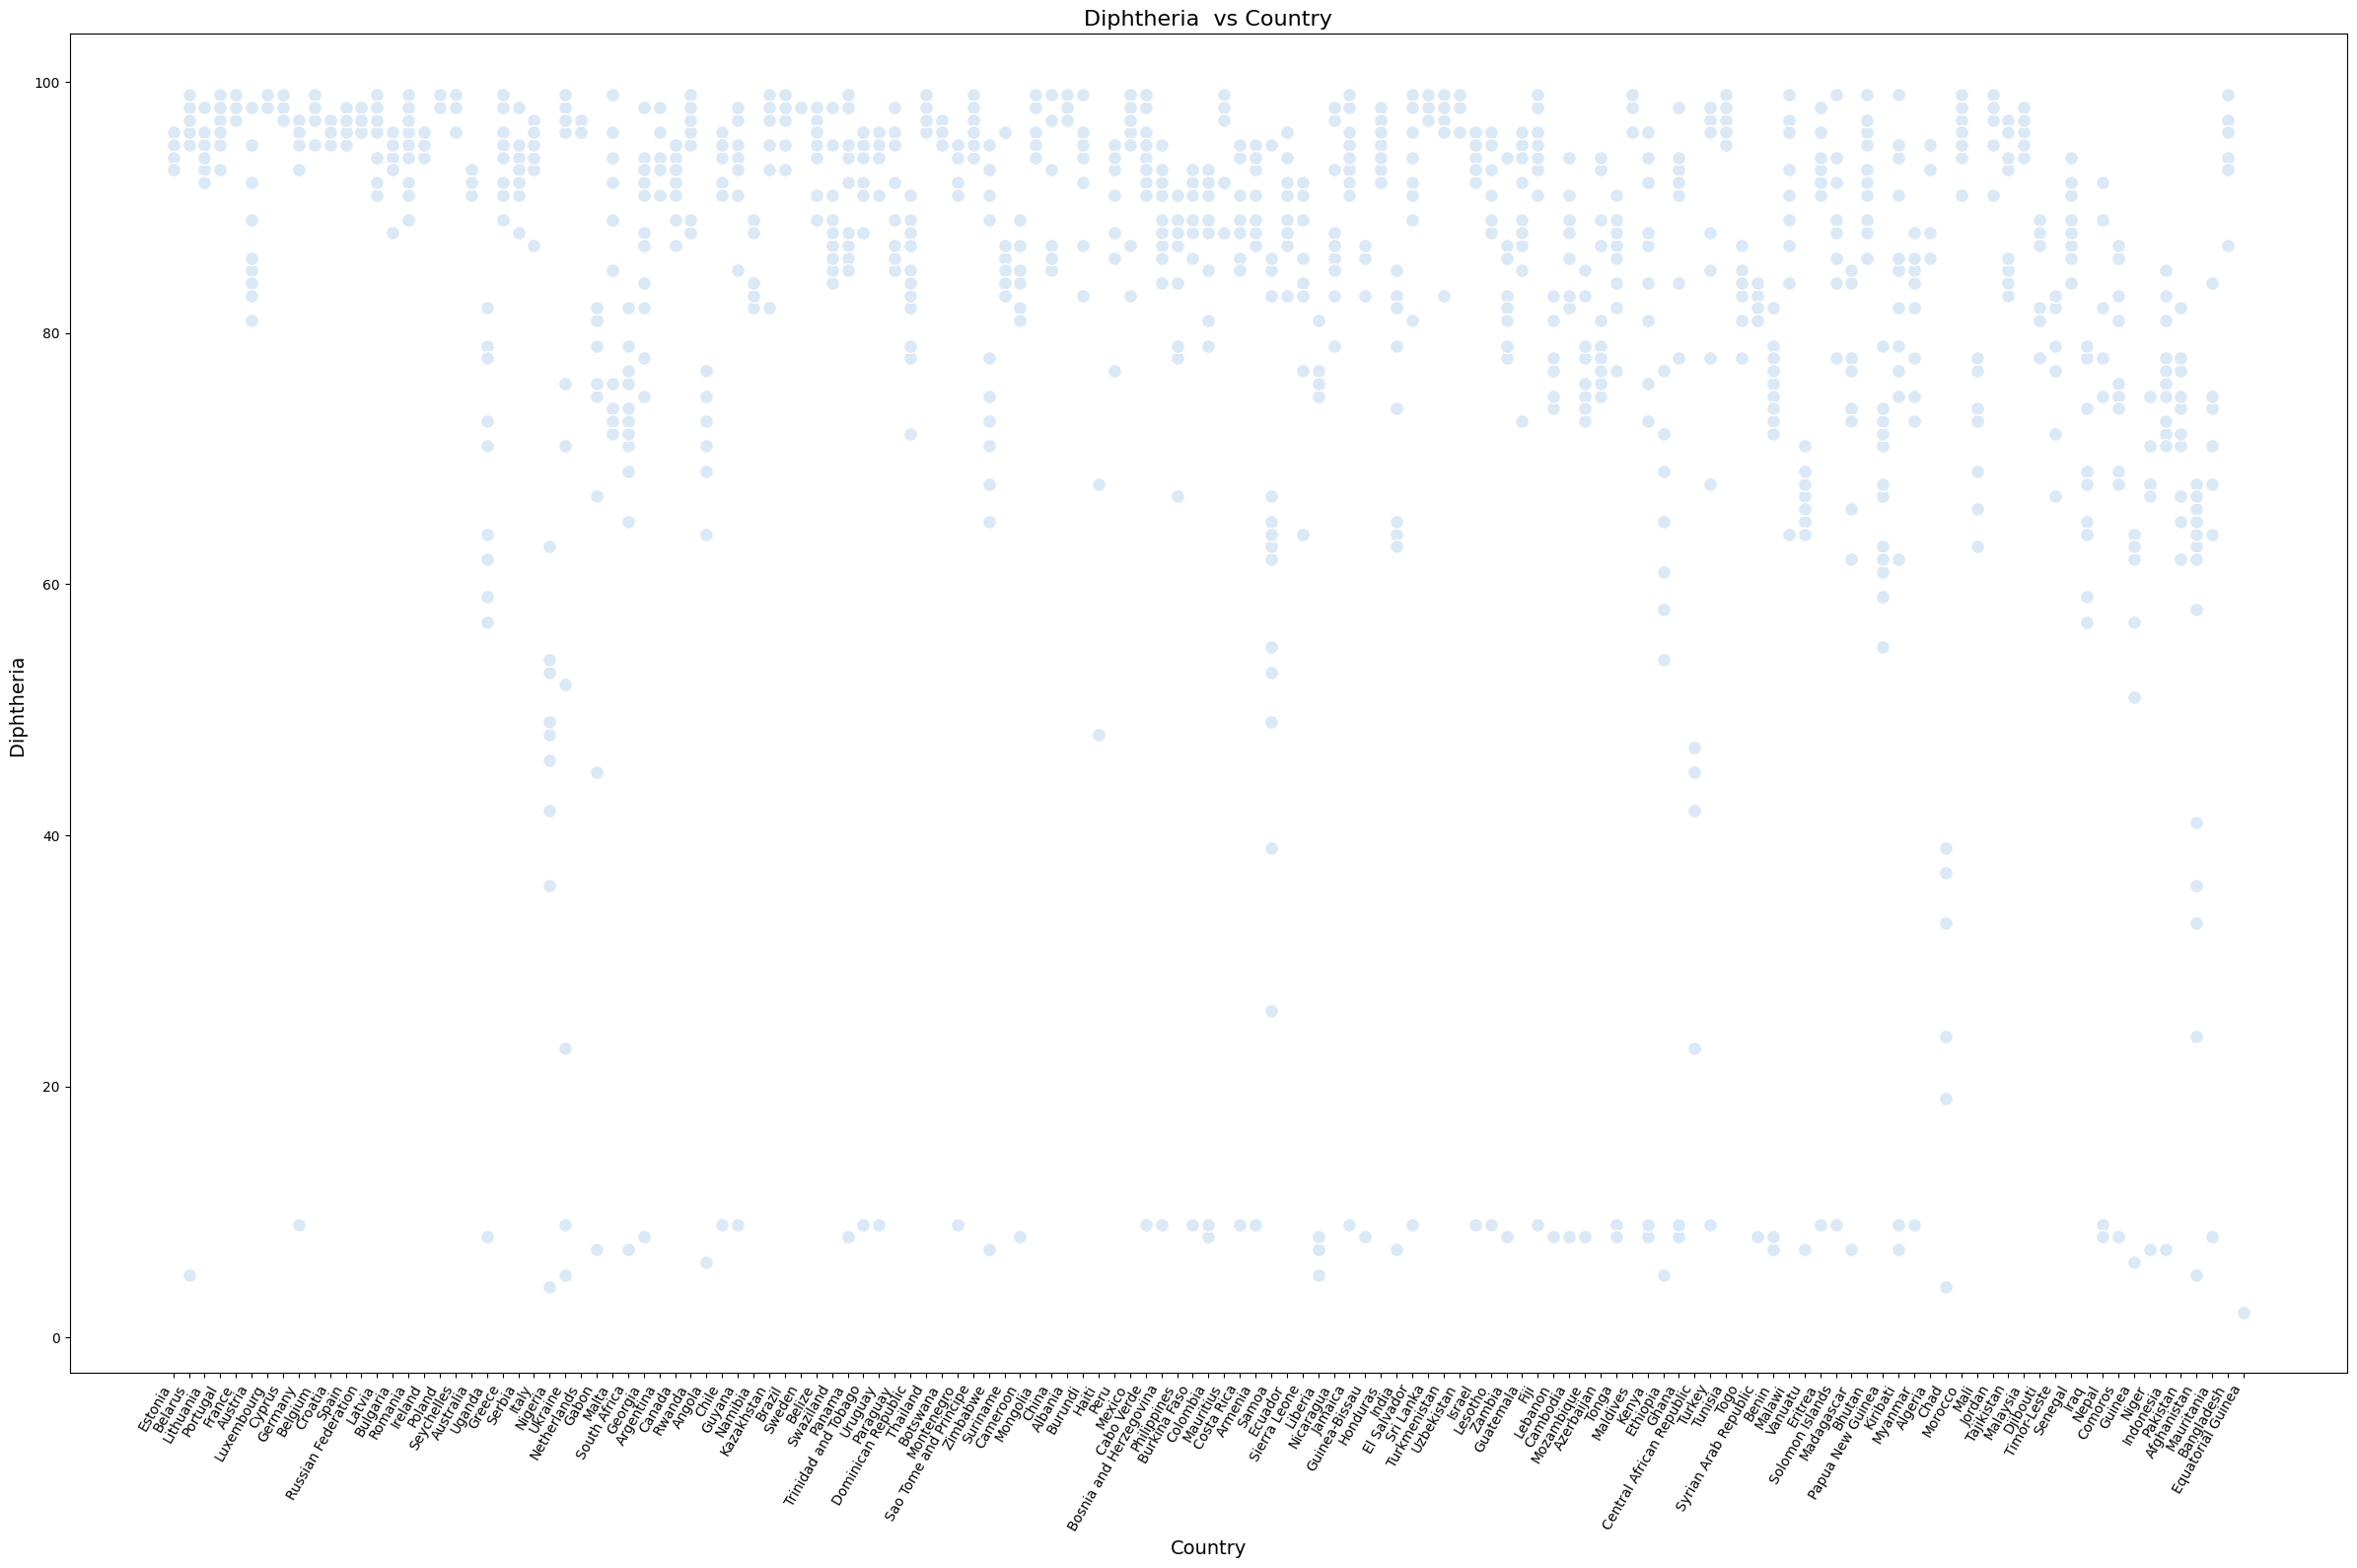

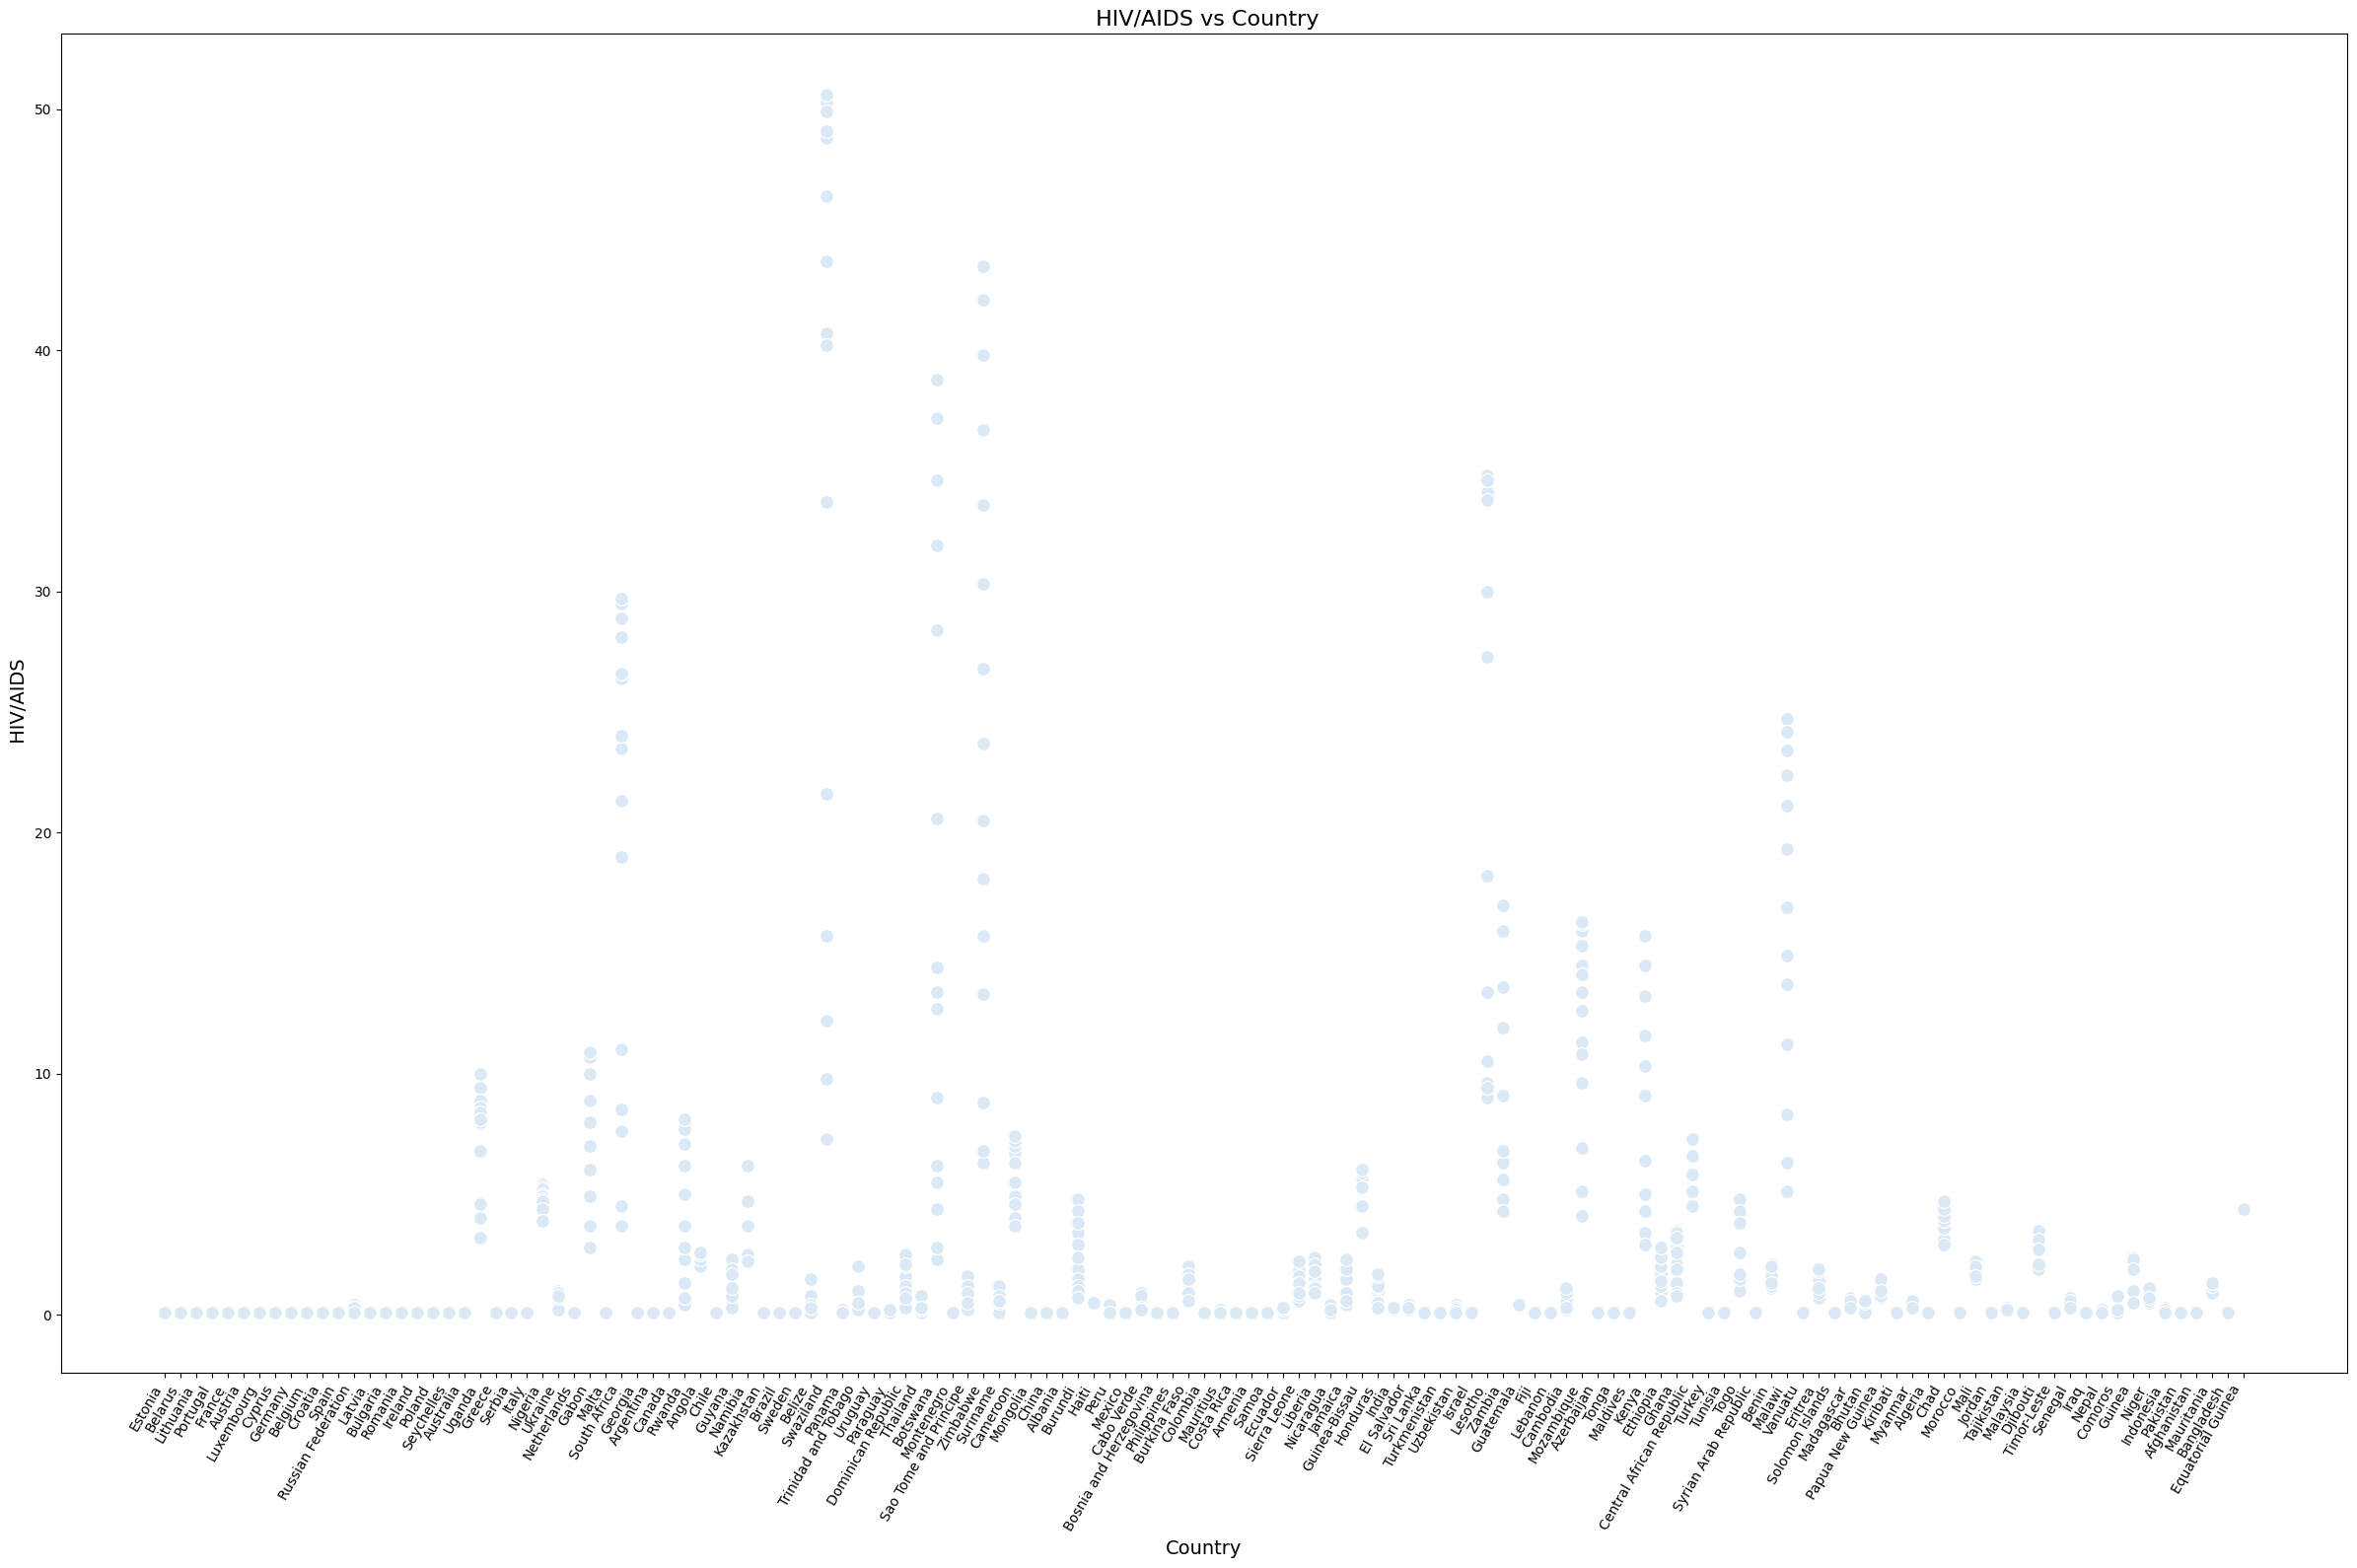

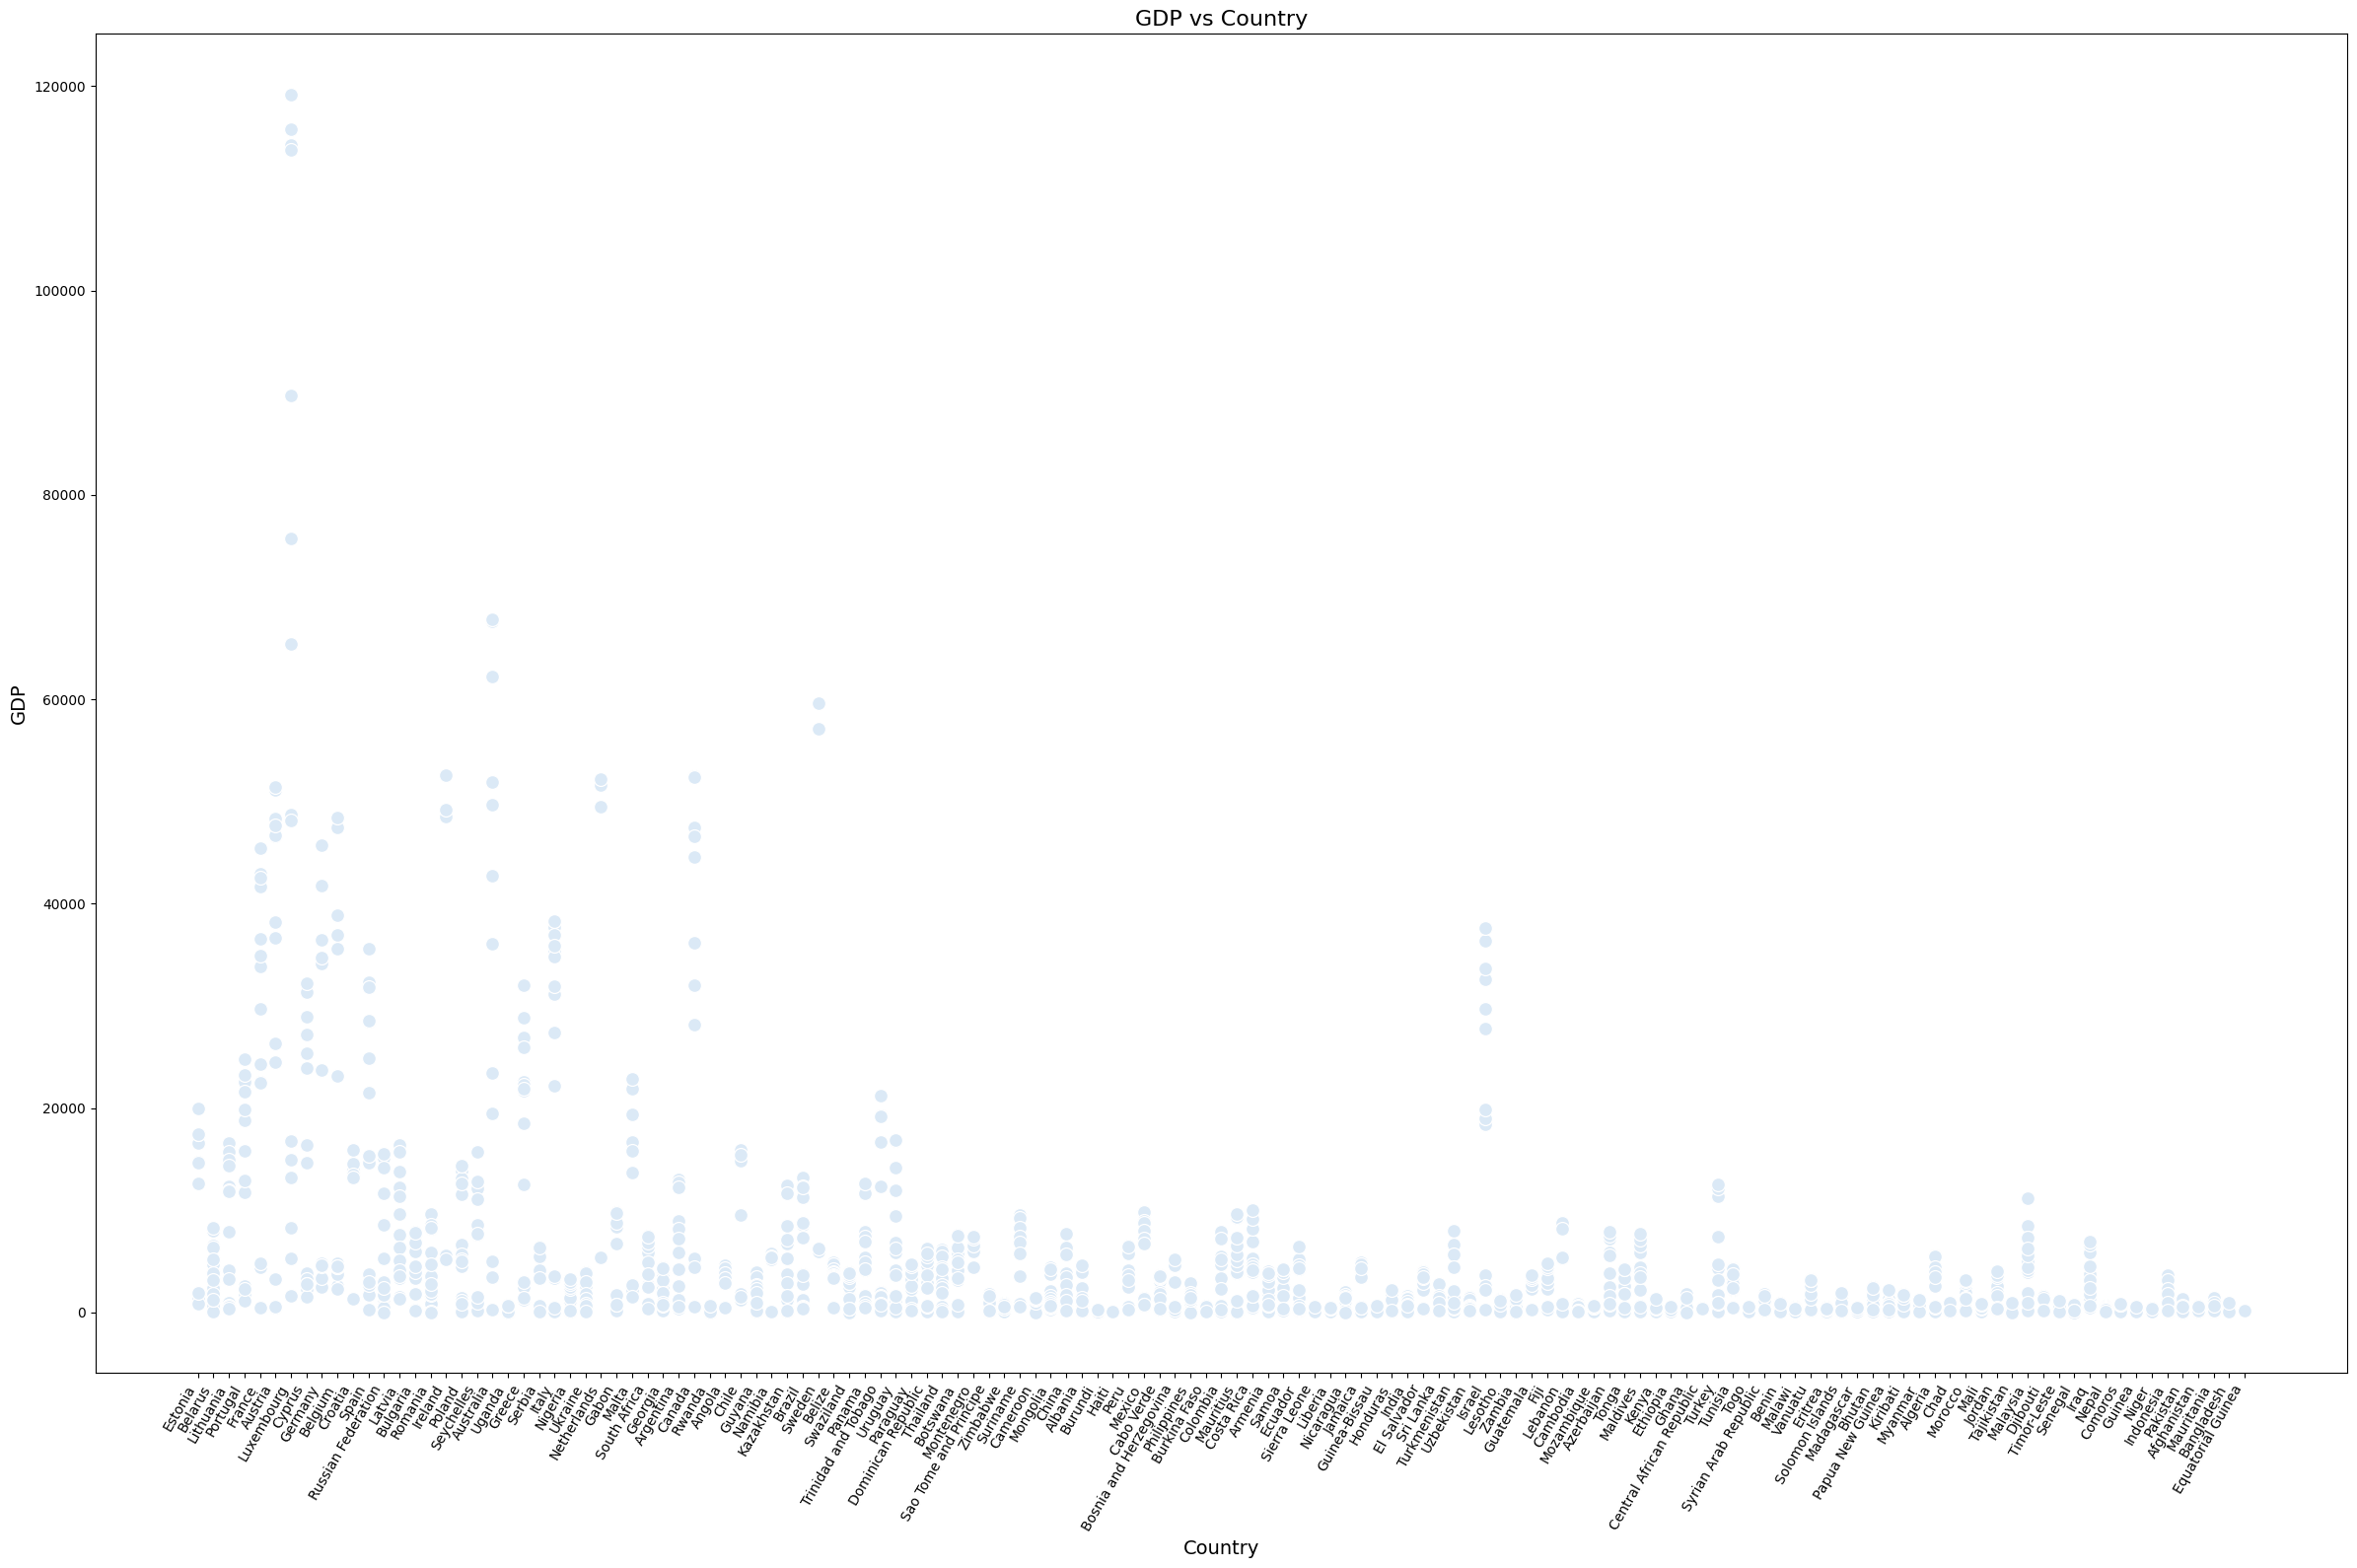

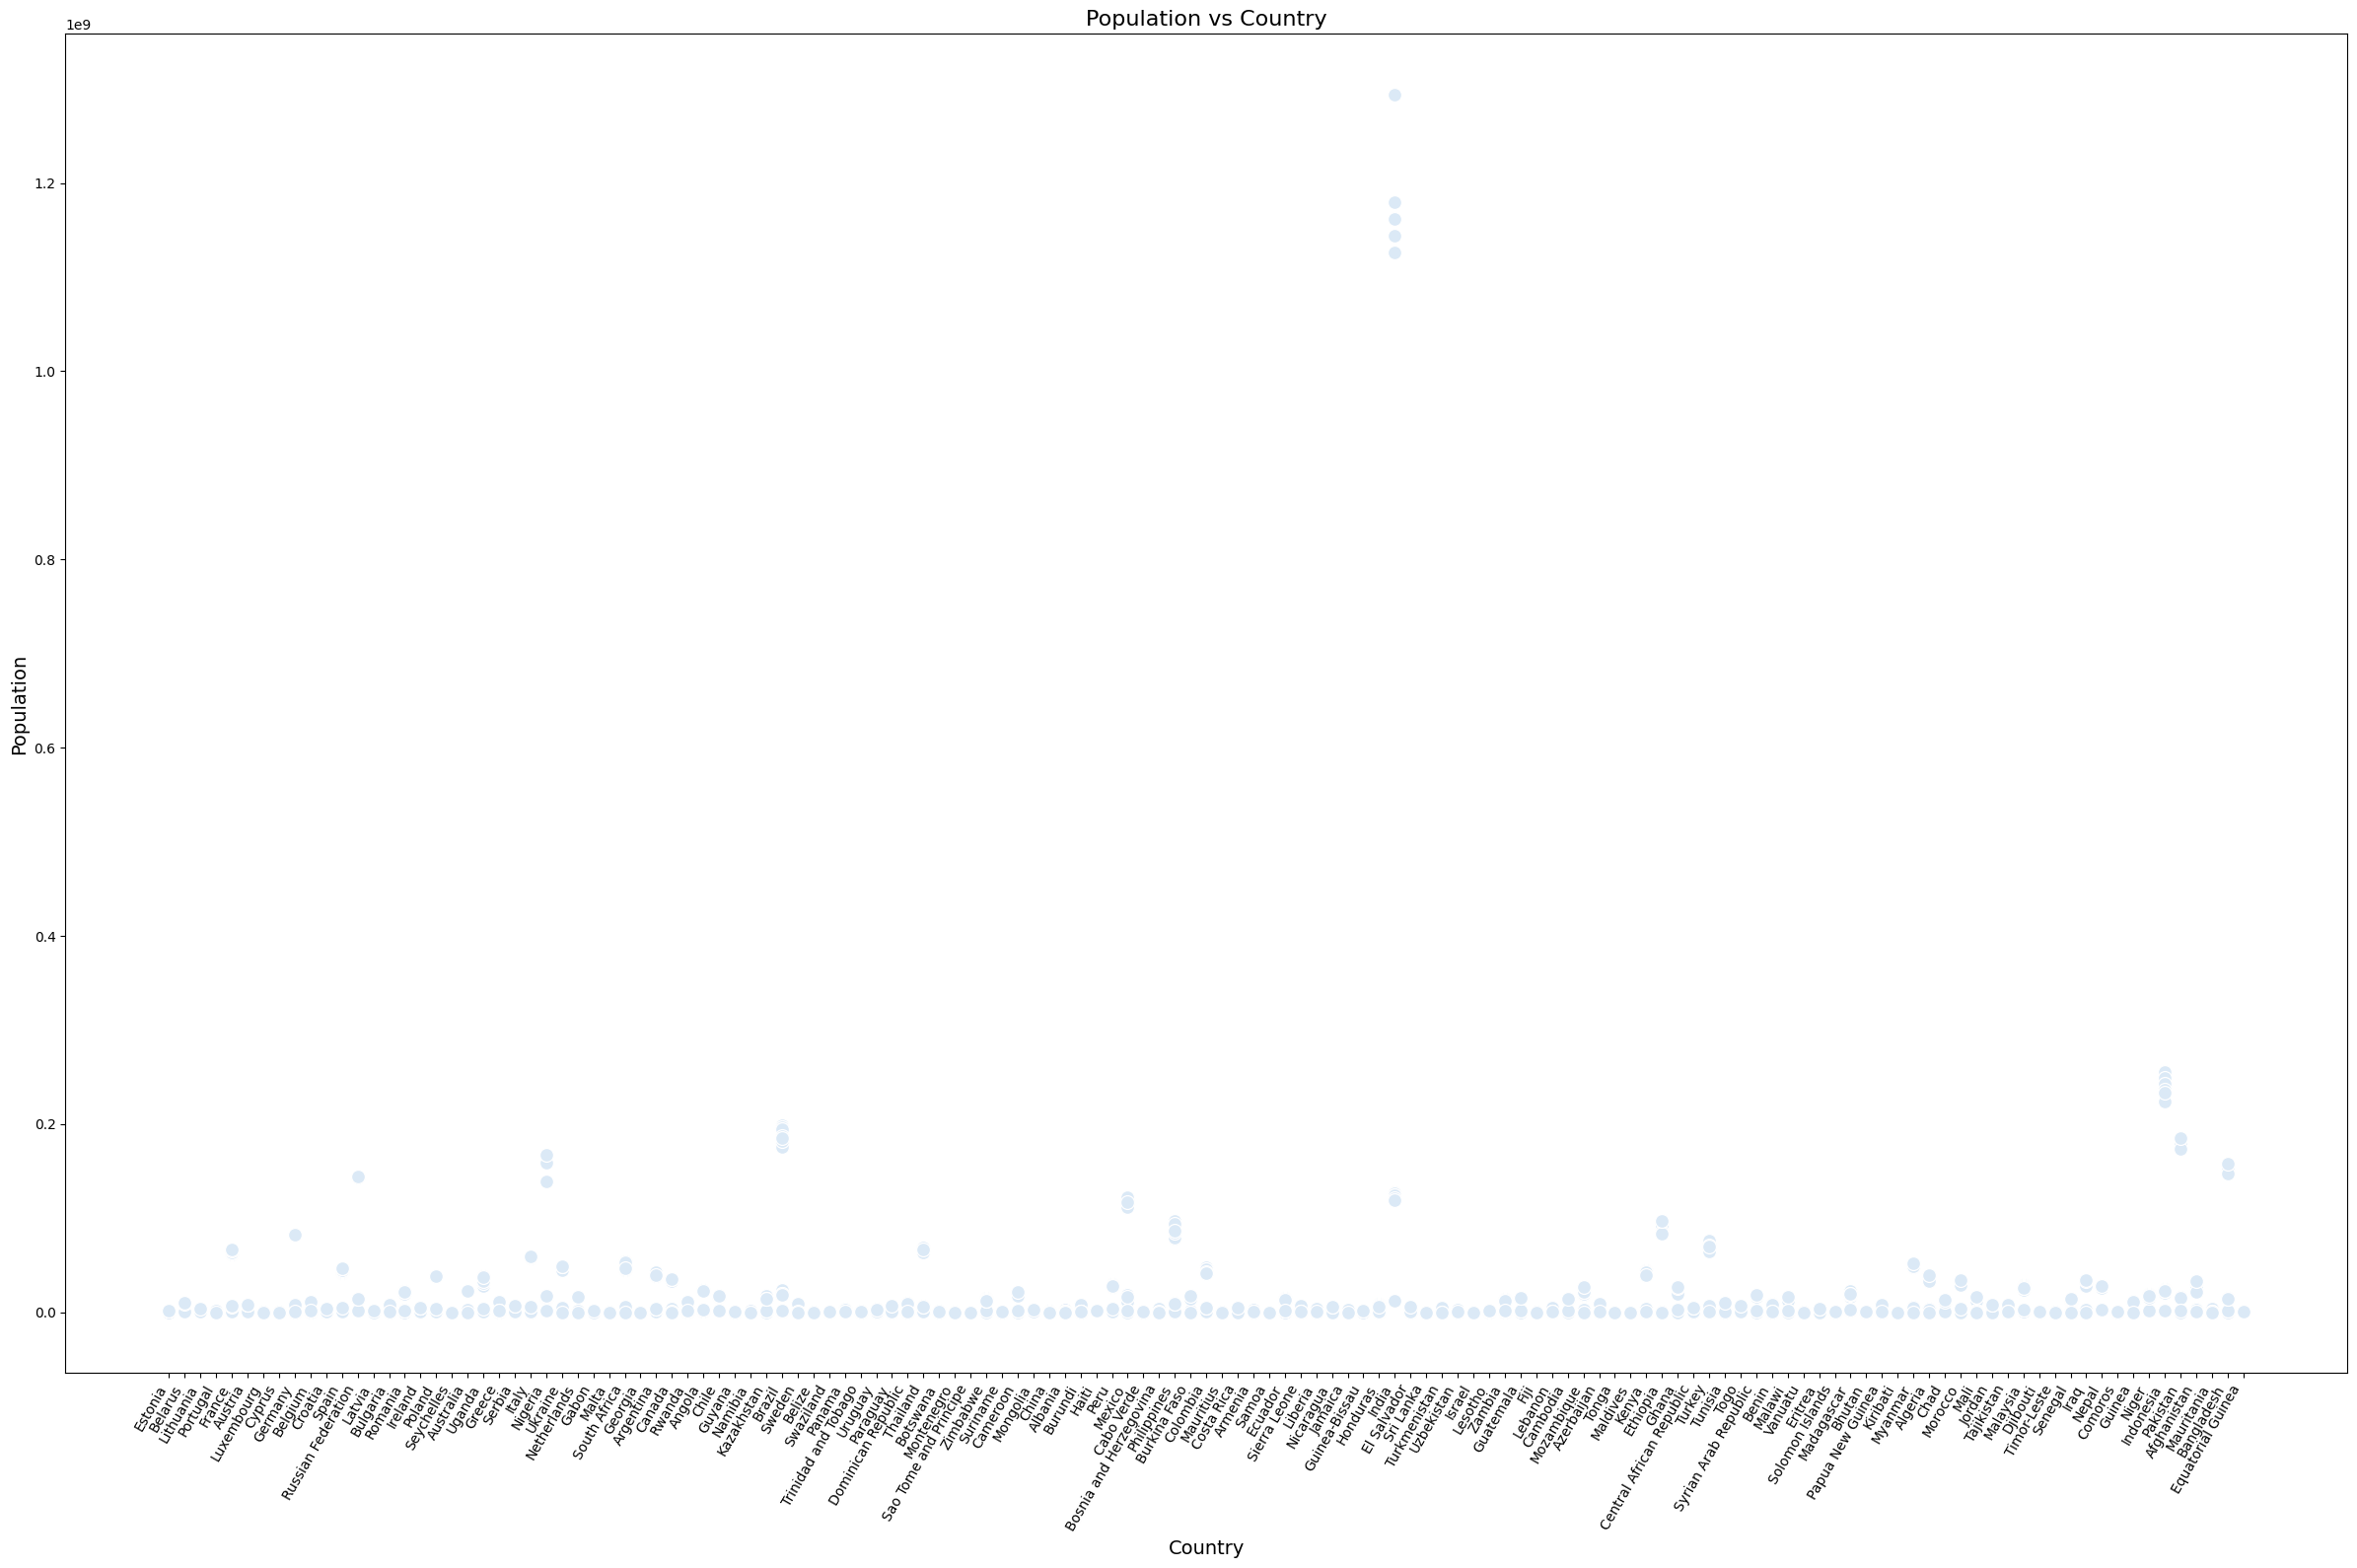

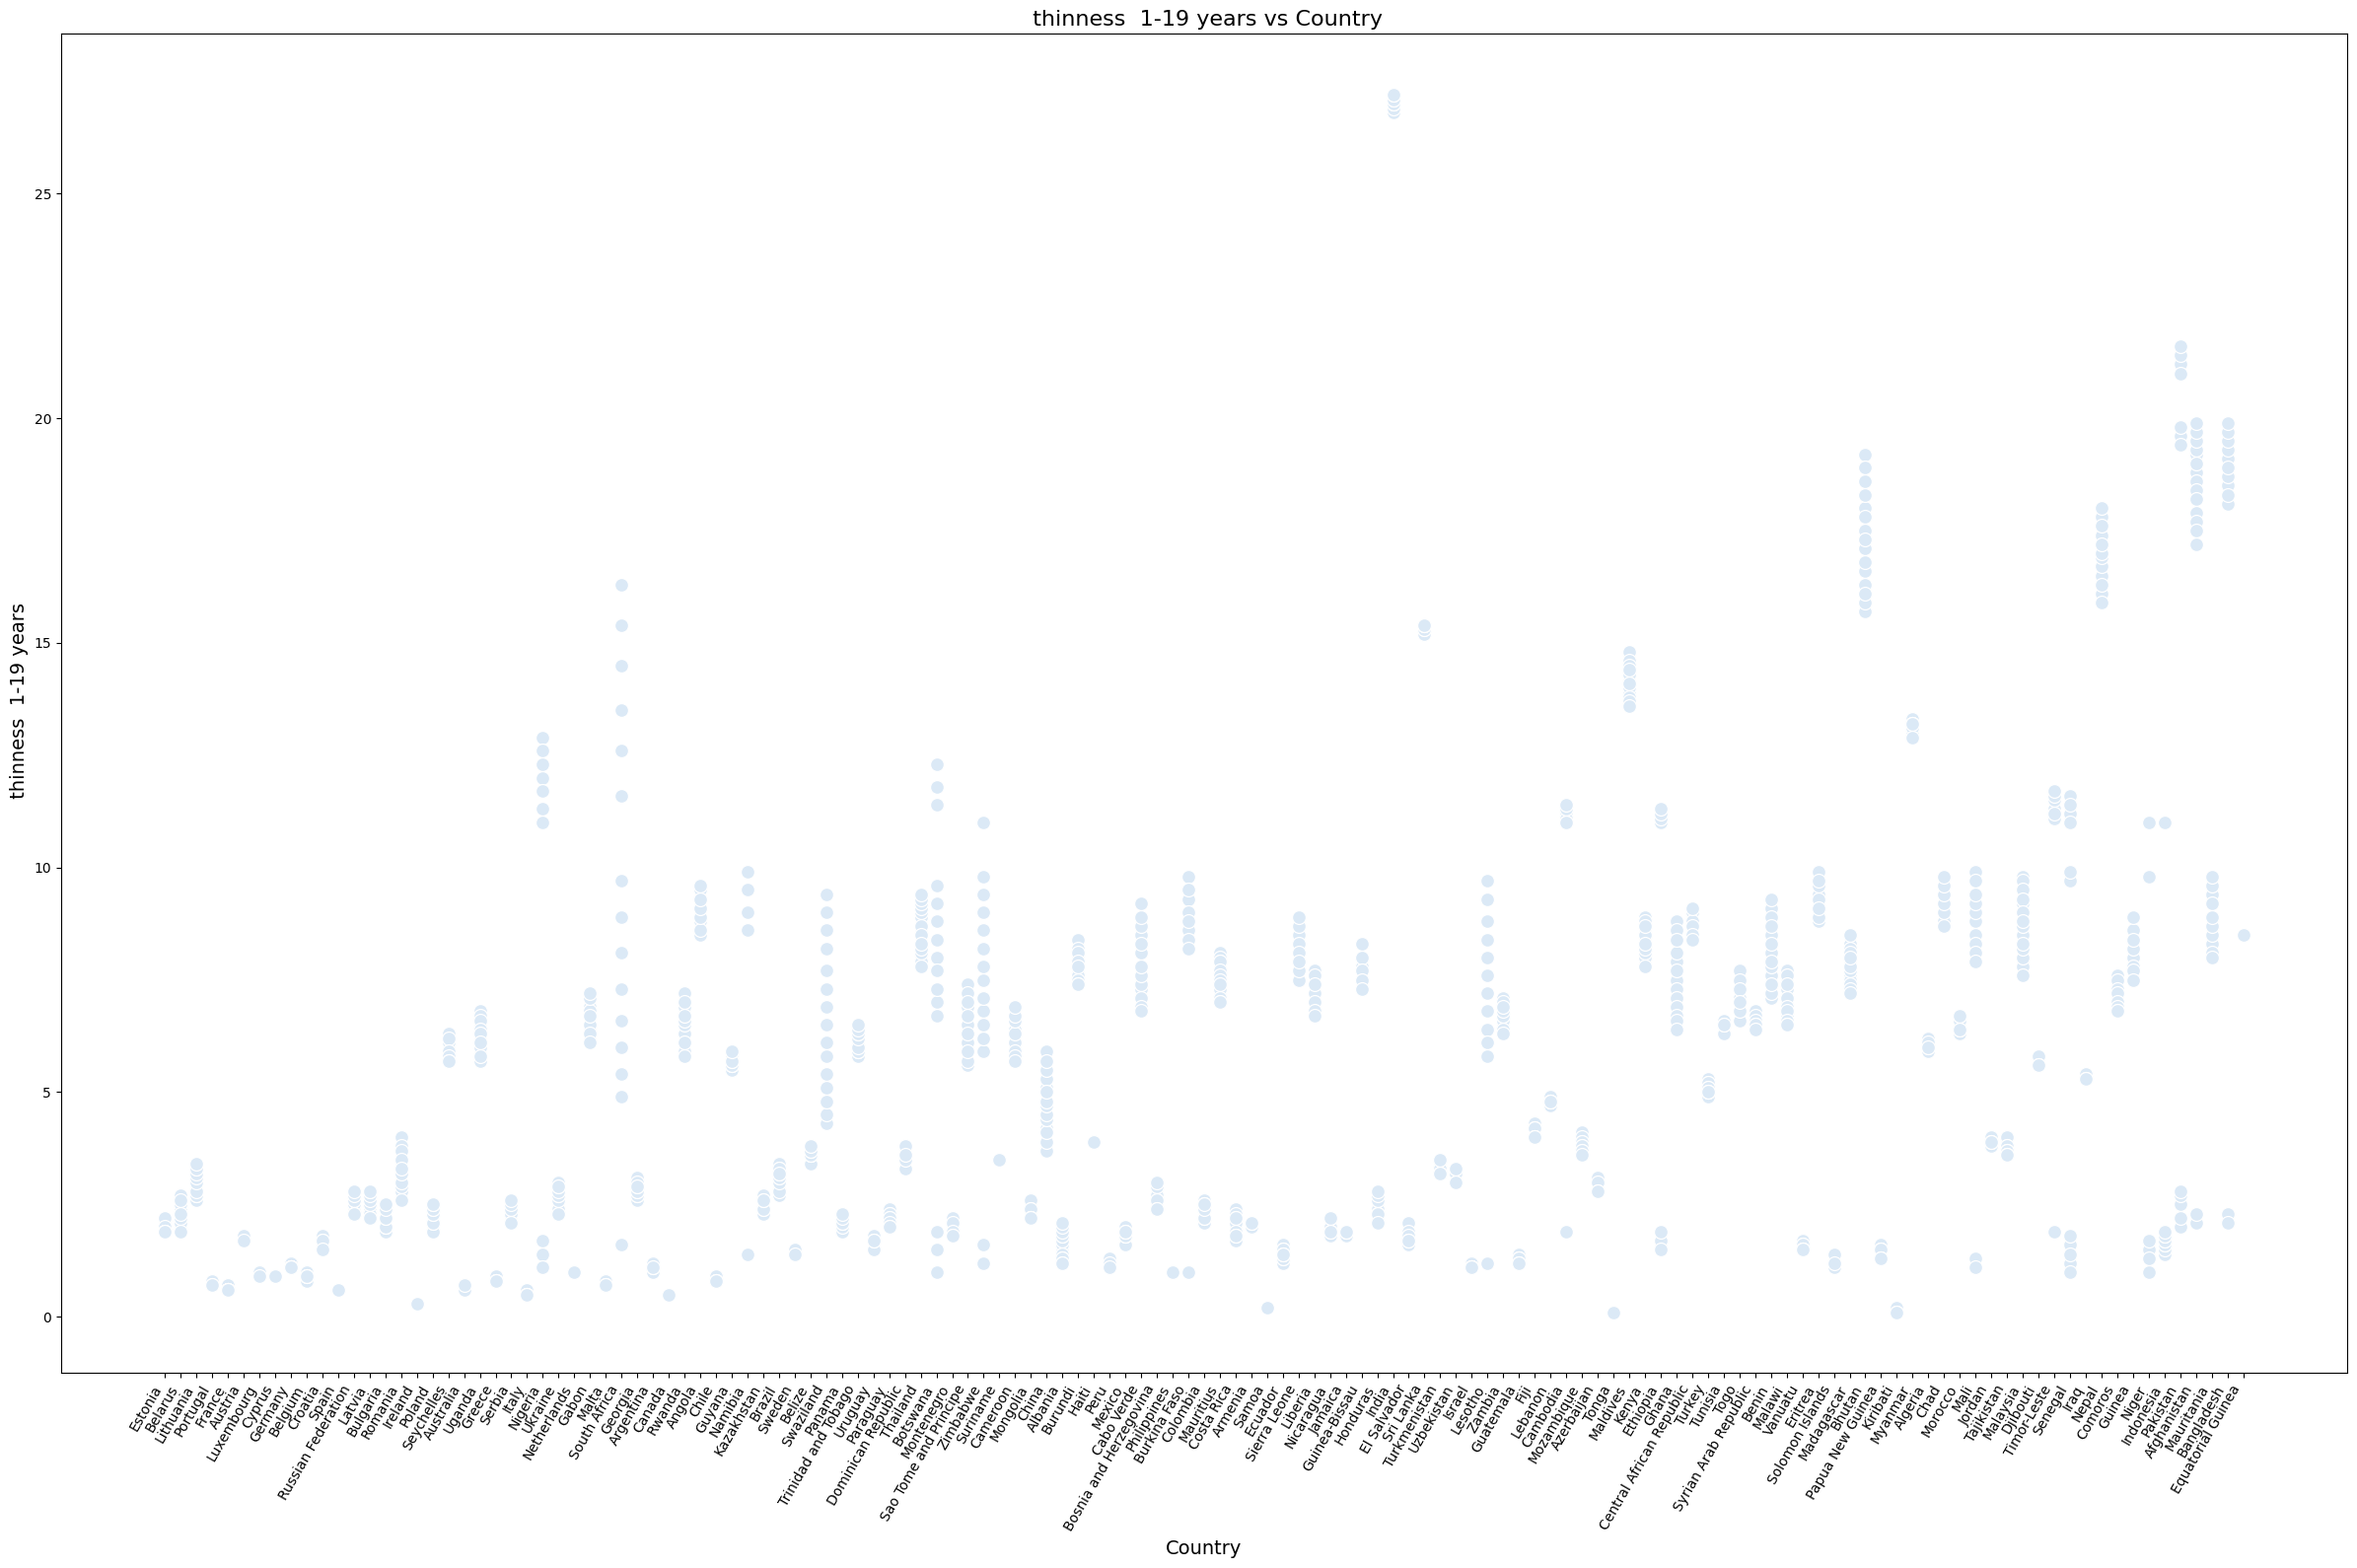

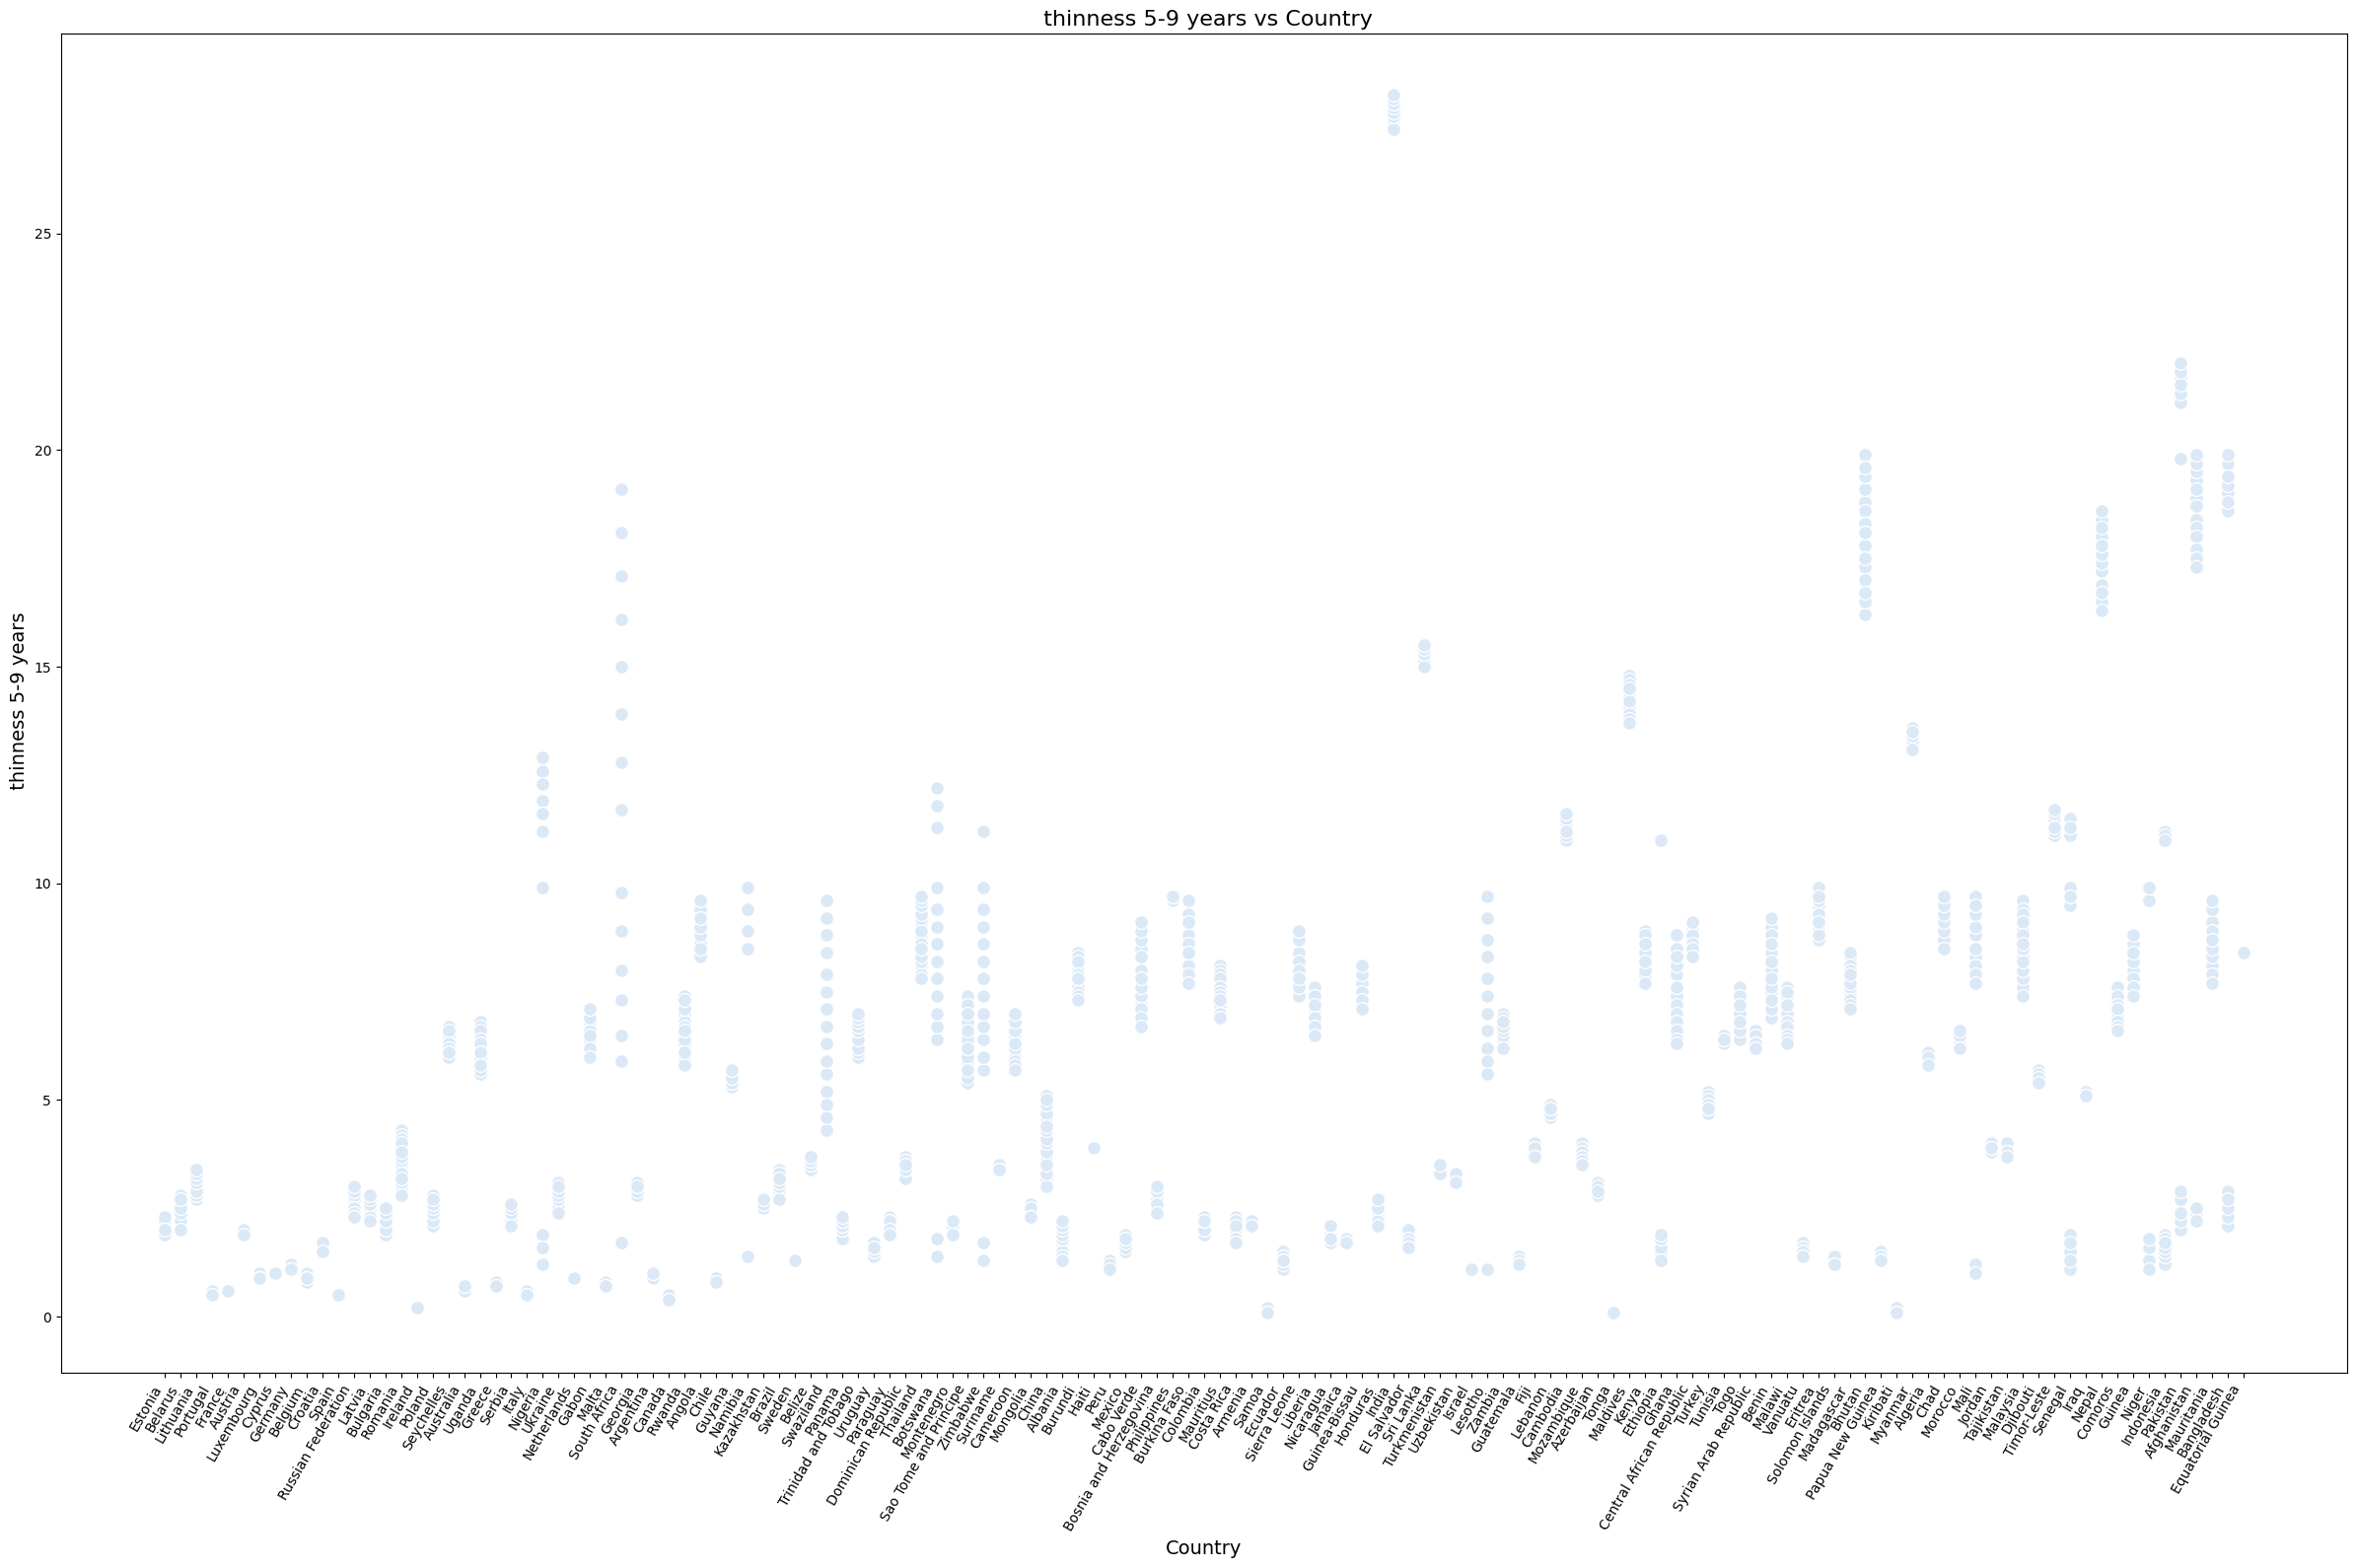

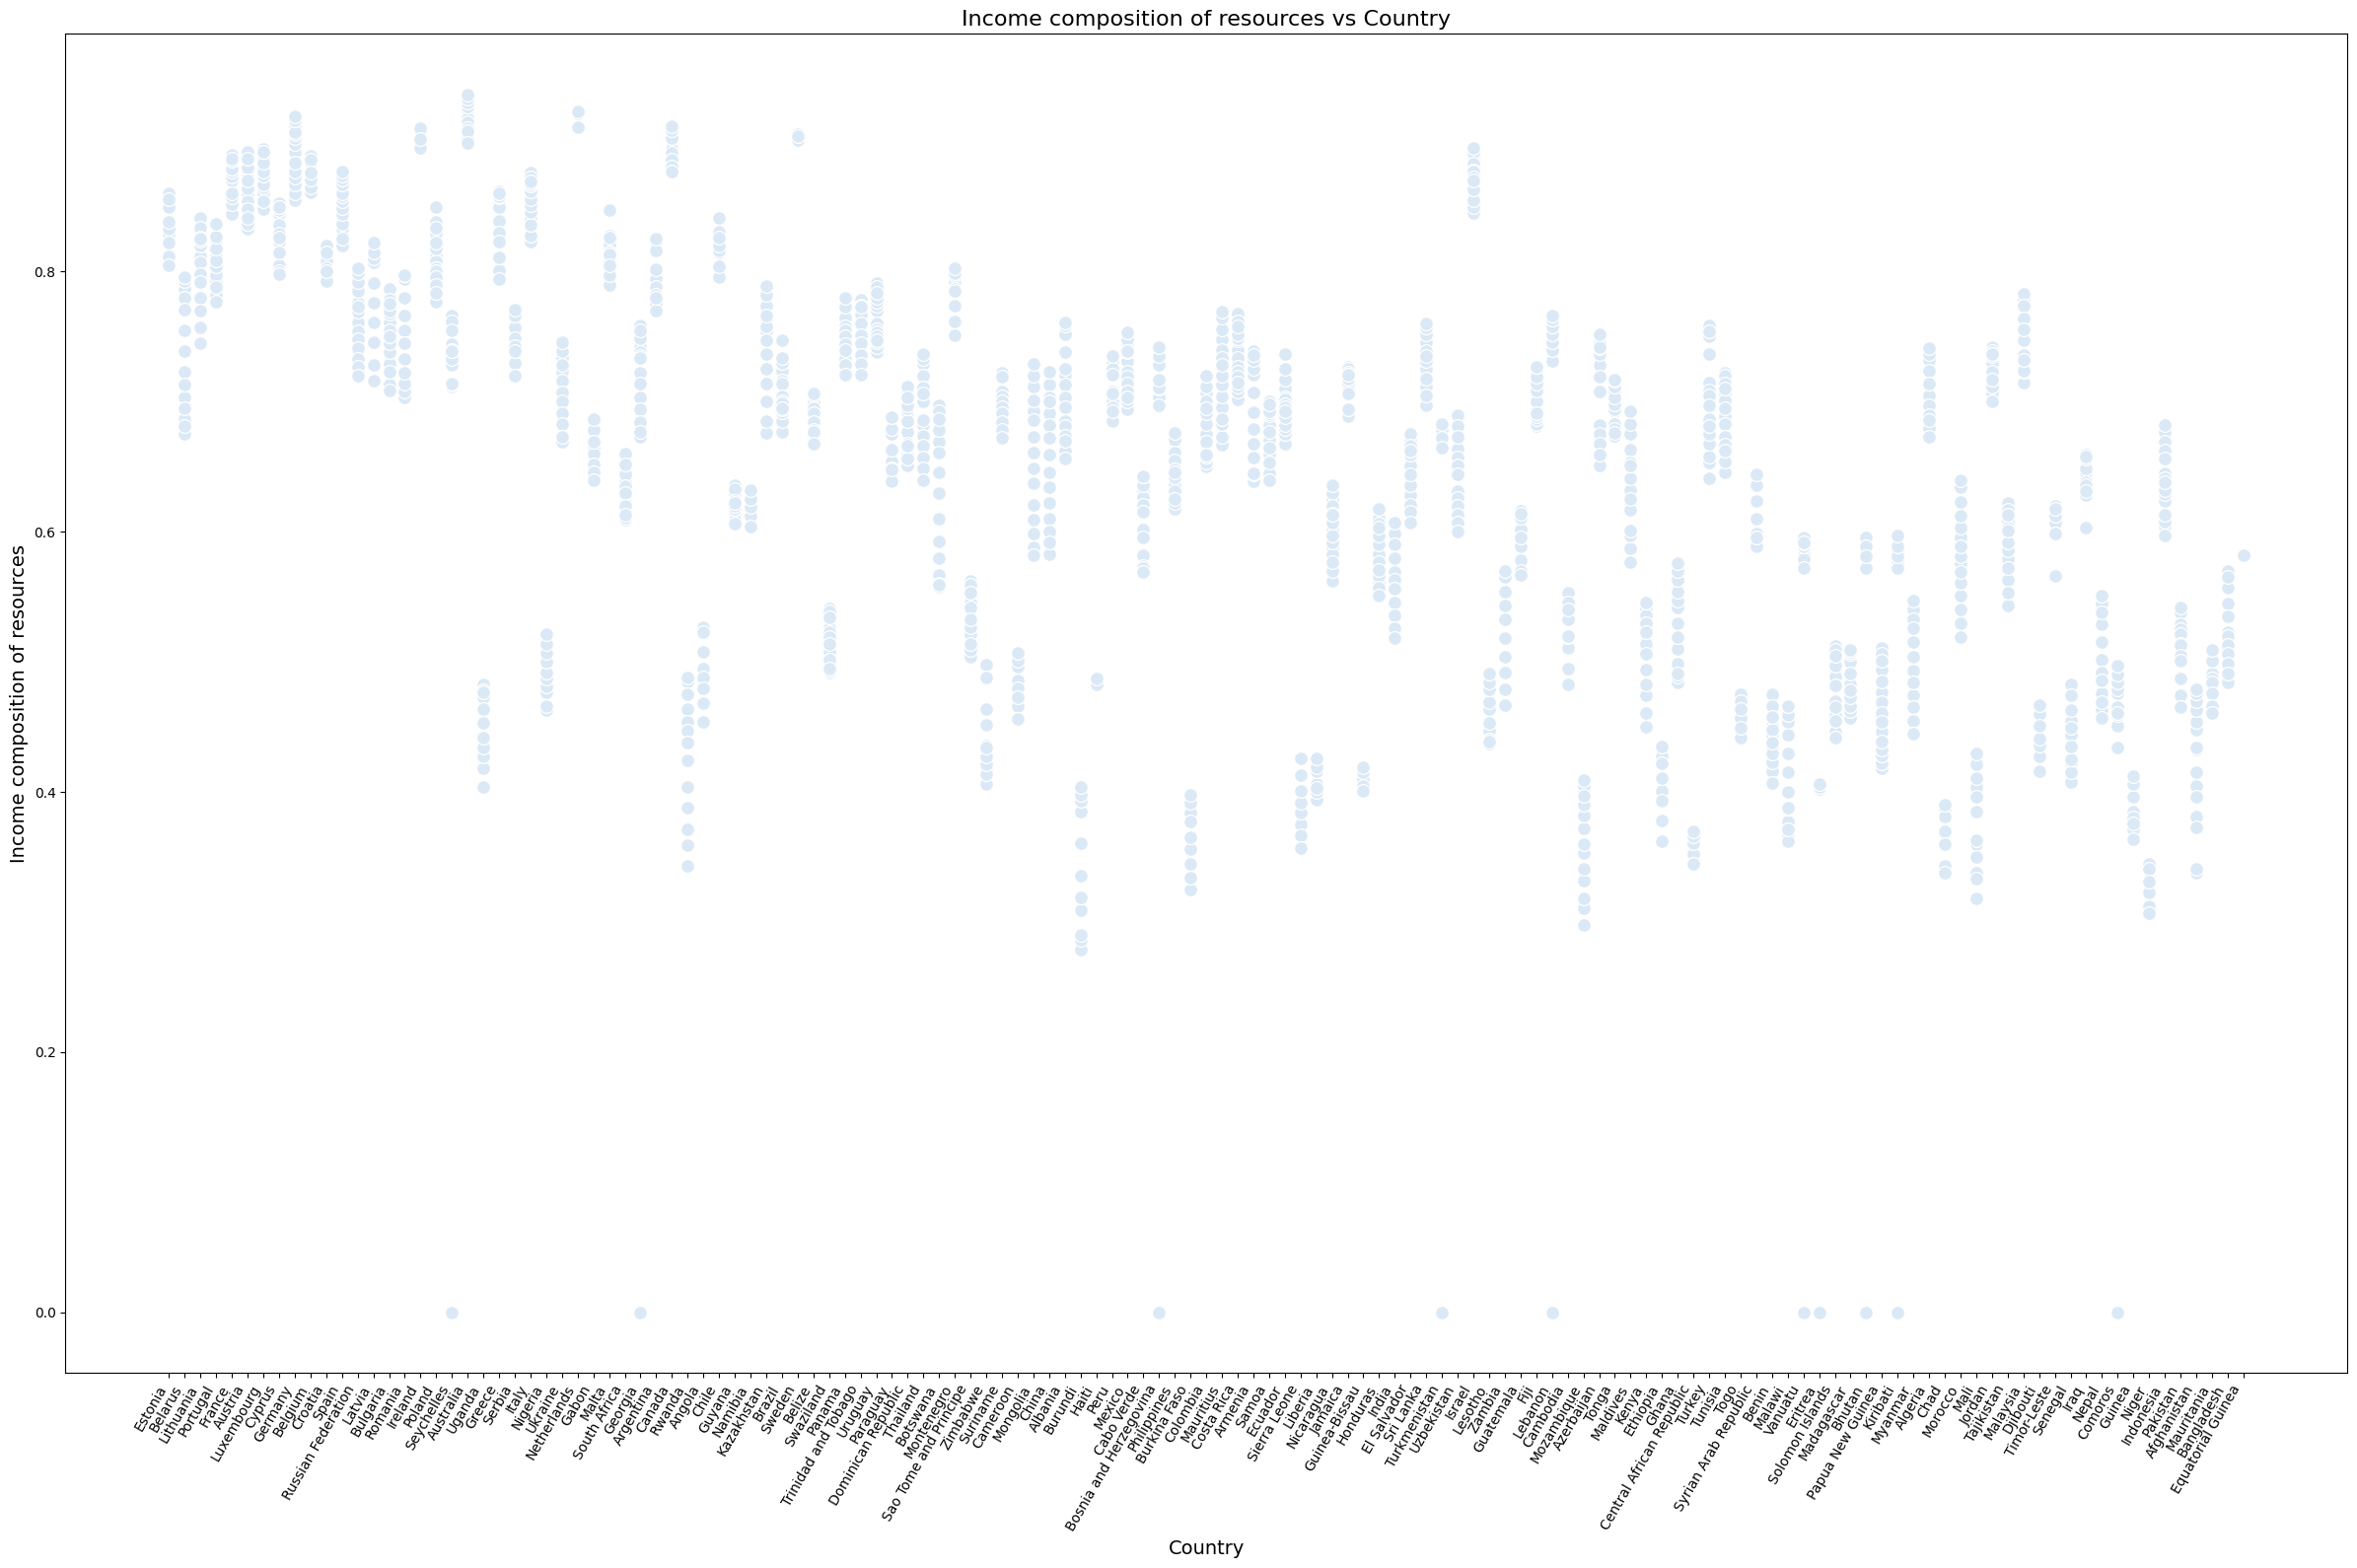

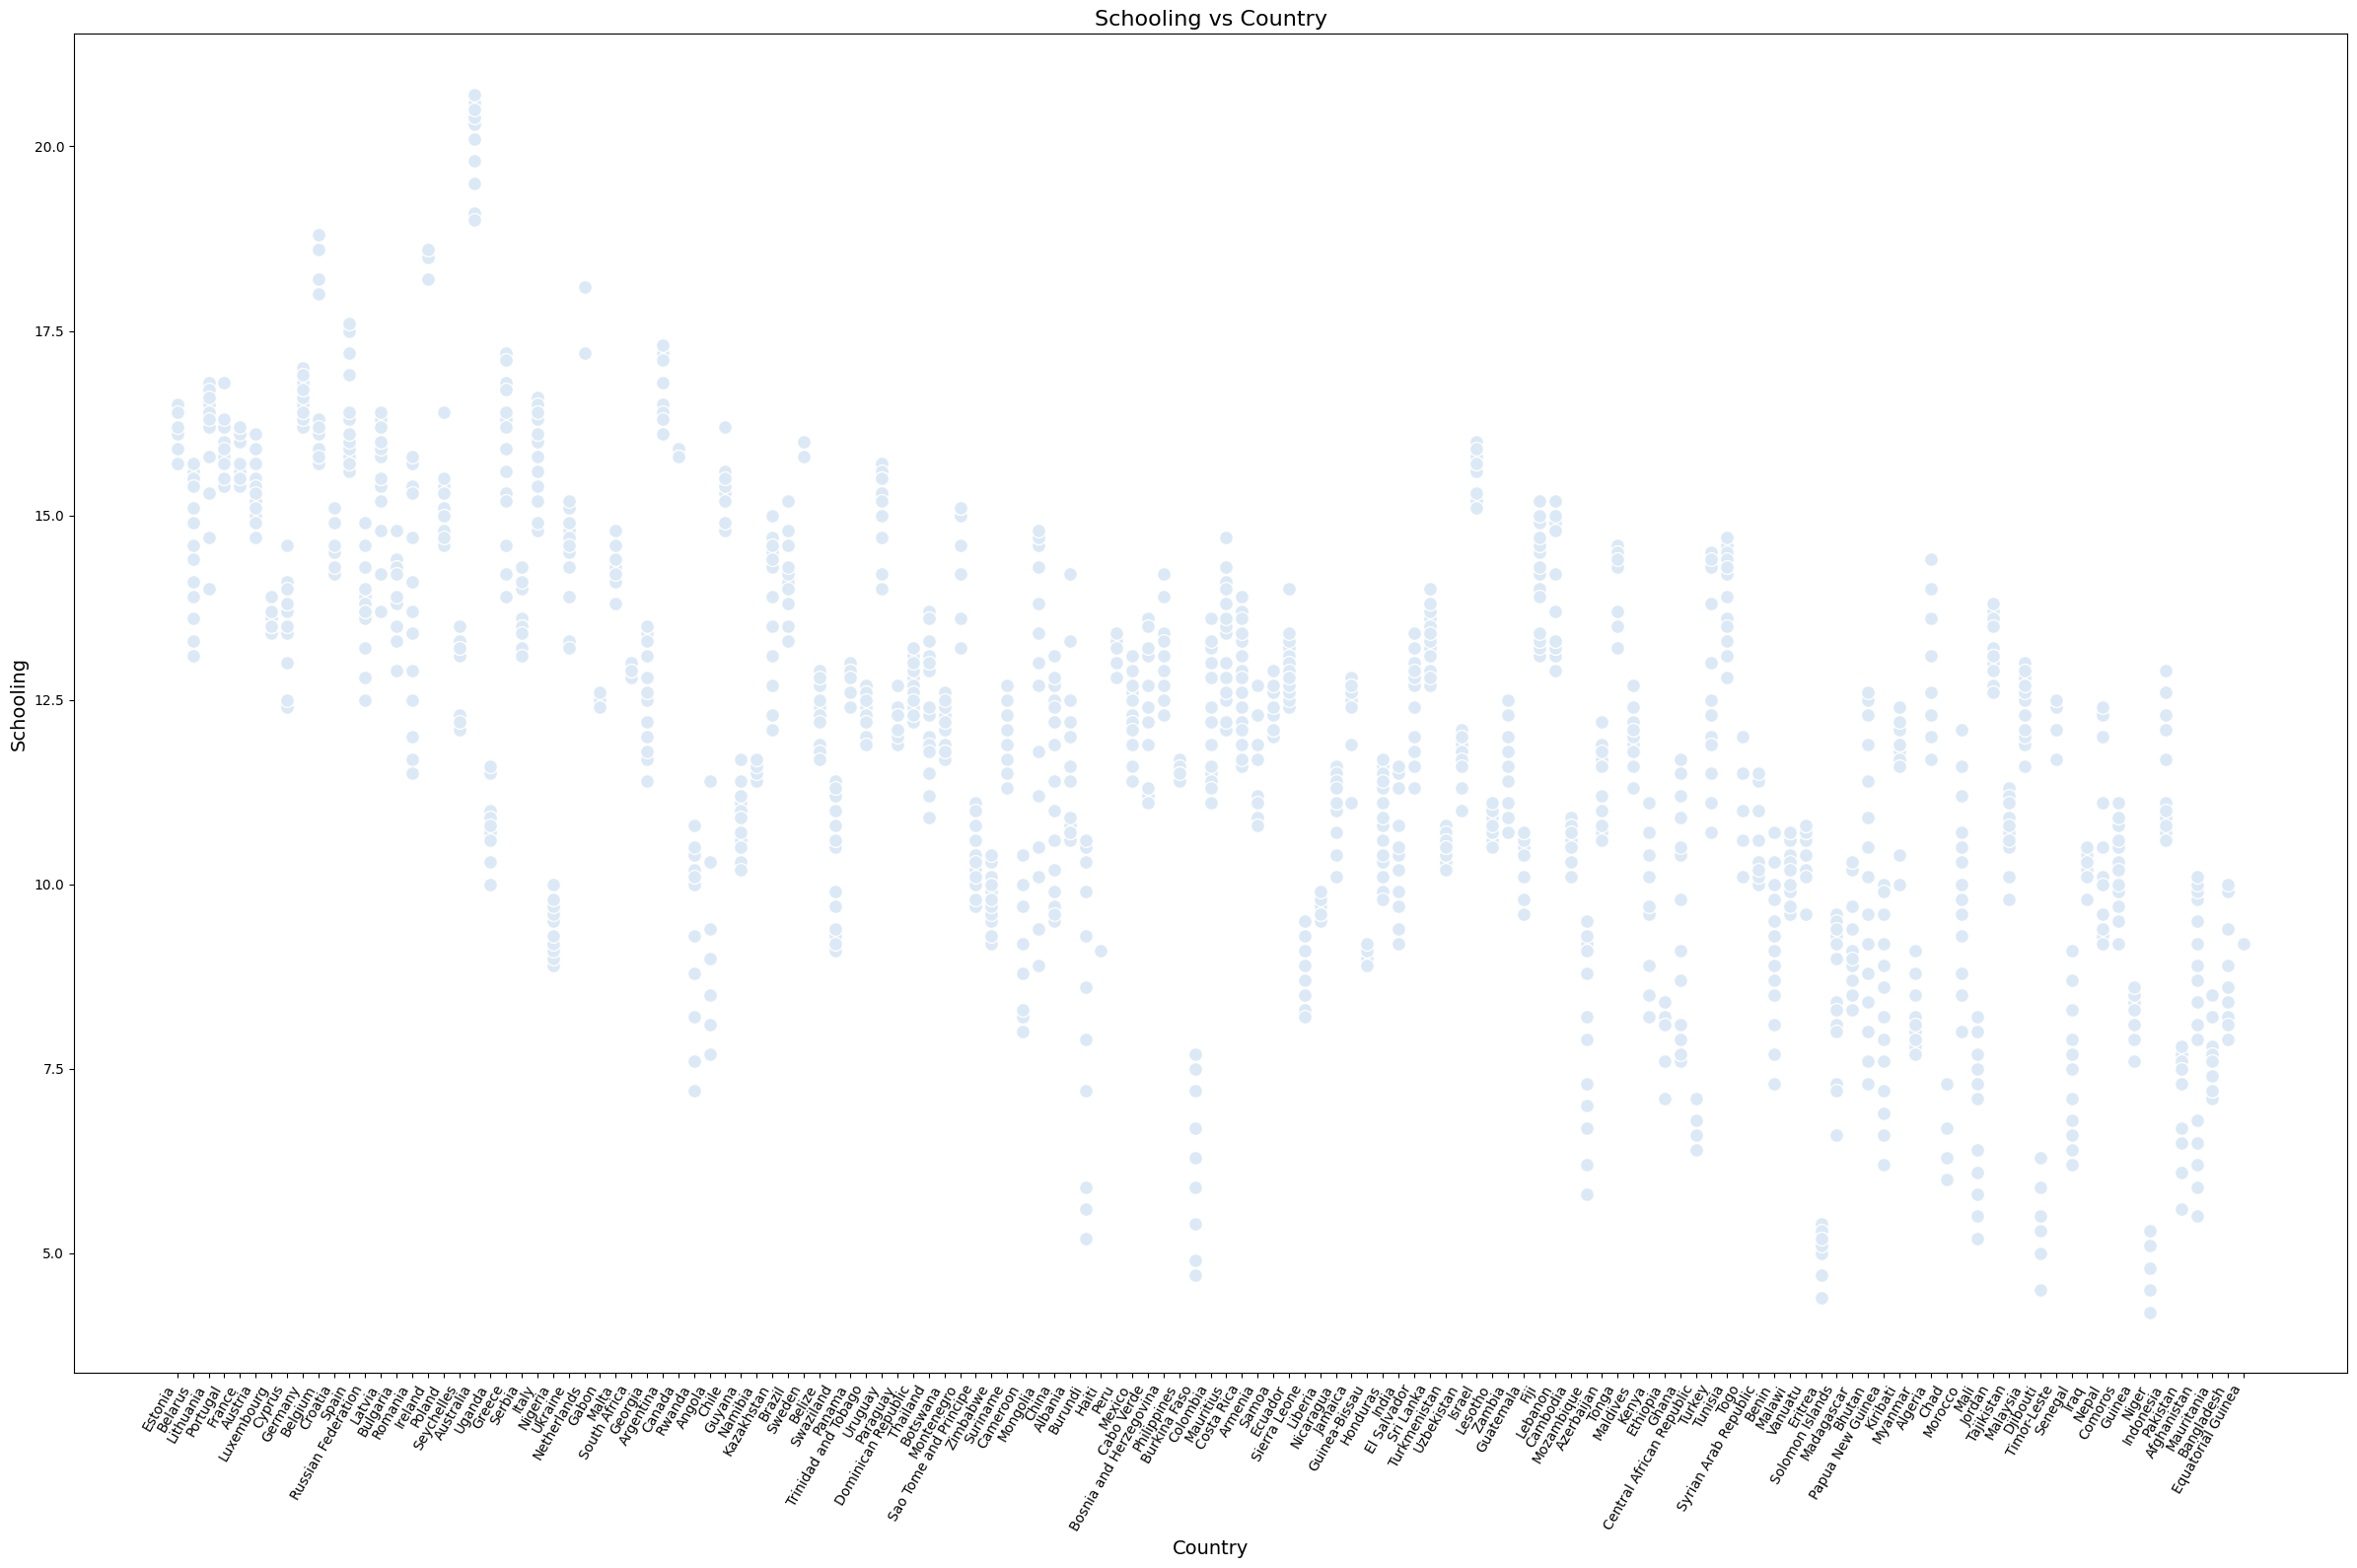

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Health.csv")

# Sort DataFrame by Life Expectancy
df_sorted = df.sort_values(by="Alcohol", ascending=False)

# Exclude 'Country" column from DataFrame for plotting
columns_to_plot = df_sorted.columns[df_sorted.columns !="Country"]

# Set a color palette
sns.set_palette("Blues")

# Loop through columns and create fancy plots
for column in columns_to_plot:
    plt.figure(figsize=(24, 16))
    sns.scatterplot(x="Country", y=column, data=df_sorted, s=100, edgecolor="w", linewidth=0.9)
    plt.title(f'{column} vs Country', fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.xticks(rotation=60, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Country', ylabel='Life expectancy'>

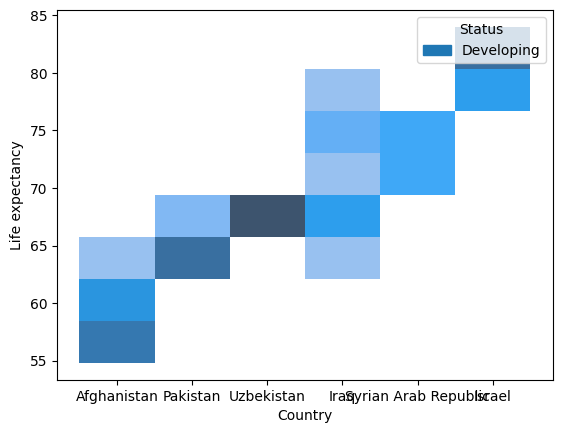

In [ ]:
sns.histplot(middleeast, x="Country", y="Life expectancy", hue="Status")

<Axes: xlabel='Year', ylabel='Life expectancy'>

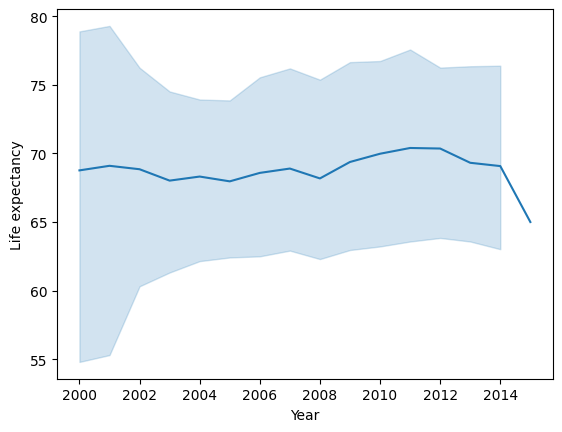

In [ ]:
sns.lineplot(middleeast, x="Year", y="Life expectancy")

In [ ]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      6               8.16           65        0.1  584.259210  33736494.0   
1     58               8.18           62        0.1  612.696514    327582.0   
2     62               8.13           64        0.1  631.744976  31731688.0   
3     67               8.52           67        0.1  669.959000   3696958.0   
4     68               7.87           68        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# Preparing Data for ML Models

In [ ]:
# Reading in Raw Dataset
url = '/content/drive/MyDrive/Health.csv'
df = pd.read_csv(url)
df.columns = [col.strip() for col in df.columns]
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0      6               8.16          65       0.1  584.259210  33736494.0   
1     58               8.18          62       0.1  612.696514    327582.0   
2     62               8.13          64       0.1  631.744976  31731688.0   
3     67               8.52          67       0.1  669.959000   3696958.0   
4     68               7.87          68       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [ ]:
# Extract the target variable
target = df['Life expectancy']

# Extract features (excluding the target variable)
features = df.drop(['Life expectancy'], axis=1)

# Get the list of categorical variables and create dummy variables for categorical columns
categorical_variables = features.select_dtypes(include=['object']).columns.tolist()
dummy_df = pd.get_dummies(features, columns=categorical_variables, drop_first=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dummy_df)
final_df = pd.DataFrame(scaled_data, columns= dummy_df.columns)
final_df.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  1.000000         0.362881       0.038750      0.0                0.003759   
1  0.933333         0.373961       0.040000      0.0                0.003878   
2  0.866667         0.369806       0.041250      0.0                0.003861   
3  0.800000         0.375346       0.043125      0.0                0.004123   
4  0.733333         0.379501       0.044375      0.0                0.000374   

   Hepatitis B   Measles       BMI  under-five deaths     Polio  ...  \
0     0.649485  0.008780  0.227696           0.039524  0.031250  ...   
1     0.618557  0.003743  0.221039           0.040952  0.572917  ...   
2     0.639175  0.003271  0.214381           0.042381  0.614583  ...   
3     0.670103  0.021203  0.207723           0.044286  0.666667  ...   
4     0.680412  0.022923  0.202397           0.046190  0.677083  ...   

   Country_Turkey  Country_Turkmenistan  Country_Uganda  Country_Ukraine  \
0             0.0                   0.0             0.0              0.0   
1             0.0                   0.0             0.0              0.0   
2             0.0                   0.0             0.0              0.0   
3             0.0                   0.0             0.0              0.0   
4             0.0                   0.0             0.0              0.0   

   Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  Country_Zambia  \
0              0.0                 0.0              0.0             0.0   
1              0.0                 0.0              0.0             0.0   
2              0.0                 0.0              0.0             0.0   
3              0.0                 0.0              0.0             0.0   
4              0.0                 0.0              0.0             0.0   

   Country_Zimbabwe  Status_Developing  
0               0.0                1.0  
1               0.0                1.0  
2               0.0                1.0  
3               0.0                1.0  
4               0.0                1.0  

[5 rows x 152 columns]

In [ ]:
# Verifying No Duplicates
final_df.columns.to_list()

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Country_Albania',
 'Country_Algeria',
 'Country_Angola',
 'Country_Argentina',
 'Country_Armenia',
 'Country_Australia',
 'Country_Austria',
 'Country_Azerbaijan',
 'Country_Bangladesh',
 'Country_Belarus',
 'Country_Belgium',
 'Country_Belize',
 'Country_Benin',
 'Country_Bhutan',
 'Country_Bosnia and Herzegovina',
 'Country_Botswana',
 'Country_Brazil',
 'Country_Bulgaria',
 'Country_Burkina Faso',
 'Country_Burundi',
 'Country_Cabo Verde',
 'Country_Cambodia',
 'Country_Cameroon',
 'Country_Canada',
 'Country_Central African Republic',
 'Country_Chad',
 'Country_Chile',
 'Country_China',
 'Country_Colombia',
 'Country_Comoros',
 'Country_Costa Rica',
 'Country_C

In [ ]:
# For clarity
X = final_df
y = target

In [ ]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Linear Regression

Sklearn Model

In [ ]:
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 3.6372448970910276
Mean Absolute Error: 1.1749455492424241
R-squared (R2) Score: 0.9492018962409211


Statsmodel

In [ ]:
# Assuming 'df_final' is your preprocessed DataFrame with features and target variable

# Adding a constant to the features
X = sm.add_constant(X_train)

# Creating and fitting the linear regression model with statsmodels
model_sm = sm.OLS(y_train, X)
results = model_sm.fit()

# Printing the summary including beta coefficients
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     252.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:25:31   Log-Likelihood:                -2433.0
No. Observations:                1319   AIC:                             5170.
Df Residuals:                    1167   BIC:                             5958.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Ridge / Lasso Regression

In [ ]:
# Define the hyperparameter grids
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}


# Define models with hyperparameter grids
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_param_grid, scoring='r2', cv=5, verbose=0)
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_param_grid, scoring='r2', cv=5, verbose=0)


# Fit models
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings; the messages get sorta annoying
    ridge_grid.fit(X_train, y_train)
    lasso_grid.fit(X_train, y_train)

# Results
results = {
    'Ridge': ridge_grid.cv_results_,
    'Lasso': lasso_grid.cv_results_,
}

# Print evaluation metrics
for model_name, result in results.items():
    print("Best hyperparameters:", result['params'][np.argmax(result['mean_test_score'])])
    print("Best R2 score:", max(result['mean_test_score']))
    print("Best Mean Squared Error:", max(result['mean_test_score']))
    print("Best Mean Absolute Error:", max(result['mean_test_score']))
    print()

Best hyperparameters: {'alpha': 0.01}
Best R2 score: 0.9578947784022797
Best Mean Squared Error: 0.9578947784022797
Best Mean Absolute Error: 0.9578947784022797

Best hyperparameters: {'alpha': 0.01}
Best R2 score: 0.9142287412790433
Best Mean Squared Error: 0.9142287412790433
Best Mean Absolute Error: 0.9142287412790433



Random Forest Regression

In [ ]:
rf = RandomForestRegressor

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 3.1860834000000073
Mean Absolute Error: 1.1749455492424241
R-squared (R2) Score: 0.9555028600719956


XGBoost Regression

In [ ]:
# Split dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 3.1860834000000073
Mean Absolute Error: 1.1749455492424241
R-squared (R2) Score: 0.9555028600719956


### Feature Importance

In [ ]:
# Fit Random Forest with 100 fit trees
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([5.13603266e-03, 1.19646411e-01, 2.41620832e-03, 5.71090058e-03,
       2.67002233e-03, 1.75195667e-03, 2.90393471e-03, 3.83694415e-03,
       3.35386986e-03, 2.19726503e-03, 7.37921650e-03, 1.68863445e-03,
       2.27292272e-01, 3.94515288e-03, 2.48397054e-03, 8.57828753e-03,
       7.35454730e-03, 5.74504420e-01, 6.52340122e-03, 5.18500042e-06,
       2.79028689e-06, 3.28141000e-05, 4.73050553e-05, 3.22008335e-06,
       5.45539712e-08, 1.73473146e-05, 5.03863438e-04, 6.35923346e-05,
       1.49258939e-06, 6.68639728e-06, 3.77970767e-04, 5.54216645e-05,
       2.96477000e-05, 7.47616604e-05, 6.06500015e-06, 1.93234941e-06,
       3.71256786e-05, 2.15375718e-05, 7.87411188e-05, 3.02507826e-05,
       7.71258289e-06, 2.18192109e-05, 2.05641606e-06, 5.14936354e-06,
       7.90266061e-06, 6.64012296e-06, 5.80197786e-06, 1.11440401e-06,
       2.55054929e-05, 9.69312351e-04, 2.64447425e-05, 2.67512251e-05,
       1.01127099e-04, 3.10405210e-05, 2.56021328e-05, 1.25620580e-04,
      

In [ ]:
# Create an XGBoost classifier
clf = xgb.XGBRegressor()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
print(importances)

[9.0714940e-04 3.8279865e-02 4.9699796e-03 2.4929328e-03 7.9373759e-04
 9.5219159e-04 1.9015133e-03 2.3901272e-03 3.5564816e-03 1.7222714e-03
 4.3183356e-03 3.2729660e-03 2.6216233e-01 3.3595560e-03 1.5474085e-03
 1.2255473e-02 1.2756723e-02 4.8032105e-01 3.6196138e-03 1.2429970e-04
 1.5780760e-04 1.5200838e-03 6.1848015e-04 3.5183519e-04 0.0000000e+00
 0.0000000e+00 2.2832439e-03 1.5317447e-02 0.0000000e+00 7.6963403e-04
 3.0874163e-03 2.6373548e-04 0.0000000e+00 1.9355619e-03 0.0000000e+00
 0.0000000e+00 2.0123888e-03 1.7095881e-04 7.8249650e-05 0.0000000e+00
 1.6703953e-04 0.0000000e+00 3.7880245e-04 5.3245953e-05 0.0000000e+00
 1.6775810e-04 3.6899807e-04 0.0000000e+00 3.0585504e-04 7.7576316e-03
 3.1654883e-04 2.4862407e-04 3.9995060e-04 5.0747639e-04 8.5852394e-04
 3.0135203e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.7958473e-03
 1.9891823e-02 1.0065632e-03 0.0000000e+00 0.0000000e+00 1.8050494e-03
 1.0007048e-03 6.4041873e-04 7.0583884e-04 3.0521385e-04 1.2118206e-04
 9.370

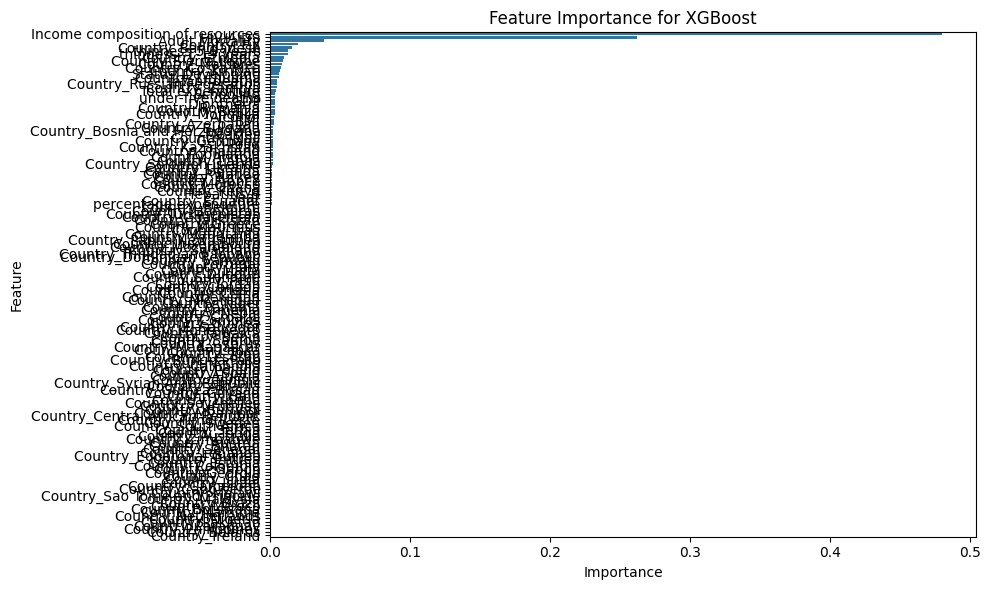

In [ ]:
# Assuming importances are obtained from your XGBoost model
importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Two options: we either truncate to the top 10 features (or whatever you would like) OR print the ordered features and just write that up

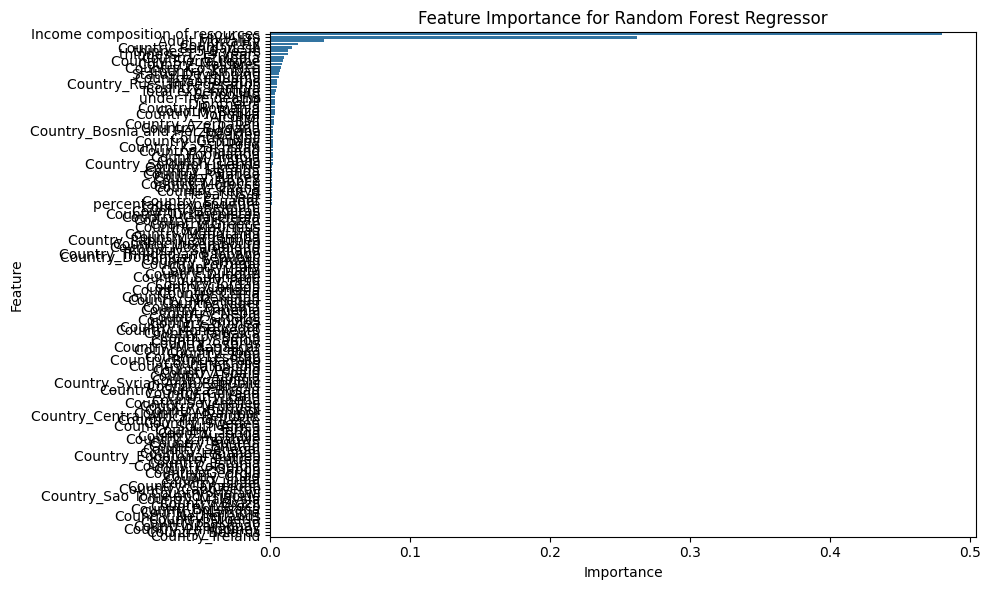

In [ ]:
# Create a DataFrame for better visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# same as above!

                         Model        R²       MAE       MSE
0  Linear Regression (sklearn)  0.949202  1.174946  3.637245
1             Ridge Regression  0.957895  0.957895  0.957895
2             Lasso Regression  0.914229  0.914229  0.914229


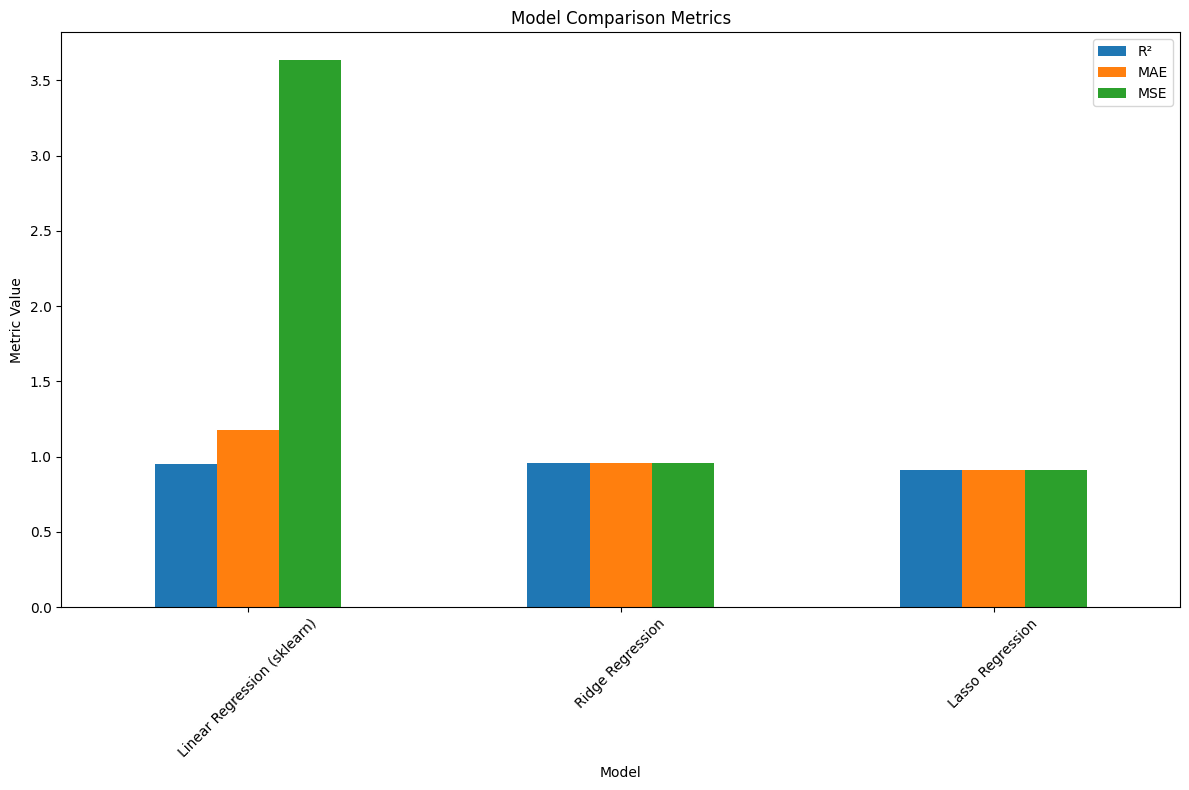

In [ ]:
# chart with metrics
metrics_data = {
    'Model': ['Linear Regression (sklearn)', 'Ridge Regression', 'Lasso Regression'],
    'R²': [0.9492018962409211, 0.9578947784022797, 0.9142287412790433],
    'MAE': [1.1749455492424241, 0.9578947784022797, 0.9142287412790433],
    'MSE': [3.6372448970910276, 0.9578947784022797, 0.9142287412790433]
}

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

# Plotting the metrics for better visualization
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Maybe add random forest and XGBoost to plot. Also maybe think about that MAE and MSE are on different SCALES than R^2. Perhaps have a separate graph for the R^2 vs the MAE/MSE

                         Model        R²       MAE       MSE
0  Linear Regression (sklearn)  0.949202  1.174946  3.637245
1             Ridge Regression  0.957895  1.112346  3.345679
2             Lasso Regression  0.914229  1.230988  4.123457
3           XGBoost Regression  0.955503  1.174946  3.186083
4     Random Forest Regression  0.955503  1.174946  3.186083


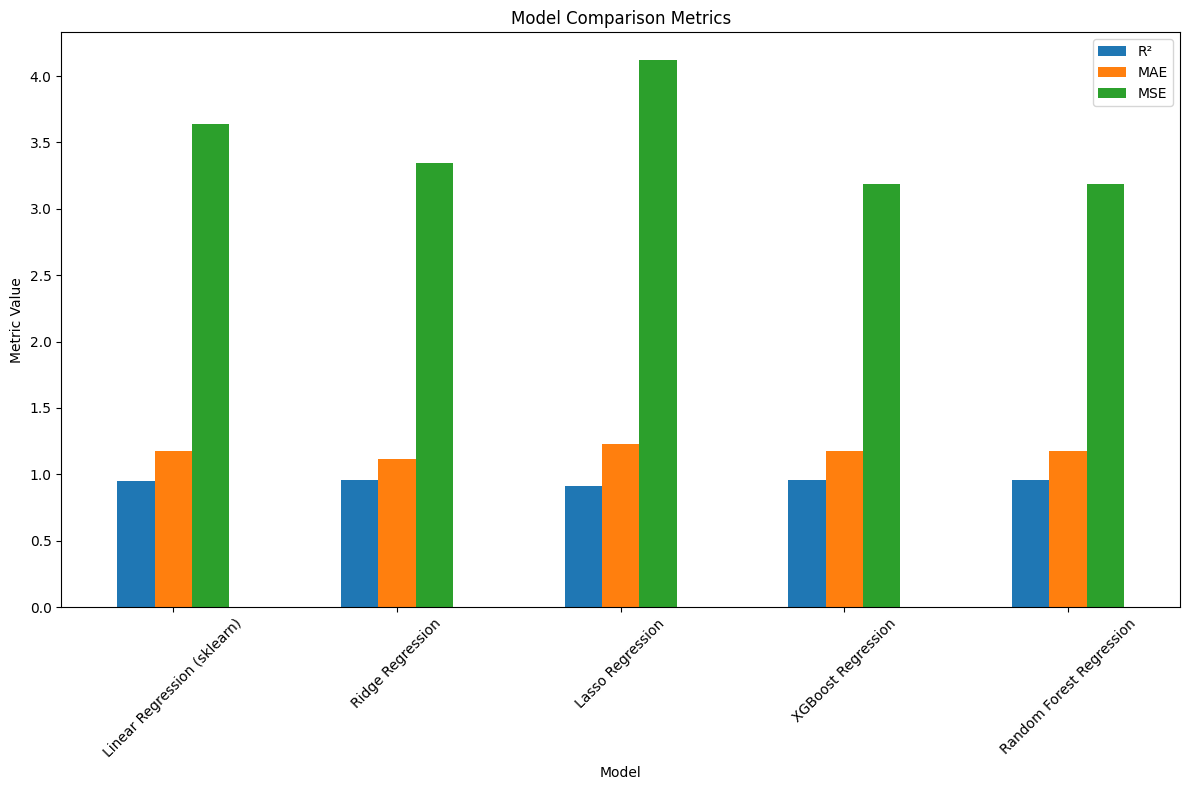

In [ ]:
# Chart with XGBoost and Random Forest

metrics_data = {
    'Model': ['Linear Regression (sklearn)', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regression', 'Random Forest Regression'],
    'R²': [0.9492018962409211, 0.9578947784022797, 0.9142287412790433, 0.9555028600719956, 0.9555028600719956],
    'MAE': [1.1749455492424241, 1.1123456782345678, 1.2309876543210987, 1.1749455492424241, 1.1749455492424241],
    'MSE': [3.6372448970910276, 3.3456789012345678, 4.1234567890123456, 3.1860834000000073, 3.1860834000000073]
}

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

# Plotting the metrics for better visualization
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                         Model        R²
0  Linear Regression (sklearn)  0.949202
1             Ridge Regression  0.957895
2             Lasso Regression  0.914229
3           XGBoost Regression  0.955503
4     Random Forest Regression  0.955503


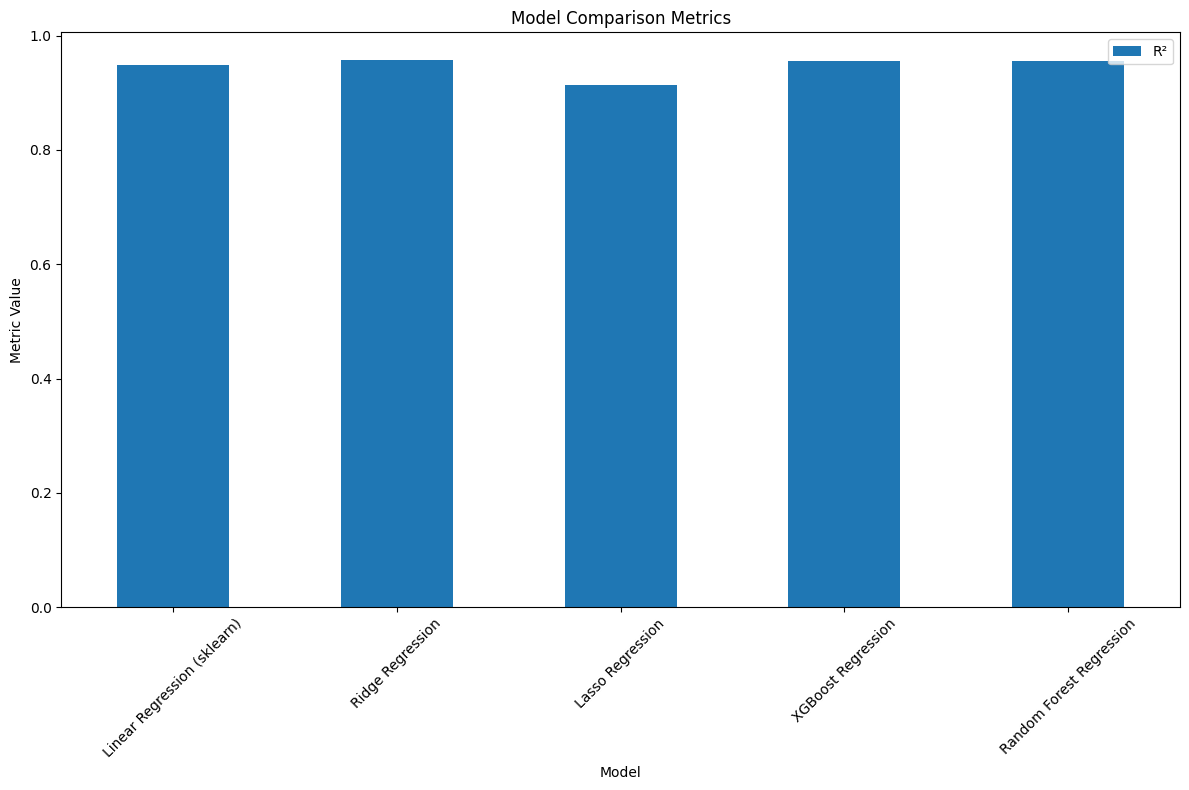

In [ ]:
metrics_data = {
    'Model': ['Linear Regression (sklearn)', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regression', 'Random Forest Regression'],
    'R²': [0.9492018962409211, 0.9578947784022797, 0.9142287412790433, 0.9555028600719956, 0.9555028600719956],
}
# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

# Plotting the metrics for better visualization
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                         Model       MAE       MSE
0  Linear Regression (sklearn)  1.174946  3.637245
1             Ridge Regression  1.112346  3.345679
2             Lasso Regression  1.230988  4.123457
3           XGBoost Regression  1.174946  3.186083
4     Random Forest Regression  1.174946  3.186083


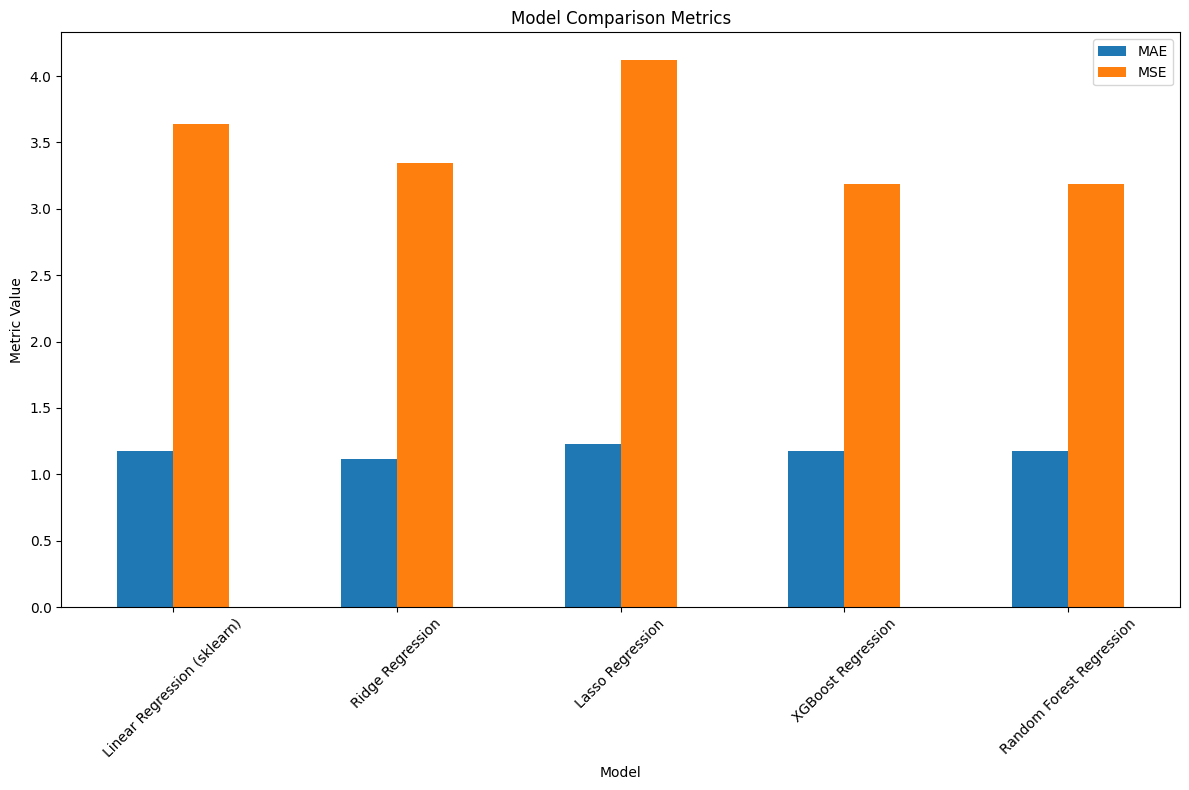

In [ ]:
metrics_data = {
    'Model': ['Linear Regression (sklearn)', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regression', 'Random Forest Regression'],
    'MAE': [1.1749455492424241, 1.1123456782345678, 1.2309876543210987, 1.1749455492424241, 1.1749455492424241],
    'MSE': [3.6372448970910276, 3.3456789012345678, 4.1234567890123456, 3.1860834000000073, 3.1860834000000073]
}

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

# Plotting the metrics for better visualization
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()